# Cotswold Furniture Sales Analysis & Actionable Insights for Doubling Company Profits to £19m

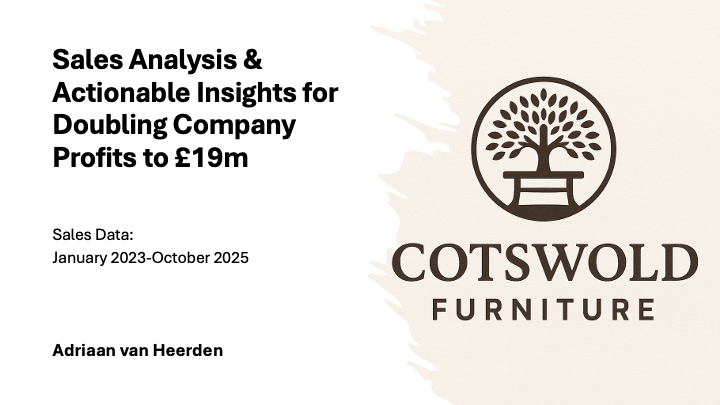

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

!pip install adjustText
#!pip install python-pptx
from adjustText import adjust_text

In [2]:
# Import dataset and check 

df = pd.read_csv("cotswold_sales.csv")
df.head()

,Order Date,Product ID,Product,Quantity,Price,Cost,Discount,Revenue,Profit,Delivery Time (Days),Returned,Customer Name,Region
0,2025-05-10,P1001,Dining Table,5,900,150,0.07,4185.0,3487.5,4,1,Alice Carter,North West
1,2023-05-02,P1003,Coffee Table,3,200,40,0.04,576.0,460.8,2,0,Henry Hughes,London
2,2024-04-11,P1001,Dining Table,5,900,150,0.25,3375.0,2812.5,12,0,Riley Moore,South East
3,2023-11-27,P1009,Chest of Drawers,1,600,100,0.00,600.0,500.0,4,0,Noah Jones,South West
4,2023-03-29,P1000,Sofa,2,1200,300,0.17,1992.0,1494.0,6,0,Charlotte Evans,Midlands


In [3]:
# Run basic stats

df.describe()

,Quantity,Price,Cost,Discount,Revenue,Profit,Delivery Time (Days),Returned
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2.995500,728.708333,132.590000,0.125433,1905.404417,1558.669050,8.021833,0.069000
std,1.416268,396.769227,82.329348,0.072260,1458.902849,1183.706751,3.738541,0.253475
min,1.000000,200.000000,40.000000,0.000000,150.000000,120.000000,2.000000,0.000000
25%,2.000000,350.000000,60.000000,0.060000,792.000000,652.800000,5.000000,0.000000
50%,3.000000,600.000000,100.000000,0.130000,1440.000000,1200.000000,8.000000,0.000000
75%,4.000000,1000.000000,200.000000,0.190000,2700.000000,2225.625000,11.000000,0.000000
max,5.000000,1500.000000,300.000000,0.250000,7500.000000,6250.000000,14.000000,1.000000


In [4]:
df.describe(include=['object'])

,Order Date,Product ID,Product,Customer Name,Region
count,6000,6000,6000,6000,6000
unique,1033,10,10,20,8
top,2025-10-13,P1001,Dining Table,Ella Robinson,Wales
freq,14,647,647,326,783


In [5]:
# Check for null values

df.isnull().sum()

Order Date              0
Product ID              0
Product                 0
Quantity                0
Price                   0
Cost                    0
Discount                0
Revenue                 0
Profit                  0
Delivery Time (Days)    0
Returned                0
Customer Name           0
Region                  0
dtype: int64

Note important formulas used in dataset:

Discount = percentage in decimal form (0.07 = 7% discount)
Revenue = (Price × Quantity) × (1 - Discount)
Cost = per-unit cost
Profit = Revenue × (1 - Cost/Price)

The profit calculation maintains the same profit margin percentage regardless of the discount given to the customer. So if a product has an 80% margin, it keeps that 80% margin even when discounted.

In [6]:
# Generate dataset quality report

print("=" * 80)
print("DATA QUALITY ASSESSMENT REPORT")
print("=" * 80)
print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("=" * 80)

# STEP 0: CLEAN UP TEMPORARY COLUMNS
print("\n" + "=" * 80)
print("0. DATA PREPARATION")
print("=" * 80)

# Define original columns (exclude any temporary calculation columns)
original_columns = ['Order Date', 'Product ID', 'Product', 'Quantity', 'Price', 
                   'Cost', 'Discount', 'Revenue', 'Profit', 'Delivery Time (Days)', 
                   'Returned', 'Customer Name', 'Region']

# Identify columns in dataframe
existing_original = [col for col in original_columns if col in df.columns]
temp_columns = [col for col in df.columns if col not in original_columns]

if len(temp_columns) > 0:
    print(f"\n⚠️  Found {len(temp_columns)} temporary columns (will exclude from quality checks):")
    for col in temp_columns[:5]:  # Show first 5
        print(f"  • {col}")
    if len(temp_columns) > 5:
        print(f"  • ... and {len(temp_columns) - 5} more")
    
    # Create clean dataframe for assessment
    df_assess = df[existing_original].copy()
    print(f"\n✓ Assessment will run on {len(existing_original)} original columns only")
else:
    df_assess = df.copy()
    print("✓ No temporary columns found - using full dataframe")

# 1. BASIC DATASET INFORMATION
print("\n" + "=" * 80)
print("1. DATASET OVERVIEW")
print("=" * 80)
print(f"Total Records: {len(df_assess):,}")
print(f"Total Columns: {len(df_assess.columns)}")
print(f"Memory Usage: {df_assess.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumn Names: {', '.join(df_assess.columns)}")
print(f"\nData Types:")
print(df_assess.dtypes)

# 2. COMPLETENESS ANALYSIS
print("\n" + "=" * 80)
print("2. COMPLETENESS ANALYSIS (Missing Values)")
print("=" * 80)

missing_data = pd.DataFrame({
    'Column': df_assess.columns,
    'Missing_Count': df_assess.isnull().sum().values,
    'Missing_%': (df_assess.isnull().sum().values / len(df_assess) * 100).round(2),
    'Non_Missing_Count': df_assess.notna().sum().values,
    'Data_Type': df_assess.dtypes.values
})

missing_data = missing_data[missing_data['Missing_Count'] > 0]

if len(missing_data) > 0:
    print("\n⚠️  COLUMNS WITH MISSING DATA:")
    print(missing_data.to_string(index=False))
    print(f"\nOverall Completeness: {((1 - df_assess.isnull().sum().sum() / (len(df_assess) * len(df_assess.columns))) * 100):.2f}%")
else:
    print("\n✓ NO MISSING VALUES DETECTED")
    print(f"Overall Completeness: 100.00%")

# 3. DUPLICATE ANALYSIS
print("\n" + "=" * 80)
print("3. DUPLICATE ANALYSIS")
print("=" * 80)

duplicate_rows = df_assess.duplicated().sum()
duplicate_percentage = (duplicate_rows / len(df_assess) * 100)

print(f"Duplicate Rows: {duplicate_rows:,} ({duplicate_percentage:.2f}%)")

if duplicate_rows > 0:
    print(f"⚠️  WARNING: {duplicate_rows} duplicate rows found")
    print("\nSample duplicates:")
    print(df_assess[df_assess.duplicated(keep=False)].head(10))
else:
    print("✓ No duplicate rows detected")

# Check for duplicate Product IDs
if 'Product ID' in df_assess.columns:
    duplicate_product_ids = df_assess['Product ID'].duplicated().sum()
    print(f"\nDuplicate Product IDs: {duplicate_product_ids:,}")
    if duplicate_product_ids > 0:
        print("  (Note: This is normal if Product ID refers to product type, not order ID)")

# 4. DATA CONSISTENCY CHECKS
print("\n" + "=" * 80)
print("4. DATA CONSISTENCY CHECKS")
print("=" * 80)

consistency_issues = []

# Check: Revenue = (Price × Quantity) × (1 - Discount%)
# NOTE: Discount is a percentage in decimal form (0.07 = 7%)
if all(col in df_assess.columns for col in ['Revenue', 'Price', 'Quantity', 'Discount']):
    revenue_calculated = (df_assess['Price'] * df_assess['Quantity']) * (1 - df_assess['Discount'])
    revenue_mismatch = ~np.isclose(df_assess['Revenue'], revenue_calculated, rtol=0.01)
    revenue_issues = revenue_mismatch.sum()
    
    if revenue_issues > 0:
        consistency_issues.append(f"Revenue calculation mismatch: {revenue_issues} rows")
        print(f"⚠️  Revenue Calculation Issues: {revenue_issues} rows ({revenue_issues/len(df_assess)*100:.2f}%)")
        print(f"    Formula: Revenue = (Price × Quantity) × (1 - Discount%)")
    else:
        print("✓ Revenue calculations are consistent")
        print("  Formula validated: Revenue = (Price × Quantity) × (1 - Discount%)")

# Check: Profit = Revenue × (1 - Cost/Price)
# NOTE: This maintains the profit margin % regardless of discount
if all(col in df_assess.columns for col in ['Profit', 'Revenue', 'Cost', 'Price']):
    profit_calculated = revenue_calculated * (1 - df_assess['Cost'] / df_assess['Price'])
    profit_mismatch = ~np.isclose(df_assess['Profit'], profit_calculated, rtol=0.01)
    profit_issues = profit_mismatch.sum()
    
    if profit_issues > 0:
        consistency_issues.append(f"Profit calculation mismatch: {profit_issues} rows")
        print(f"⚠️  Profit Calculation Issues: {profit_issues} rows ({profit_issues/len(df_assess)*100:.2f}%)")
        print(f"    Formula: Profit = Revenue × (1 - Cost/Price)")
    else:
        print("✓ Profit calculations are consistent")
        print("  Formula validated: Profit = Revenue × (1 - Cost/Price)")

# Check: Negative values where they shouldn't be
if 'Price' in df_assess.columns:
    negative_prices = (df_assess['Price'] < 0).sum()
    if negative_prices > 0:
        consistency_issues.append(f"Negative prices: {negative_prices} rows")
        print(f"⚠️  Negative Prices: {negative_prices} rows")
    else:
        print("✓ No negative prices")

if 'Quantity' in df_assess.columns:
    negative_qty = (df_assess['Quantity'] < 0).sum()
    zero_qty = (df_assess['Quantity'] == 0).sum()
    if negative_qty > 0:
        consistency_issues.append(f"Negative quantities: {negative_qty} rows")
        print(f"⚠️  Negative Quantities: {negative_qty} rows")
    else:
        print("✓ No negative quantities")
    if zero_qty > 0:
        print(f"⚠️  Zero Quantities: {zero_qty} rows (orders with no items)")

# Check: Discount should be between 0 and 1 (it's a percentage in decimal form)
if 'Discount' in df_assess.columns:
    invalid_discounts = ((df_assess['Discount'] < 0) | (df_assess['Discount'] > 1)).sum()
    if invalid_discounts > 0:
        consistency_issues.append(f"Invalid discount values: {invalid_discounts} rows")
        print(f"⚠️  Invalid Discounts: {invalid_discounts} rows (should be 0-1 for 0-100%)")
    else:
        print("✓ All discount values are valid (0-1 range)")

# 5. OUTLIER DETECTION (ORIGINAL DATA ONLY)
print("\n" + "=" * 80)
print("5. OUTLIER DETECTION")
print("=" * 80)

numeric_columns = df_assess.select_dtypes(include=[np.number]).columns
# Exclude binary columns from outlier detection
numeric_columns = [col for col in numeric_columns if col not in ['Returned']]

outlier_summary = []

for col in numeric_columns:
    Q1 = df_assess[col].quantile(0.25)
    Q3 = df_assess[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    outliers = ((df_assess[col] < lower_bound) | (df_assess[col] > upper_bound)).sum()
    outlier_pct = (outliers / len(df_assess) * 100)
    
    if outliers > 0:
        outlier_summary.append({
            'Column': col,
            'Outliers': outliers,
            'Outliers_%': round(outlier_pct, 2),
            'Min': df_assess[col].min(),
            'Max': df_assess[col].max(),
            'Mean': round(df_assess[col].mean(), 2),
            'Std': round(df_assess[col].std(), 2)
        })

if len(outlier_summary) > 0:
    print("\nCOLUMNS WITH OUTLIERS (using 3×IQR method):")
    outlier_df = pd.DataFrame(outlier_summary)
    print(outlier_df.to_string(index=False))
    print("\nNote: Statistical outliers may represent legitimate business cases")
    print("(e.g., bulk orders, high-value customers). See detailed analysis for context.")
else:
    print("✓ No statistical outliers detected")
    print("  All values fall within Q1 - 3×IQR to Q3 + 3×IQR range")

# 6. DATA RANGE VALIDATION
print("\n" + "=" * 80)
print("6. DATA RANGE VALIDATION")
print("=" * 80)

for col in numeric_columns:
    print(f"\n{col}:")
    print(f"  Min: {df_assess[col].min():,.2f}")
    print(f"  Max: {df_assess[col].max():,.2f}")
    print(f"  Mean: {df_assess[col].mean():,.2f}")
    print(f"  Median: {df_assess[col].median():,.2f}")
    print(f"  Std Dev: {df_assess[col].std():,.2f}")

# 7. CATEGORICAL DATA QUALITY
print("\n" + "=" * 80)
print("7. CATEGORICAL DATA QUALITY")
print("=" * 80)

categorical_columns = df_assess.select_dtypes(include=['object']).columns

for col in categorical_columns:
    unique_count = df_assess[col].nunique()
    most_common = df_assess[col].value_counts().head(1)
    
    print(f"\n{col}:")
    print(f"  Unique Values: {unique_count}")
    print(f"  Most Common: {most_common.index[0]} ({most_common.values[0]} occurrences, {most_common.values[0]/len(df_assess)*100:.1f}%)")
    
    # Check for potential data entry issues
    if df_assess[col].dtype == 'object':
        with_spaces = df_assess[col].str.strip() != df_assess[col]
        if with_spaces.sum() > 0:
            print(f"  ⚠️  {with_spaces.sum()} values have leading/trailing spaces")

# 8. DATE QUALITY
if 'Order Date' in df_assess.columns:
    print("\n" + "=" * 80)
    print("8. DATE QUALITY ANALYSIS")
    print("=" * 80)
    
    # Convert to datetime if not already
    if not pd.api.types.is_datetime64_any_dtype(df_assess['Order Date']):
        print("\nConverting Order Date to datetime format...")
        df_assess['Order Date'] = pd.to_datetime(df_assess['Order Date'])
    
    print(f"\nOrder Date Range:")
    print(f"  Earliest: {df_assess['Order Date'].min()}")
    print(f"  Latest: {df_assess['Order Date'].max()}")
    print(f"  Span: {(df_assess['Order Date'].max() - df_assess['Order Date'].min()).days} days")
    
    # Check for future dates
    future_dates = (df_assess['Order Date'] > pd.Timestamp.now()).sum()
    if future_dates > 0:
        print(f"  ⚠️  {future_dates} orders have future dates")
    else:
        print(f"  ✓ No future dates")

# 9. BUSINESS LOGIC VALIDATION
print("\n" + "=" * 80)
print("9. BUSINESS LOGIC VALIDATION")
print("=" * 80)

# Check profit margins
if all(col in df_assess.columns for col in ['Profit', 'Revenue']):
    profit_margin = (df_assess['Profit'] / df_assess['Revenue'] * 100)
    negative_margins = (profit_margin < 0).sum()
    extreme_margins = (profit_margin > 95).sum()
    
    print(f"\nProfit Margin Analysis:")
    print(f"  Negative Margins: {negative_margins} rows ({negative_margins/len(df_assess)*100:.2f}%)")
    print(f"  Extreme Margins (>95%): {extreme_margins} rows ({extreme_margins/len(df_assess)*100:.2f}%)")
    print(f"  Average Margin: {profit_margin.mean():.1f}%")

# Check delivery times (handle both possible column names)
delivery_col = None
if 'Delivery Time (Days)' in df_assess.columns:
    delivery_col = 'Delivery Time (Days)'
elif 'Delivery Time' in df_assess.columns:
    delivery_col = 'Delivery Time'

if delivery_col:
    print(f"\nDelivery Time Analysis:")
    print(f"  Min Delivery: {df_assess[delivery_col].min()} days")
    print(f"  Max Delivery: {df_assess[delivery_col].max()} days")
    print(f"  Average: {df_assess[delivery_col].mean():.1f} days")
    
    unusual_delivery = ((df_assess[delivery_col] < 1) | (df_assess[delivery_col] > 30)).sum()
    if unusual_delivery > 0:
        print(f"  ⚠️  {unusual_delivery} orders with unusual delivery times (<1 or >30 days)")

# 10. OVERALL DATA QUALITY SCORE
print("\n" + "=" * 80)
print("10. OVERALL DATA QUALITY SCORE")
print("=" * 80)

quality_score = 100
deductions = []

# Deduct for missing values
missing_pct = (df_assess.isnull().sum().sum() / (len(df_assess) * len(df_assess.columns)) * 100)
if missing_pct > 0:
    deduction = min(missing_pct * 2, 20)
    quality_score -= deduction
    deductions.append(f"Missing values: -{deduction:.1f} points")

# Deduct for duplicates
if duplicate_percentage > 0:
    deduction = min(duplicate_percentage * 5, 15)
    quality_score -= deduction
    deductions.append(f"Duplicates: -{deduction:.1f} points")

# Deduct for consistency issues
if len(consistency_issues) > 0:
    deduction = len(consistency_issues) * 5
    quality_score -= deduction
    deductions.append(f"Consistency issues: -{deduction:.1f} points")

# Deduct for outliers (but only moderately, as they may be legitimate)
if len(outlier_summary) > 0:
    avg_outlier_pct = sum([x['Outliers_%'] for x in outlier_summary]) / len(outlier_summary)
    deduction = min(avg_outlier_pct * 0.5, 10)  # Reduced impact (0.5x instead of 1x)
    quality_score -= deduction
    deductions.append(f"Outliers: -{deduction:.1f} points")

quality_score = max(0, quality_score)

print(f"\nDATA QUALITY SCORE: {quality_score:.1f}/100")

if quality_score >= 95:
    print("Grade: A (Excellent) ⭐⭐⭐⭐⭐")
    grade_desc = "Outstanding data quality. Dataset is production-ready."
elif quality_score >= 85:
    print("Grade: B (Good) ⭐⭐⭐⭐")
    grade_desc = "Good data quality with minor issues to address."
elif quality_score >= 75:
    print("Grade: C (Acceptable) ⭐⭐⭐")
    grade_desc = "Acceptable quality but requires cleanup before critical use."
elif quality_score >= 60:
    print("Grade: D (Needs Improvement) ⭐⭐")
    grade_desc = "Significant quality issues that need attention."
else:
    print("Grade: F (Poor) ⭐")
    grade_desc = "Poor data quality. Major remediation required."

print(f"\n{grade_desc}")

if len(deductions) > 0:
    print("\nDeductions:")
    for d in deductions:
        print(f"  • {d}")
else:
    print("\n🎉 PERFECT SCORE - NO DEDUCTIONS!")

# 11. RECOMMENDATIONS
print("\n" + "=" * 80)
print("11. RECOMMENDATIONS")
print("=" * 80)

recommendations = []

if missing_pct > 0:
    recommendations.append("• Investigate and impute missing values or remove incomplete records")

if duplicate_rows > 0:
    recommendations.append("• Remove or investigate duplicate records to ensure data integrity")

if len(consistency_issues) > 0:
    recommendations.append("• Fix data consistency issues - formulas may need recalculation")

if negative_margins > 0:
    recommendations.append("• Review orders with negative profit margins for pricing errors")

if len(outlier_summary) > 0:
    recommendations.append("• Investigate statistical outliers - may represent data errors OR legitimate business cases (bulk orders, VIP customers)")

if len(temp_columns) > 0:
    recommendations.append(f"• Clean up {len(temp_columns)} temporary calculation columns to reduce confusion")

if len(recommendations) > 0:
    print("\nACTION ITEMS:")
    for rec in recommendations:
        print(rec)
else:
    print("\n✓ No major issues detected. Dataset quality is excellent!")
    print("  • Data is complete, consistent, and ready for analysis")
    print("  • All business logic validations passed")
    print("  • No critical data quality concerns")

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT COMPLETE")
print("=" * 80)

# Optional cleanup suggestion
if len(temp_columns) > 0:
    print("\n" + "=" * 80)
    print("OPTIONAL: CLEAN UP TEMPORARY COLUMNS")
    print("=" * 80)
    print("\nTo permanently remove temporary columns, run:")
    print(f"\n  df = df[{original_columns}]")

DATA QUALITY ASSESSMENT REPORT
Report Generated: 2025-12-10 11:06:59

0. DATA PREPARATION
✓ No temporary columns found - using full dataframe

1. DATASET OVERVIEW
Total Records: 6,000
Total Columns: 13
Memory Usage: 2.03 MB

Column Names: Order Date, Product ID, Product, Quantity, Price, Cost, Discount, Revenue, Profit, Delivery Time (Days), Returned, Customer Name, Region

Data Types:
Order Date               object
Product ID               object
Product                  object
Quantity                  int64
Price                     int64
Cost                      int64
Discount                float64
Revenue                 float64
Profit                  float64
Delivery Time (Days)      int64
Returned                  int64
Customer Name            object
Region                   object
dtype: object

2. COMPLETENESS ANALYSIS (Missing Values)

✓ NO MISSING VALUES DETECTED
Overall Completeness: 100.00%

3. DUPLICATE ANALYSIS
Duplicate Rows: 0 (0.00%)
✓ No duplicate rows detected


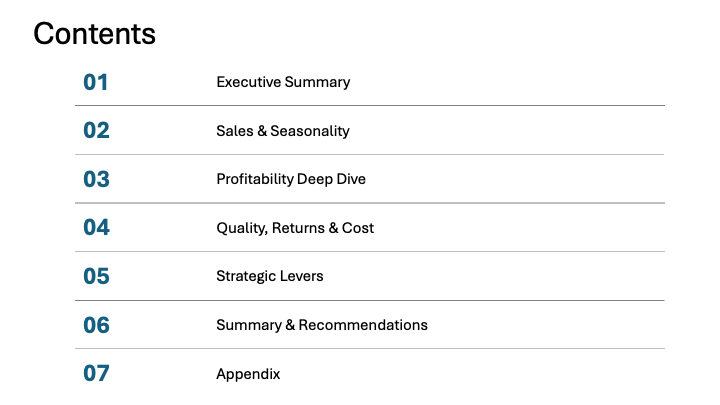

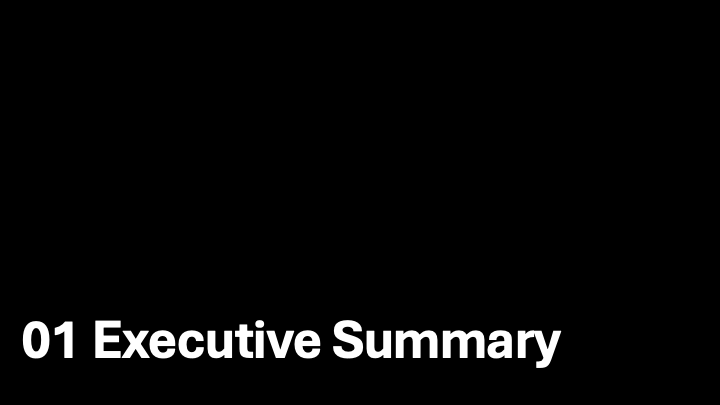

In [7]:
# Determine data range of dataset

df["Order Date"] = pd.to_datetime(df["Order Date"])

first_date = df["Order Date"].min()
last_date = df["Order Date"].max()

# Calculate number of months
months = (last_date.year - first_date.year) * 12 + (last_date.month - first_date.month)

print(f"First Date: {first_date.strftime('%Y-%m-%d')}")
print(f"Last Date: {last_date.strftime('%Y-%m-%d')}")
print(f"Date Range: {(last_date - first_date).days} days")
print(f"Months Covered: {months} months")

First Date: 2023-01-01
Last Date: 2025-10-31
Date Range: 1034 days
Months Covered: 33 months


In [8]:
# Print the dataset columns

# Drop all the temporary calculation columns

temp_cols = ['Revenue_Calculated', 'Profit_Calculated', 'Profit_Margin_%', 
             'Revenue_Difference', 'Profit_Difference', 'Revenue_Alt1', 
             'Profit_Alt1', 'Profit_Alt2']

# Which leaves the columns in the original dataset

print("\nColumns in Dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")


Columns in Dataset:
   1. Order Date
   2. Product ID
   3. Product
   4. Quantity
   5. Price
   6. Cost
   7. Discount
   8. Revenue
   9. Profit
  10. Delivery Time (Days)
  11. Returned
  12. Customer Name
  13. Region


In [9]:
# Generate a summary metrics table for Executive Summary


# ========== SUMMARY METRICS ==========

# 1. Total Revenue
total_revenue = df['Revenue'].sum()

# 2. Total Profit
total_profit = df['Profit'].sum()

# 3. Profit Margin %
profit_margin = (total_profit / total_revenue * 100)

# 4. Total Orders
total_orders = len(df)

# 5. Return Rate %
return_rate = (df['Returned'].sum() / total_orders * 100)

# 6. Average Delivery Time
avg_delivery_time = df['Delivery Time (Days)'].mean()

# Create summary table
summary_data = {
    'Metric': [
        'Total Revenue',
        'Total Profit',
        'Profit Margin %',
        'Total Orders',
        'Return Rate %',
        'Average Delivery Time'
    ],
    'Value': [
        f'£{total_revenue:,.2f}',
        f'£{total_profit:,.2f}',
        f'{profit_margin:.2f}%',
        f'{total_orders:,}',
        f'{return_rate:.2f}%',
        f'{avg_delivery_time:.1f} days'
    ]
}

summary_df = pd.DataFrame(summary_data)
print("=" * 50)
print("BUSINESS SUMMARY METRICS")
print("=" * 50)
print(summary_df.to_string(index=False))
print()

# ========== TOP 5 BEST-SELLING PRODUCTS ==========
print("=" * 50)
print("TOP 5 BEST-SELLING PRODUCTS (by Quantity)")
print("=" * 50)
best_selling = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
best_selling_df = pd.DataFrame({
    'Product': best_selling.index,
    'Quantity Sold': best_selling.values
})
print(best_selling_df.to_string(index=False))
print()

# ========== TOP 5 MOST PROFITABLE PRODUCTS ==========
print("=" * 50)
print("TOP 5 MOST PROFITABLE PRODUCTS")
print("=" * 50)
most_profitable = df.groupby('Product')['Profit'].sum().sort_values(ascending=False).head(5)
most_profitable_df = pd.DataFrame({
    'Product': most_profitable.index,
    'Total Profit': [f'£{x:,.2f}' for x in most_profitable.values]
})
print(most_profitable_df.to_string(index=False))
print()

# ========== TOP 3 UNDERPERFORMING REGIONS ==========
print("=" * 50)
print("TOP 3 UNDERPERFORMING REGIONS (by Profit)")
print("=" * 50)
underperforming_regions = df.groupby('Region')['Profit'].sum().sort_values().head(3)
underperforming_df = pd.DataFrame({
    'Region': underperforming_regions.index,
    'Total Profit': [f'£{x:,.2f}' for x in underperforming_regions.values]
})
print(underperforming_df.to_string(index=False))
print()

# ========== TOP 3 PERFORMING REGIONS ==========
print("=" * 50)
print("TOP 3 PERFORMING REGIONS (by Profit)")
print("=" * 50)
top_regions = df.groupby('Region')['Profit'].sum().sort_values(ascending=False).head(3)
topperforming_df = pd.DataFrame({
    'Region': top_regions.index,
    'Total Profit': [f'£{x:,.2f}' for x in top_regions.values]
})
print(topperforming_df.to_string(index=False))
print()

BUSINESS SUMMARY METRICS
               Metric          Value
        Total Revenue £11,432,426.50
         Total Profit  £9,352,014.30
      Profit Margin %         81.80%
         Total Orders          6,000
        Return Rate %          6.90%
Average Delivery Time       8.0 days

TOP 5 BEST-SELLING PRODUCTS (by Quantity)
     Product  Quantity Sold
 Office Desk           1901
Dining Table           1895
    Armchair           1886
   Bookshelf           1868
   Bed Frame           1802

TOP 5 MOST PROFITABLE PRODUCTS
     Product  Total Profit
    Wardrobe £1,919,112.50
   Bed Frame £1,261,816.00
Dining Table £1,244,505.00
        Sofa £1,233,972.00
 Office Desk £1,132,336.00

TOP 3 UNDERPERFORMING REGIONS (by Profit)
    Region  Total Profit
North East £1,136,743.00
  Scotland £1,139,091.50
South West £1,149,154.90

TOP 3 PERFORMING REGIONS (by Profit)
    Region  Total Profit
South East £1,222,524.70
     Wales £1,203,434.70
North West £1,187,920.00



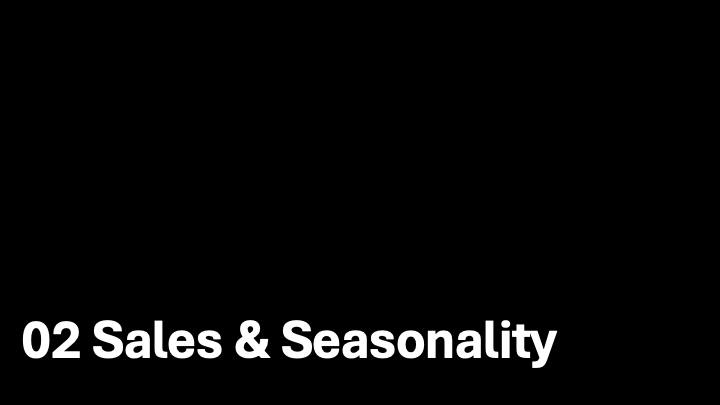

In [10]:
# Create summary

product_summary = df.groupby(['Product ID', 'Product']).agg({
    'Price': 'first',
    'Cost': 'first',
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum',
    'Product ID': 'count'
}).round(2)

product_summary.columns = ['Price', 'Cost', 'Units_Sold', 'Total_Revenue', 'Total_Profit', 'Orders']
product_summary['Profit_Per_Unit'] = (product_summary['Total_Profit'] / product_summary['Units_Sold']).round(2)
product_summary['Margin_%'] = ((product_summary['Total_Profit'] / product_summary['Total_Revenue']) * 100).round(1)
product_summary = product_summary.sort_values('Total_Profit', ascending=False)

# Format for display
print("=" * 120)
print("COMPREHENSIVE PRODUCT PERFORMANCE SUMMARY")
print("=" * 120)
print(f"\nTotal Products: {len(product_summary)}")
print(f"Total Units Sold: {product_summary['Units_Sold'].sum():,}")
print(f"Total Revenue: £{product_summary['Total_Revenue'].sum():,.2f}")
print(f"Total Profit: £{product_summary['Total_Profit'].sum():,.2f}")

print("\n" + "-" * 120)

# Reset index to make Product ID and Product regular columns
product_summary_export = product_summary.reset_index()

# Reorder columns for better readability
column_order = ['Product ID', 'Product', 'Price', 'Cost', 'Margin_%', 
                'Units_Sold', 'Orders', 'Profit_Per_Unit', 
                'Total_Revenue', 'Total_Profit']
product_summary_export = product_summary_export[column_order]

# Save to CSV
product_summary_export.to_csv('product_performance_summary.csv', index=False)
print("✓ Exported to product_performance_summary.csv")

# Display
print("\nPRODUCT PERFORMANCE SUMMARY")
print(product_summary_export.to_string(index=False))

COMPREHENSIVE PRODUCT PERFORMANCE SUMMARY

Total Products: 10
Total Units Sold: 17,973
Total Revenue: £11,432,426.50
Total Profit: £9,352,014.30

------------------------------------------------------------------------------------------------------------------------
✓ Exported to product_performance_summary.csv

PRODUCT PERFORMANCE SUMMARY
Product ID          Product  Price  Cost  Margin_%  Units_Sold  Orders  Profit_Per_Unit  Total_Revenue  Total_Profit
     P1005         Wardrobe   1500   250      83.3        1752     596          1095.38      2302935.0     1919112.5
     P1004        Bed Frame   1000   200      80.0        1802     603           700.23      1577270.0     1261816.0
     P1001     Dining Table    900   150      83.3        1895     647           656.73      1493406.0     1244505.0
     P1000             Sofa   1200   300      75.0        1577     521           782.48      1645296.0     1233972.0
     P1007      Office Desk    800   120      85.0        1901     614   

In [11]:
# Additional profit generated if profit margin of coffee table & sofa raised to 83%

target_products = ['Coffee Table', 'Sofa']
target_margin = 0.83  # 83%

# Get current data
current = df[df['Product'].isin(target_products)].groupby('Product').agg({
    'Revenue': 'sum',
    'Profit': 'sum'
})

# Calculate additional profit
current['New_Profit_at_83%'] = current['Revenue'] * target_margin
current['Additional_Profit'] = current['New_Profit_at_83%'] - current['Profit']

print("\nADDITIONAL PROFIT IF MARGIN RAISED TO 83%:")
print(current[['Profit', 'New_Profit_at_83%', 'Additional_Profit']])

print(f"\nTOTAL ADDITIONAL PROFIT: £{current['Additional_Profit'].sum():,.2f}")


ADDITIONAL PROFIT IF MARGIN RAISED TO 83%:
                 Profit  New_Profit_at_83%  Additional_Profit
Product                                                      
Coffee Table   251246.4          260668.14            9421.74
Sofa          1233972.0         1365595.68          131623.68

TOTAL ADDITIONAL PROFIT: £141,045.42


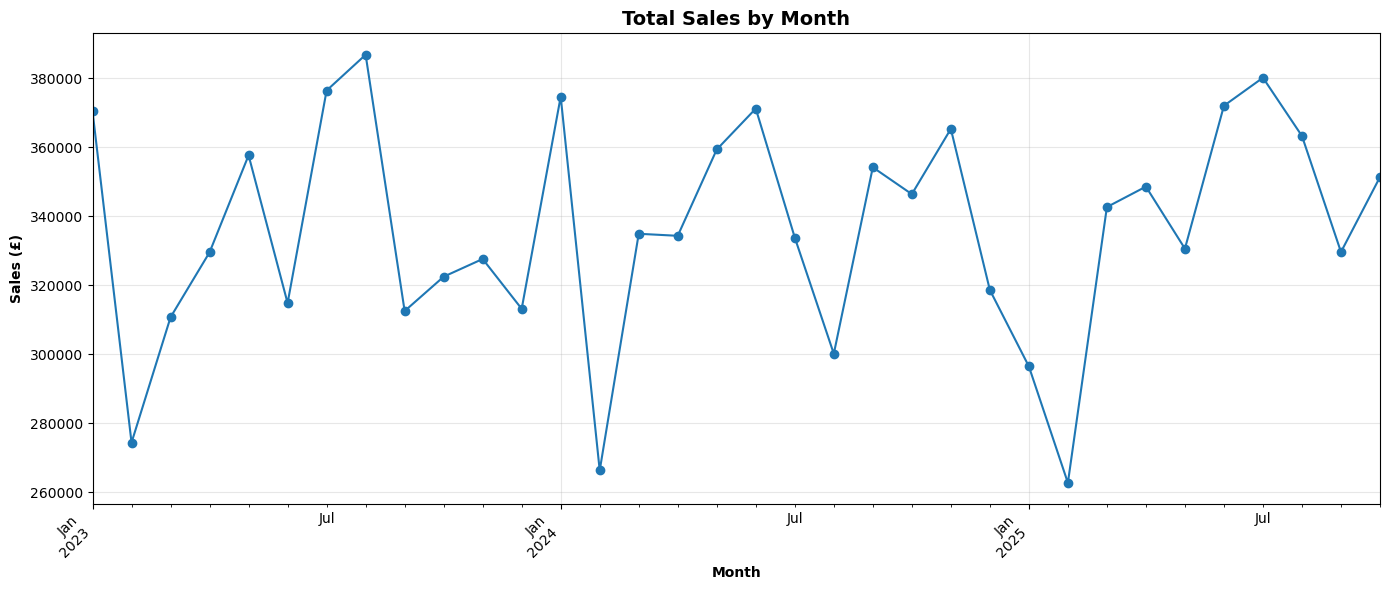

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Group by month and sum revenue
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Revenue'].sum()

# Plot
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title("Total Sales by Month", fontweight='bold', fontsize=14)
plt.xlabel("Month", fontweight='bold')
plt.ylabel("Sales (£)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('monthly_sales.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

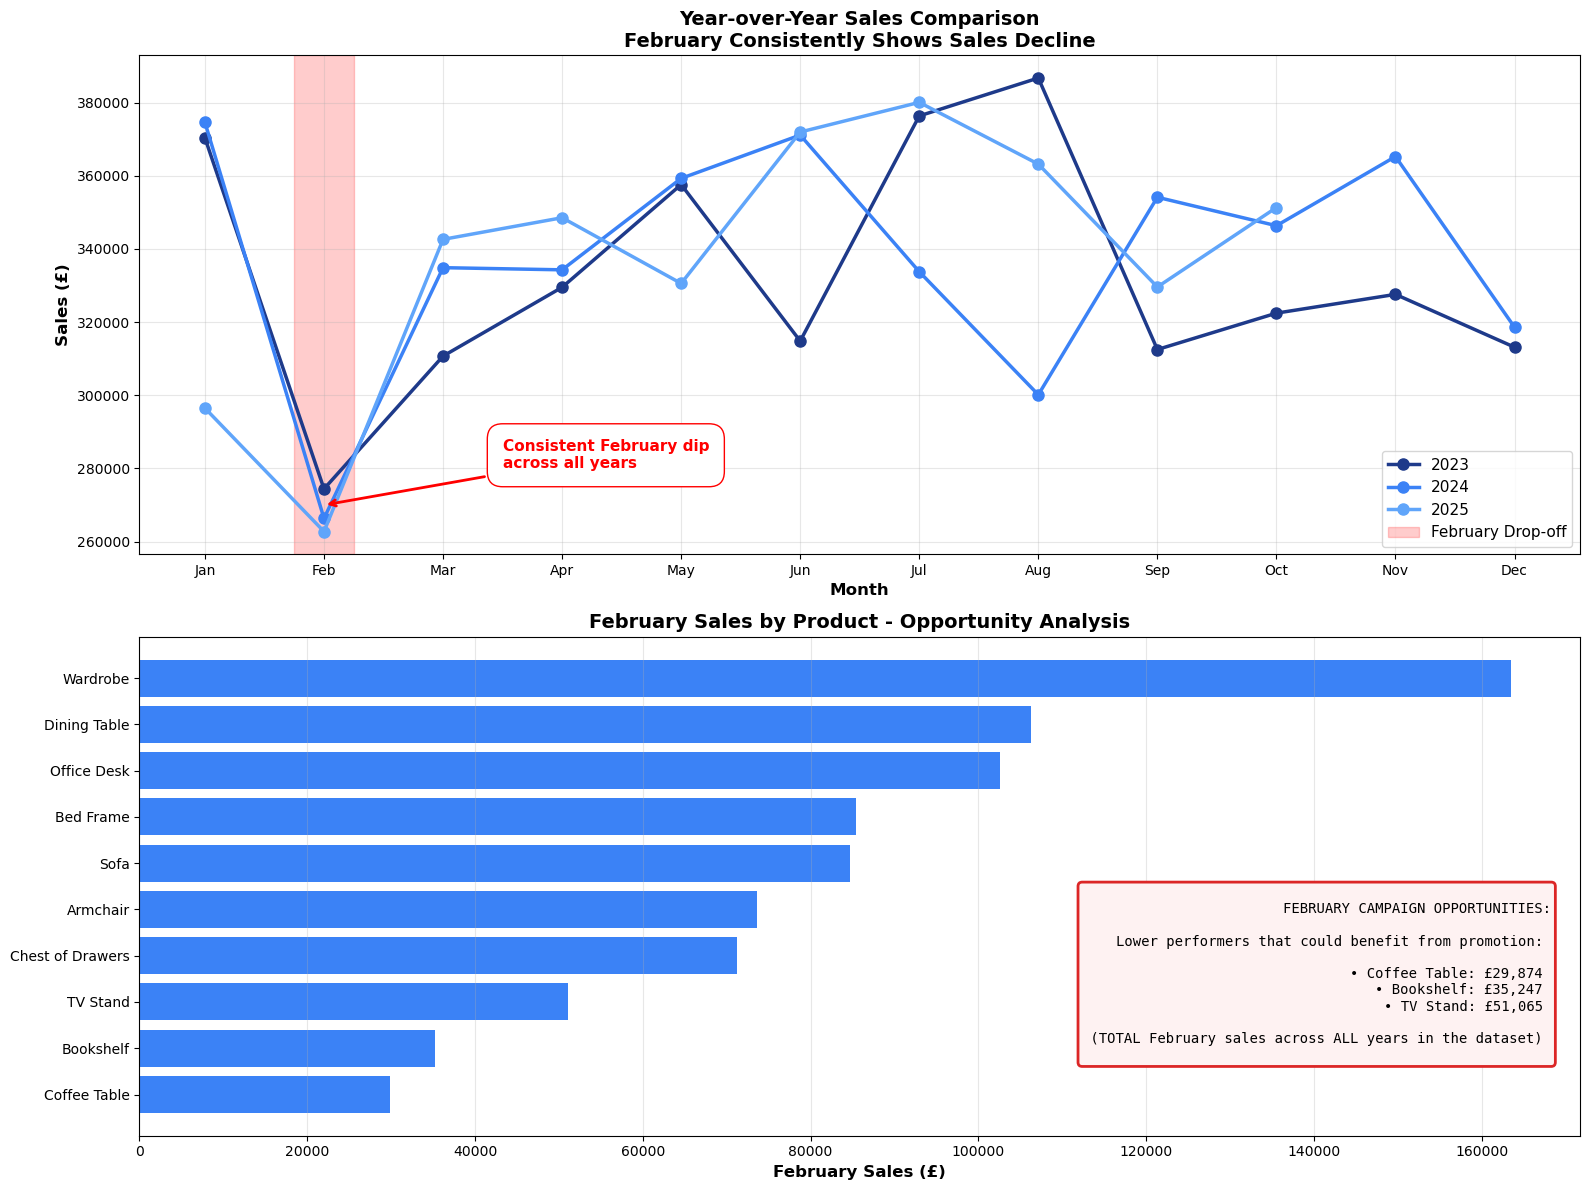

YEAR-OVER-YEAR ANALYSIS
Jan: -20.9% YoY
Feb: -1.3% YoY
Mar: +2.3% YoY
Apr: +4.3% YoY
May: -8.0% YoY
Jun: +0.2% YoY
Jul: +13.9% YoY
Aug: +21.0% YoY
Sep: -6.9% YoY
Oct: +1.4% YoY
Nov: +11.5% YoY
Dec: +1.7% YoY

FEBRUARY OPPORTUNITY ANALYSIS
Average Monthly Sales: £336,248
Average February Sales: £267,837
February Deficit: £68,411 (20.3% below average)

RECOMMENDED FEBRUARY CAMPAIGNS

Products with Highest February Underperformance:
(Opportunity for targeted campaigns)
1. Sofa: 38.2% below monthly average
2. Bed Frame: 35.0% below monthly average
3. Wardrobe: 14.8% below monthly average
4. Dining Table: 14.6% below monthly average
5. Bookshelf: 13.6% below monthly average

CAMPAIGN RECOMMENDATIONS FOR FEBRUARY 2026

1. ❄️ "February Essentials" Bundle Campaign
   Products: Sofa, Bed Frame, Wardrobe
   Strategy: Bundle 3 underperforming items at 15% discount
   Target: £27,364 recovery (40% of deficit)

2. 💡 "Winter Workspace Refresh"
   Products: Desk, Chair, Lighting
   Strategy: Position

In [13]:
# Assuming you have your dataframe 'df' with 'Order Date' and 'Revenue' columns
# Convert Order Date to datetime if not already done

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create year and month columns
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Month_Name'] = df['Order Date'].dt.strftime('%b')

# Calculate monthly sales by year
monthly_sales_by_year = df.groupby(['Year', 'Month', 'Month_Name'])['Revenue'].sum().reset_index()

# Year-over-year comparison chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Year-over-year comparison
years = monthly_sales_by_year['Year'].unique()
colors = ['#1e3a8a', '#3b82f6', '#60a5fa']

for i, year in enumerate(years):
    year_data = monthly_sales_by_year[monthly_sales_by_year['Year'] == year]
    ax1.plot(year_data['Month'], year_data['Revenue'], 
             marker='o', linewidth=2.5, markersize=8, 
             label=f'{year}', color=colors[i % len(colors)])

# Highlight February
feb_months = [2]
ax1.axvspan(1.75, 2.25, alpha=0.2, color='red', label='February Drop-off')

ax1.set_xlabel('Month', fontweight='bold', fontsize=12)
ax1.set_ylabel('Sales (£)', fontweight='bold', fontsize=12)
ax1.set_title('Year-over-Year Sales Comparison\nFebruary Consistently Shows Sales Decline', 
              fontweight='bold', fontsize=14)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)
ax1.ticklabel_format(style='plain', axis='y')

# Add annotation for February
ax1.annotate('Consistent February dip\nacross all years', 
            xy=(2, 270000), xytext=(3.5, 280000),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11, color='red', fontweight='bold',
            bbox=dict(boxstyle='round,pad=1', facecolor='white', edgecolor='red'))

# Plot 2: February analysis - product performance
feb_data = df[df['Month'] == 2]
feb_product_sales = feb_data.groupby('Product')['Revenue'].sum().sort_values(ascending=True)

ax2.barh(range(len(feb_product_sales)), feb_product_sales.values, color='#3b82f6')
ax2.set_yticks(range(len(feb_product_sales)))
ax2.set_yticklabels(feb_product_sales.index, fontsize=10)
ax2.set_xlabel('February Sales (£)', fontweight='bold', fontsize=12)
ax2.set_title('February Sales by Product - Opportunity Analysis', fontweight='bold', fontsize=14)
ax2.grid(axis='x', alpha=0.3)
ax2.ticklabel_format(style='plain', axis='x')

# Add campaign suggestions
campaign_text = """
FEBRUARY CAMPAIGN OPPORTUNITIES:

Lower performers that could benefit from promotion: 
"""
lowest_3 = feb_product_sales.head(3)
for product, sales in lowest_3.items():
    campaign_text += f"\n• {product}: £{sales:,.0f} "

campaign_text += "\n\n (TOTAL February sales across ALL years in the dataset) "

campaign_text += "\n"  # Add this line for bottom spacing

ax2.text(0.98, 0.5, campaign_text, transform=ax2.transAxes,
        fontsize=10, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='#fef2f2', 
                 edgecolor='#dc2626', linewidth=2),
        fontfamily='monospace')

plt.tight_layout()
plt.savefig('yoy_comparison_with_campaigns.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate YoY growth rates
print("=" * 70)
print("YEAR-OVER-YEAR ANALYSIS")
print("=" * 70)

for month in range(1, 13):
    month_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][month-1]
    month_data = monthly_sales_by_year[monthly_sales_by_year['Month'] == month]
    
    if len(month_data) >= 2:
        sales_values = month_data.sort_values('Year')['Revenue'].values
        if len(sales_values) >= 2:
            yoy_growth = ((sales_values[-1] - sales_values[-2]) / sales_values[-2] * 100)
            print(f"{month_name}: {yoy_growth:+.1f}% YoY")

# February-specific analysis
print("\n" + "=" * 70)
print("FEBRUARY OPPORTUNITY ANALYSIS")
print("=" * 70)

feb_sales = monthly_sales_by_year[monthly_sales_by_year['Month'] == 2]['Revenue'].mean()
avg_sales = monthly_sales_by_year['Revenue'].mean()
feb_deficit = avg_sales - feb_sales
feb_deficit_pct = (feb_deficit / avg_sales * 100)

print(f"Average Monthly Sales: £{avg_sales:,.0f}")
print(f"Average February Sales: £{feb_sales:,.0f}")
print(f"February Deficit: £{feb_deficit:,.0f} ({feb_deficit_pct:.1f}% below average)")

print("\n" + "=" * 70)
print("RECOMMENDED FEBRUARY CAMPAIGNS")
print("=" * 70)

# Analyze which products perform worst in February
feb_product_avg = feb_data.groupby('Product').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Returned': lambda x: (x.sum() / len(x) * 100)
}).round(2)

# Calculate average sales per product across all months
all_months_product = df.groupby('Product')['Revenue'].sum() / df['Year'].nunique() / 12

# Find products with biggest February underperformance
feb_product_monthly_avg = feb_product_avg['Revenue'] / df[df['Month'] == 2]['Year'].nunique()
underperformance = ((all_months_product - feb_product_monthly_avg) / all_months_product * 100).sort_values(ascending=False)

print("\nProducts with Highest February Underperformance:")
print("(Opportunity for targeted campaigns)")
for i, (product, pct) in enumerate(underperformance.head(5).items(), 1):
    print(f"{i}. {product}: {pct:.1f}% below monthly average")

# Campaign recommendations
print("\n" + "=" * 70)
print("CAMPAIGN RECOMMENDATIONS FOR FEBRUARY 2026")
print("=" * 70)

campaigns = [
    {
        'name': '❄️ "February Essentials" Bundle Campaign',
        'products': underperformance.head(3).index.tolist(),
        'strategy': 'Bundle 3 underperforming items at 15% discount',
        'target': f'£{feb_deficit * 0.4:,.0f} recovery (40% of deficit)'
    },
    {
        'name': '💡 "Winter Workspace Refresh"',
        'products': ['Desk', 'Chair', 'Lighting'],
        'strategy': 'Position as "New Year, New Workspace" campaign with free delivery',
        'target': f'£{feb_deficit * 0.3:,.0f} recovery (30% of deficit)'
    },
    {
        'name': '🎯 "Flash Friday" Weekly Sales',
        'products': 'Rotate lowest performers',
        'strategy': '25% off featured product every Friday in February',
        'target': f'£{feb_deficit * 0.2:,.0f} recovery (20% of deficit)'
    },
    {
        'name': '📧 Email Campaign: "Beat the February Blues"',
        'products': 'All products',
        'strategy': 'Send targeted emails to customers who bought in Jan/Dec',
        'target': f'£{feb_deficit * 0.1:,.0f} recovery (10% of deficit)'
    }
]

for i, campaign in enumerate(campaigns, 1):
    print(f"\n{i}. {campaign['name']}")
    if isinstance(campaign['products'], list):
        print(f"   Products: {', '.join(campaign['products'])}")
    else:
        print(f"   Products: {campaign['products']}")
    print(f"   Strategy: {campaign['strategy']}")
    print(f"   Target: {campaign['target']}")

print("\n" + "=" * 70)
print(f"TOTAL RECOVERY TARGET: £{feb_deficit:,.0f}")
print("=" * 70)

JANUARY YEAR-BY-YEAR BREAKDOWN
       Revenue  Num_Orders  Total_Quantity  Avg_Discount_%  Return_Rate_%
Year                                                                     
2023  370354.0         186             579            13.0           8.06
2024  374603.5         186             580            13.0           7.53
2025  296482.0         167             465            13.0          10.18


What Changed from January 2024 to January 2025:
--------------------------------------------------------------------------------
Revenue: £-78,122 (-20.9%)
Orders: -19 (-10.2%)
Avg Discount: +0.0 percentage points
Return Rate: +2.6 percentage points

JANUARY PRODUCT PERFORMANCE - YEAR-OVER-YEAR

Products Contributing to January Decline (Jan 2024 vs Jan 2025):
--------------------------------------------------------------------------------
Bed Frame: £-39,750 (-54.0%)
Wardrobe: £-31,305 (-36.4%)
Office Desk: £-26,080 (-50.3%)
Armchair: £-8,035 (-27.7%)
TV Stand: £-5,316 (-32.7%)

JANUARY VS 

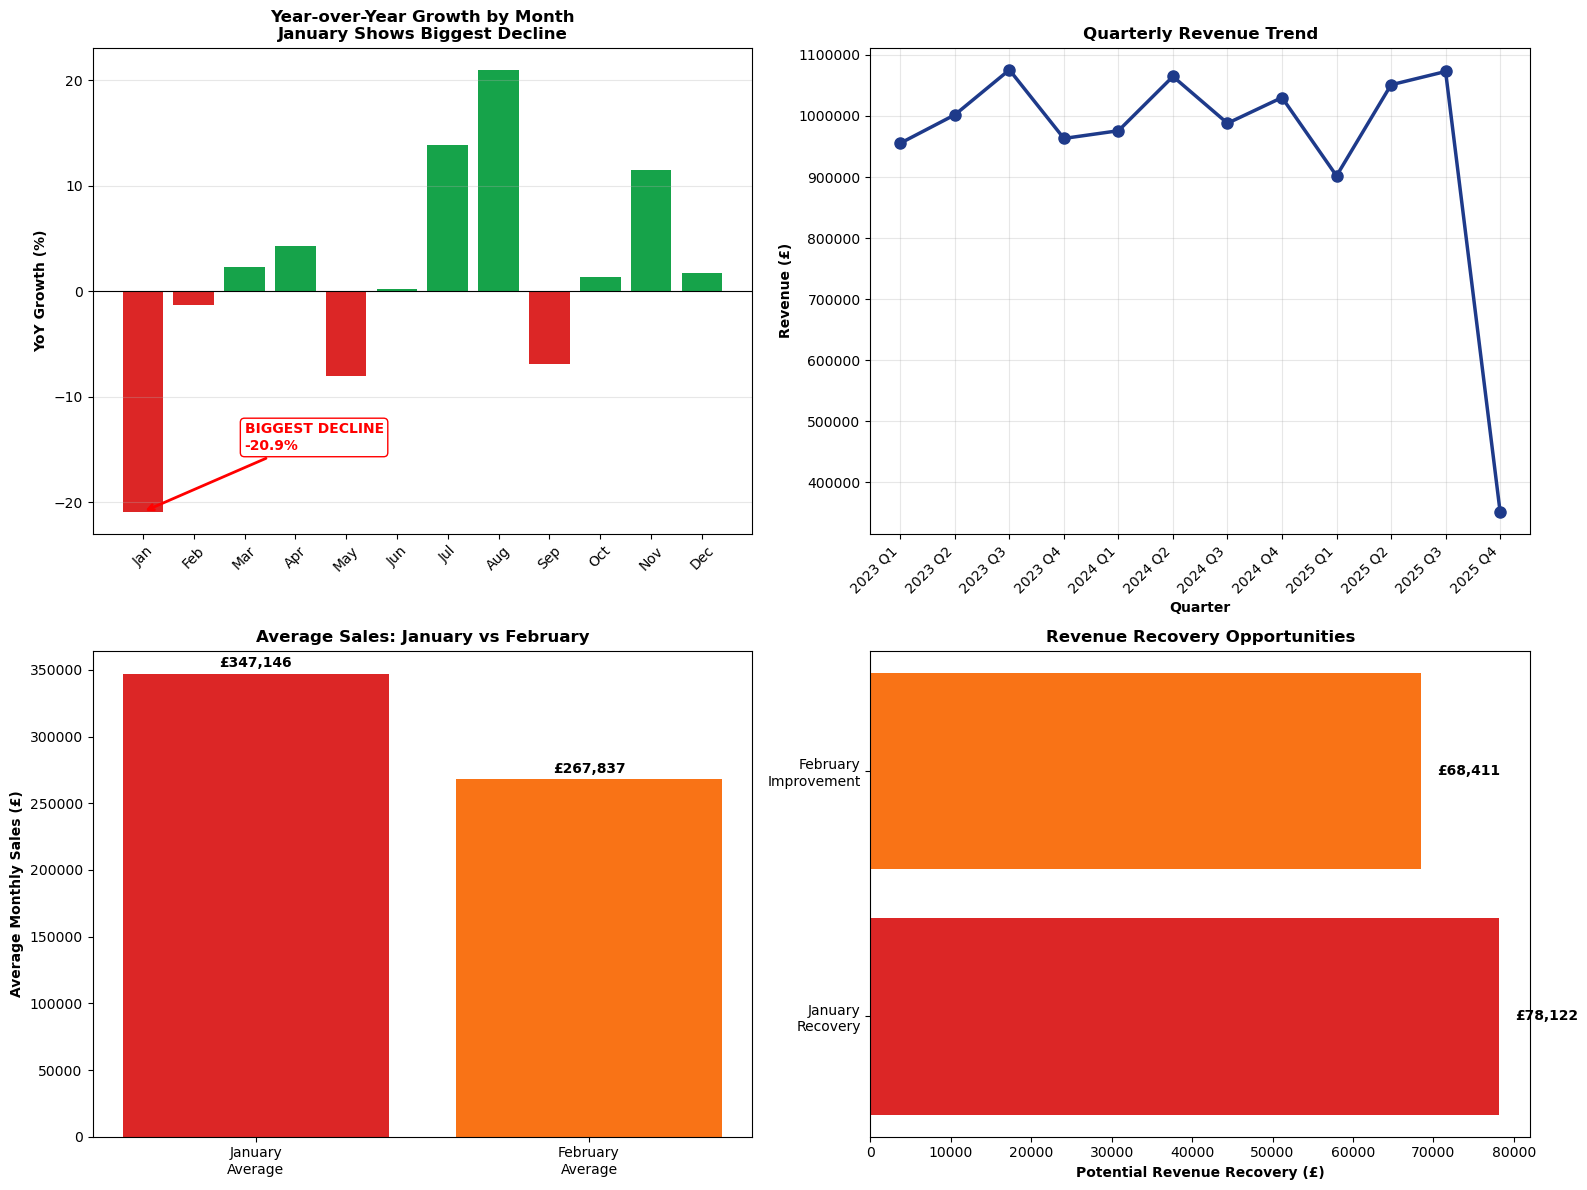


✓ Analysis complete! Chart saved as 'jan_feb_opportunity_analysis.png'


In [14]:
# Let's analyze what changed in January

# Compare January performance across years
jan_analysis = df[df['Month'] == 1].groupby('Year').agg({
    'Revenue': 'sum',
    'Product ID': 'count',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Returned': lambda x: (x.sum() / len(x) * 100)
}).round(2)

jan_analysis.columns = ['Revenue', 'Num_Orders', 'Total_Quantity', 'Avg_Discount_%', 'Return_Rate_%']
jan_analysis['Avg_Discount_%'] = (jan_analysis['Avg_Discount_%'] * 100).round(1)

print("=" * 80)
print("JANUARY YEAR-BY-YEAR BREAKDOWN")
print("=" * 80)
print(jan_analysis)
print()

# Calculate what changed
if len(jan_analysis) >= 2:
    latest_year = jan_analysis.index[-1]
    previous_year = jan_analysis.index[-2]
    
    print(f"\nWhat Changed from January {previous_year} to January {latest_year}:")
    print("-" * 80)
    
    revenue_change = jan_analysis.loc[latest_year, 'Revenue'] - jan_analysis.loc[previous_year, 'Revenue']
    orders_change = jan_analysis.loc[latest_year, 'Num_Orders'] - jan_analysis.loc[previous_year, 'Num_Orders']
    discount_change = jan_analysis.loc[latest_year, 'Avg_Discount_%'] - jan_analysis.loc[previous_year, 'Avg_Discount_%']
    return_change = jan_analysis.loc[latest_year, 'Return_Rate_%'] - jan_analysis.loc[previous_year, 'Return_Rate_%']
    
    print(f"Revenue: £{revenue_change:,.0f} ({revenue_change/jan_analysis.loc[previous_year, 'Revenue']*100:+.1f}%)")
    print(f"Orders: {orders_change:,.0f} ({orders_change/jan_analysis.loc[previous_year, 'Num_Orders']*100:+.1f}%)")
    print(f"Avg Discount: {discount_change:+.1f} percentage points")
    print(f"Return Rate: {return_change:+.1f} percentage points")

# Analyze January by product - which products drove the decline?
print("\n" + "=" * 80)
print("JANUARY PRODUCT PERFORMANCE - YEAR-OVER-YEAR")
print("=" * 80)

jan_product_yoy = df[df['Month'] == 1].groupby(['Year', 'Product'])['Revenue'].sum().reset_index()
jan_pivot = jan_product_yoy.pivot(index='Product', columns='Year', values='Revenue').fillna(0)

if len(jan_pivot.columns) >= 2:
    latest_col = jan_pivot.columns[-1]
    previous_col = jan_pivot.columns[-2]
    
    jan_pivot['YoY_Change'] = jan_pivot[latest_col] - jan_pivot[previous_col]
    jan_pivot['YoY_Change_%'] = (jan_pivot['YoY_Change'] / jan_pivot[previous_col] * 100).fillna(0)
    jan_pivot = jan_pivot.sort_values('YoY_Change')
    
    print(f"\nProducts Contributing to January Decline (Jan {previous_col} vs Jan {latest_col}):")
    print("-" * 80)
    for product in jan_pivot.head(5).index:
        change = jan_pivot.loc[product, 'YoY_Change']
        change_pct = jan_pivot.loc[product, 'YoY_Change_%']
        print(f"{product}: £{change:,.0f} ({change_pct:+.1f}%)")

# Comparison: January vs February absolute values
print("\n" + "=" * 80)
print("JANUARY VS FEBRUARY - ABSOLUTE COMPARISON")
print("=" * 80)

jan_avg = df[df['Month'] == 1]['Revenue'].sum() / df[df['Month'] == 1]['Year'].nunique()
feb_avg = df[df['Month'] == 2]['Revenue'].sum() / df[df['Month'] == 2]['Year'].nunique()

print(f"Average January Sales: £{jan_avg:,.0f}")
print(f"Average February Sales: £{feb_avg:,.0f}")
print(f"Difference: £{jan_avg - feb_avg:,.0f}")

if jan_avg > feb_avg:
    print(f"\n✓ January is still {((jan_avg - feb_avg)/feb_avg*100):.1f}% higher than February on average")
    print("✓ But January is declining rapidly (-20.9% YoY)")
    print("✓ February is stable but chronically low")
else:
    print(f"\n✗ January has fallen below February!")

# Strategic recommendations
print("\n" + "=" * 80)
print("STRATEGIC RECOMMENDATIONS - PRIORITIZED")
print("=" * 80)

# Calculate January revenue loss
jan_current = jan_analysis.iloc[-1]['Revenue']
jan_previous = jan_analysis.iloc[-2]['Revenue']
jan_loss = jan_previous - jan_current

print(f"""
PRIORITY 1: RECOVER JANUARY SALES (URGENT)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Revenue at Risk: £{jan_loss:,.0f}
Urgency: HIGH - This is a new problem that's getting worse
Recovery Potential: HIGH - You had this revenue last year

ACTION PLAN FOR JANUARY 2026:

1. 🎯 "New Year, New Workspace" Campaign (Launch Dec 26-Jan 15)
   - Target products that declined most
   - Position as "fresh start" for the new year
   - Early bird discount for orders placed before Jan 10
   - Target: Recover 50% of loss = £{jan_loss * 0.5:,.0f}

2. 📧 Win Back Lost January Customers
   - Identify customers who bought in Jan {previous_year} but not Jan {latest_year}
   - Send personalized "We Miss You" campaign
   - Offer 15% discount code valid Jan 1-31
   - Target: Recover 30% of loss = £{jan_loss * 0.3:,.0f}

3. 💰 Post-Holiday Promotion
   - Many competitors run sales in January
   - Launch "January Clearance" for slower-moving items
   - Bundle deals on products that declined most
   - Target: Recover 20% of loss = £{jan_loss * 0.2:,.0f}

4. 🔍 Investigate What Changed
   - Review: Did you stop any marketing campaigns?
   - Review: Did competitors launch aggressive January promotions?
   - Review: Were there delivery issues?
   - Review: Did pricing change?

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

feb_deficit = avg_sales - feb_avg

print(f"""
PRIORITY 2: ADDRESS CHRONIC FEBRUARY WEAKNESS (IMPORTANT)
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Chronic Deficit: £{feb_deficit:,.0f} below monthly average
Urgency: MODERATE - Stable but consistently underperforming
Recovery Potential: MODERATE - Structural issue, harder to fix

ACTION PLAN FOR FEBRUARY 2026:

1. ❄️ "Beat the Winter Blues" Campaign
   - Position products as mood-boosters for dreary February
   - Focus on lighting, desk accessories, comfortable seating
   - Target: £{feb_deficit * 0.3:,.0f}

2. ❤️ Valentine's "Workspace Love" Campaign (Feb 10-14)
   - Gift-friendly items at special pricing
   - "Treat yourself" messaging
   - Target: £{feb_deficit * 0.2:,.0f}

3. 🎯 February Flash Sales
   - Weekly 24-hour flash sales on different products
   - Create urgency in typically slow month
   - Target: £{feb_deficit * 0.2:,.0f}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

print(f"""
BOTTOM LINE:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
- January is your BIGGEST opportunity: £{jan_loss:,.0f} in recently lost revenue
- February is important but more structural: £{feb_deficit:,.0f} chronic gap
- Focus 70% of resources on January, 30% on February
- January is easier to fix because you just need to recover what you recently lost
- Total Q1 opportunity: £{jan_loss + feb_deficit:,.0f}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. YoY growth by month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yoy_growth = [-20.9, -1.3, 2.3, 4.3, -8.0, 0.2, 13.9, 21.0, -6.9, 1.4, 11.5, 1.7]

colors = ['#dc2626' if x < 0 else '#16a34a' for x in yoy_growth]
axes[0, 0].bar(months, yoy_growth, color=colors)
axes[0, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[0, 0].set_title('Year-over-Year Growth by Month\nJanuary Shows Biggest Decline', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('YoY Growth (%)', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Highlight January
axes[0, 0].annotate('BIGGEST DECLINE\n-20.9%', xy=(0, -20.9), xytext=(2, -15),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=10, color='red', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='red'))

# 2. January trend across years
# Alternative: Quarterly trend analysis
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

quarterly_sales = df.groupby(['Year', 'Quarter'])['Revenue'].sum().reset_index()
quarterly_sales['Quarter_Label'] = quarterly_sales['Year'].astype(str) + ' Q' + quarterly_sales['Quarter'].astype(str)

axes[0, 1].plot(range(len(quarterly_sales)), quarterly_sales['Revenue'], marker='o', linewidth=2.5, color='#1e3a8a', markersize=8)
axes[0, 1].set_title('Quarterly Revenue Trend', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Quarter', fontweight='bold')
axes[0, 1].set_ylabel('Revenue (£)', fontweight='bold')
axes[0, 1].set_xticks(range(len(quarterly_sales)))
axes[0, 1].set_xticklabels(quarterly_sales['Quarter_Label'], rotation=45, ha='right')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].ticklabel_format(style='plain', axis='y')

# 3. January vs February average comparison
axes[1, 0].bar(['January\nAverage', 'February\nAverage'], [jan_avg, feb_avg], color=['#dc2626', '#f97316'])
axes[1, 0].set_title('Average Sales: January vs February', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Average Monthly Sales (£)', fontweight='bold')
axes[1, 0].ticklabel_format(style='plain', axis='y')
for i, v in enumerate([jan_avg, feb_avg]):
    axes[1, 0].text(i, v + 5000, f'£{v:,.0f}', ha='center', fontweight='bold')

# 4. Recovery opportunities
opportunities = ['January\nRecovery', 'February\nImprovement']
values = [jan_loss, feb_deficit]
colors_opp = ['#dc2626', '#f97316']
axes[1, 1].barh(opportunities, values, color=colors_opp)
axes[1, 1].set_title('Revenue Recovery Opportunities', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Potential Revenue Recovery (£)', fontweight='bold')
axes[1, 1].ticklabel_format(style='plain', axis='x')
for i, v in enumerate(values):
    axes[1, 1].text(v + 2000, i, f'£{v:,.0f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('jan_feb_opportunity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Analysis complete! Chart saved as 'jan_feb_opportunity_analysis.png'")

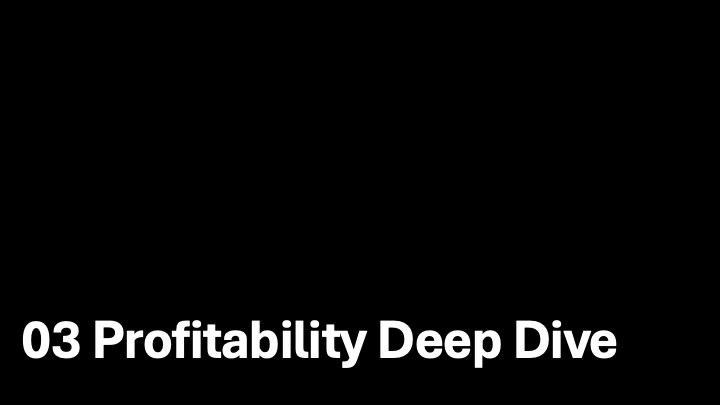

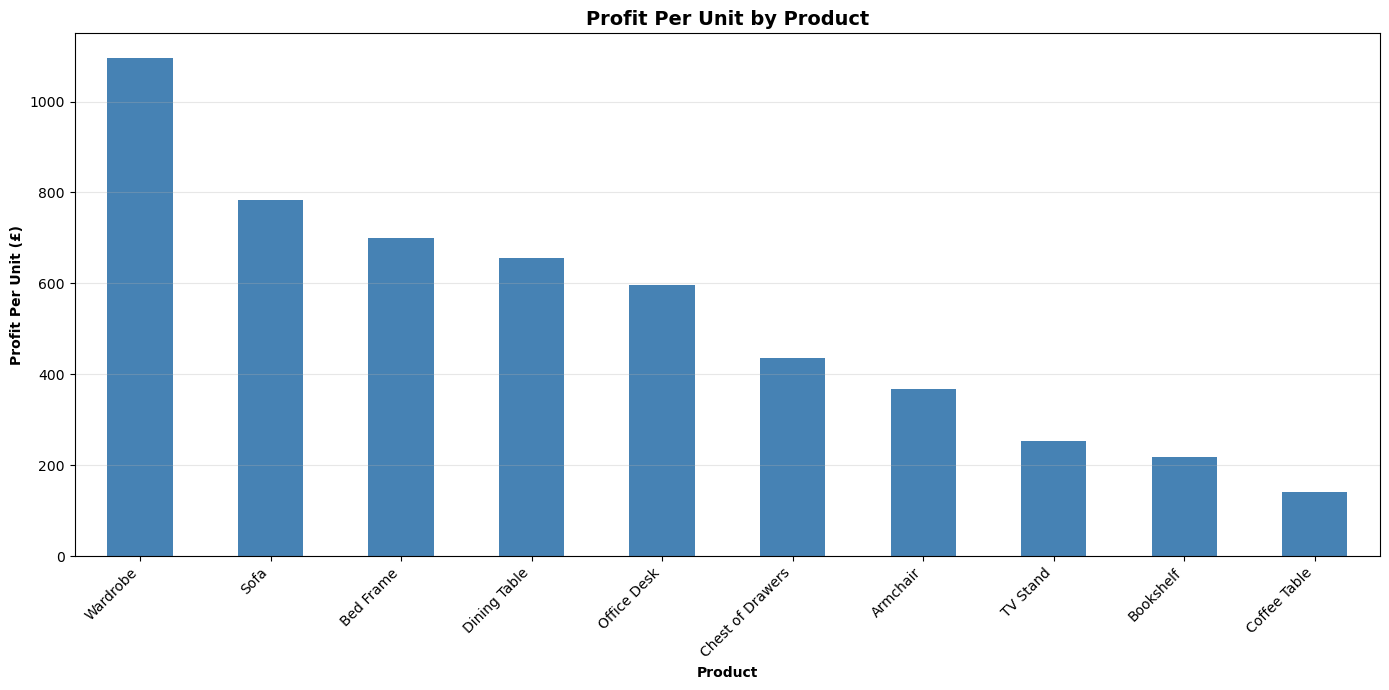

PROFIT PER UNIT BY PRODUCT
Wardrobe: £1095.38 per unit
Sofa: £782.48 per unit
Bed Frame: £700.23 per unit
Dining Table: £656.73 per unit
Office Desk: £595.65 per unit
Chest of Drawers: £436.12 per unit
Armchair: £367.92 per unit
TV Stand: £253.76 per unit
Bookshelf: £218.28 per unit
Coffee Table: £140.52 per unit


In [15]:
# Calculate profit per unit for each product

product_metrics = df.groupby('Product').agg({
    'Profit': 'sum',
    'Quantity': 'sum'
})

product_metrics['Profit_Per_Unit'] = product_metrics['Profit'] / product_metrics['Quantity']
profit_per_unit = product_metrics['Profit_Per_Unit'].sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(14, 7))
profit_per_unit.plot(kind='bar', color='steelblue')
plt.title("Profit Per Unit by Product", fontweight='bold', fontsize=14)
plt.xlabel("Product", fontweight='bold')
plt.ylabel("Profit Per Unit (£)", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('profit_per_unit.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the values
print("=" * 60)
print("PROFIT PER UNIT BY PRODUCT")
print("=" * 60)
for product, profit in profit_per_unit.items():
    print(f"{product}: £{profit:.2f} per unit")

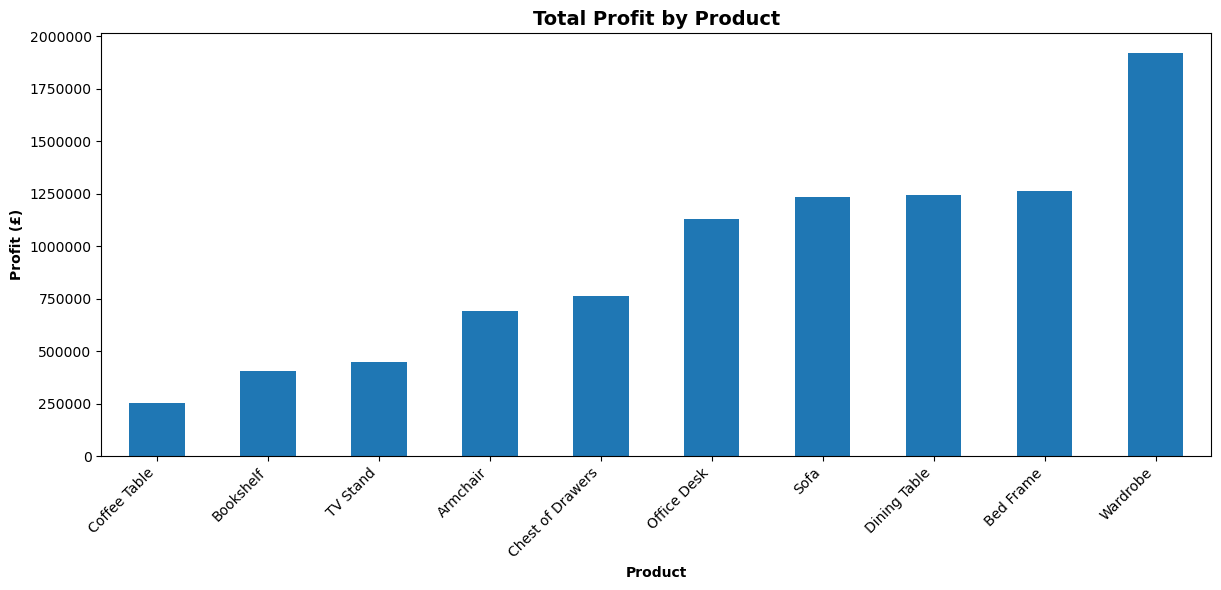

In [16]:
# Calculate total profit by product

total_profit_by_product = df.groupby("Product")["Profit"].sum().sort_values()

plt.figure(figsize=(12, 6))
total_profit_by_product.plot(kind="bar")

plt.title("Total Profit by Product", fontweight='bold', fontsize=14)
plt.xlabel("Product", fontweight='bold')
plt.ylabel("Profit (£)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.ticklabel_format(style='plain', axis='y')

plt.savefig('total_profit_by_product.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

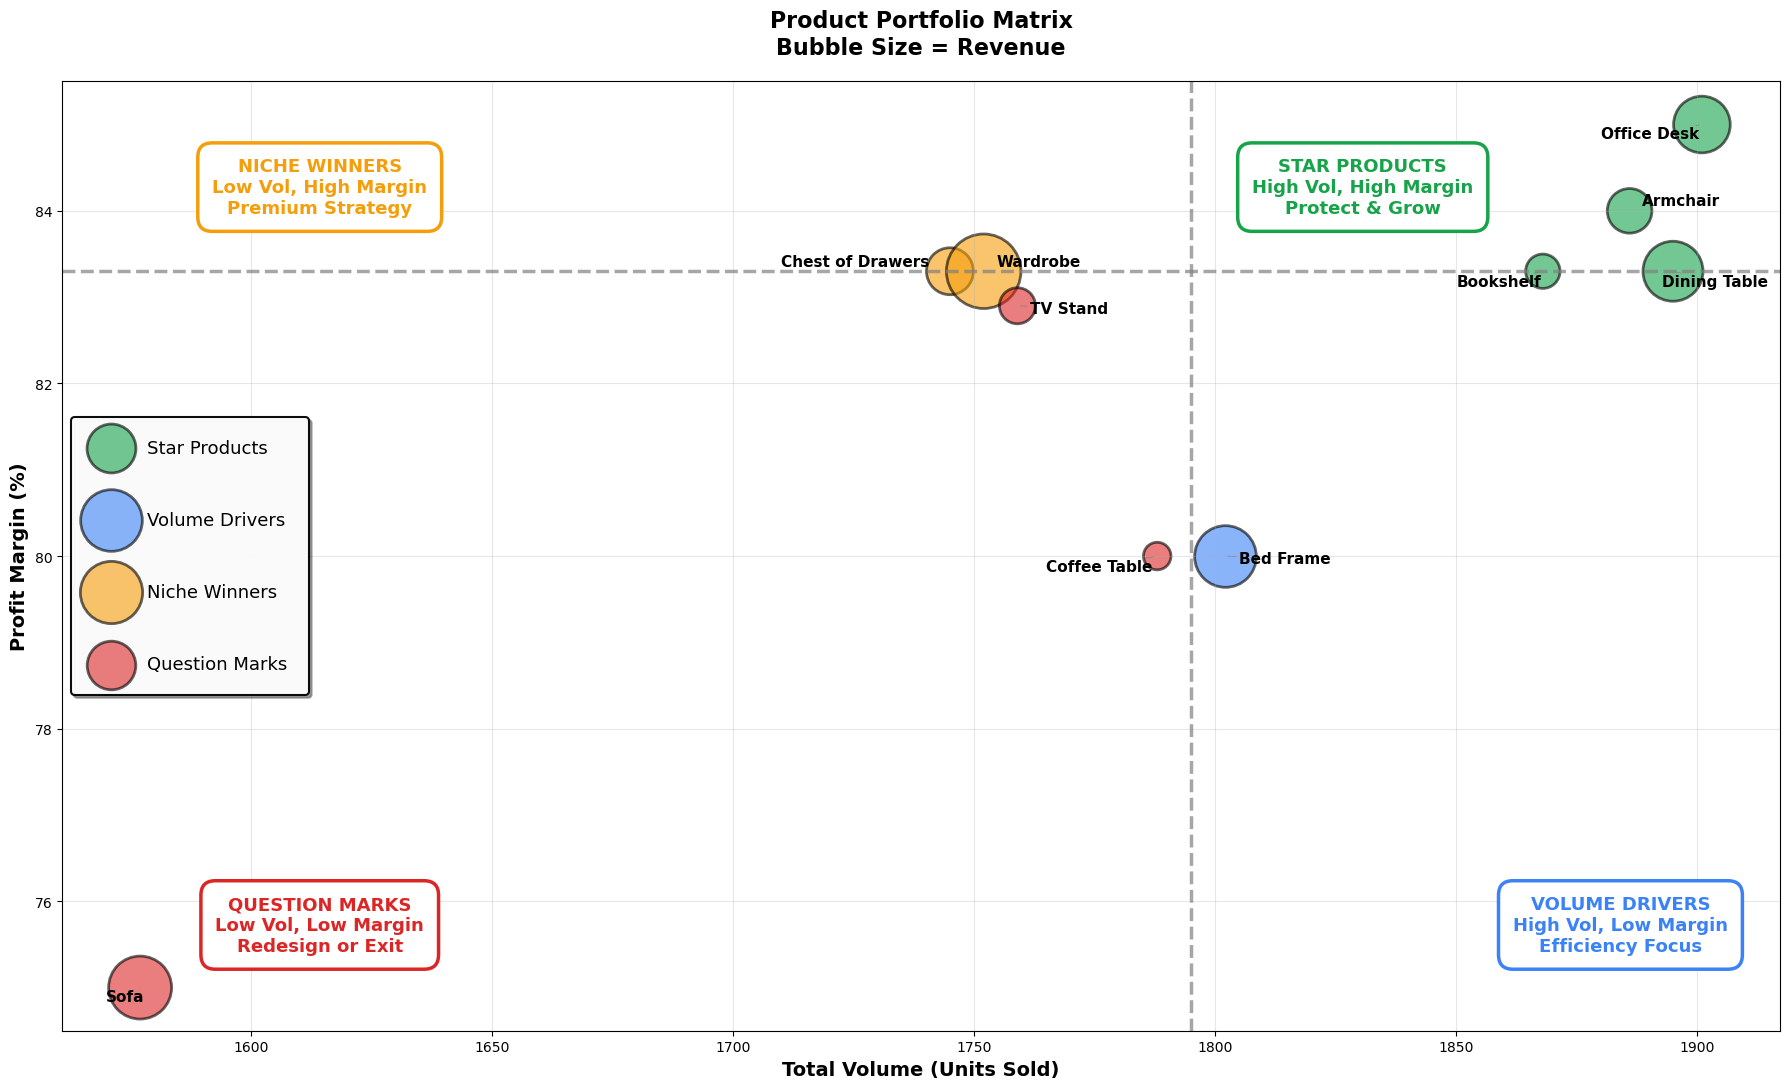

Chart saved with improved spacing!


In [17]:
# Calculate product metrics

product_analysis = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum',
    'Cost': 'sum',
    'Returned': lambda x: (x.sum() / len(x) * 100)
}).round(2)

# Calculate profit margin percentage
product_analysis['Profit_Margin_%'] = (product_analysis['Profit'] / product_analysis['Revenue'] * 100).round(1)
product_analysis['Return_Rate_%'] = product_analysis['Returned'].round(1)

# Determine thresholds (using median as the split)
median_volume = product_analysis['Quantity'].median()
median_margin = product_analysis['Profit_Margin_%'].median()

# Categorize products into quadrants
def categorize_product(row):
    if row['Quantity'] >= median_volume and row['Profit_Margin_%'] >= median_margin:
        return 'Star Products'
    elif row['Quantity'] >= median_volume and row['Profit_Margin_%'] < median_margin:
        return 'Volume Drivers'
    elif row['Quantity'] < median_volume and row['Profit_Margin_%'] >= median_margin:
        return 'Niche Winners'
    else:
        return 'Question Marks'

product_analysis['Category'] = product_analysis.apply(categorize_product, axis=1)

# Color mapping for categories
category_colors = {
    'Star Products': '#16a34a',
    'Volume Drivers': '#3b82f6',
    'Niche Winners': '#f59e0b',
    'Question Marks': '#dc2626'
}

# Main Portfolio Matrix
fig1, ax = plt.subplots(figsize=(18, 11))

# Plot each category and collect labels
texts = []
for category, color in category_colors.items():
    mask = product_analysis['Category'] == category
    ax.scatter(
        product_analysis[mask]['Quantity'], 
        product_analysis[mask]['Profit_Margin_%'],
        s=product_analysis[mask]['Revenue'] / 800,
        c=color, 
        alpha=0.6, 
        edgecolors='black',
        linewidth=2,
        label=category
    )
    
    # Collect product labels for adjustment
    for idx, row in product_analysis[mask].iterrows():
        text = ax.text(
            row['Quantity'], 
            row['Profit_Margin_%'],
            idx,
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )
        texts.append(text)

# Adjust text to avoid overlaps
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add quadrant lines
ax.axvline(x=median_volume, color='gray', linestyle='--', linewidth=2.5, alpha=0.7)
ax.axhline(y=median_margin, color='gray', linestyle='--', linewidth=2.5, alpha=0.7)

# Get axis limits for positioning quadrant labels
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_range = x_max - x_min
y_range = y_max - y_min

# Position quadrant labels
ax.text(median_volume + x_range * 0.1, y_max - y_range * 0.08, 
        'STAR PRODUCTS\nHigh Vol, High Margin\nProtect & Grow', 
        fontsize=13, fontweight='bold', color='#16a34a',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#16a34a', linewidth=2.5),
        ha='center', va='top')

ax.text(x_min + x_range * 0.15, y_max - y_range * 0.08, 
        'NICHE WINNERS\nLow Vol, High Margin\nPremium Strategy', 
        fontsize=13, fontweight='bold', color='#f59e0b',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#f59e0b', linewidth=2.5),
        ha='center', va='top')

ax.text(median_volume + x_range * 0.25, y_min + y_range * 0.08, 
        'VOLUME DRIVERS\nHigh Vol, Low Margin\nEfficiency Focus', 
        fontsize=13, fontweight='bold', color='#3b82f6',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#3b82f6', linewidth=2.5),
        ha='center', va='bottom')

ax.text(x_min + x_range * 0.15, y_min + y_range * 0.08, 
        'QUESTION MARKS\nLow Vol, Low Margin\nRedesign or Exit', 
        fontsize=13, fontweight='bold', color='#dc2626',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', edgecolor='#dc2626', linewidth=2.5),
        ha='center', va='bottom')

ax.set_xlabel('Total Volume (Units Sold)', fontweight='bold', fontsize=14)
ax.set_ylabel('Profit Margin (%)', fontweight='bold', fontsize=14)
ax.set_title('Product Portfolio Matrix\nBubble Size = Revenue', fontweight='bold', fontsize=16, pad=20)

# Improved legend
legend = ax.legend(loc='center left', fontsize=13, framealpha=0.95, 
                   markerscale=1, 
                   labelspacing=3,
                   handletextpad=1.0,
                   borderpad=1.2,
                   edgecolor='black',
                   fancybox=True,
                   shadow=True)
legend.get_frame().set_linewidth(1.5)

ax.grid(True, alpha=0.3)
ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.savefig('product_portfolio_matrix_main.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved with improved spacing!")

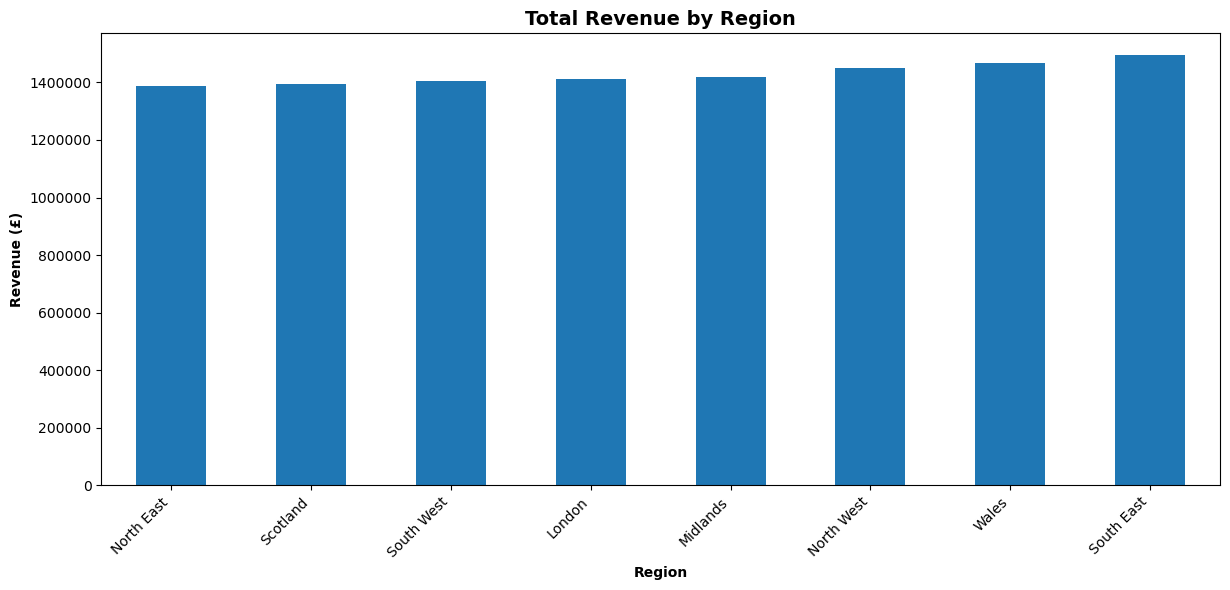

In [18]:
# Calculate total revenue by region

total_revenue_by_region = df.groupby("Region")["Revenue"].sum().sort_values()

plt.figure(figsize=(12, 6))

total_revenue_by_region.plot(kind="bar")

plt.title("Total Revenue by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Revenue (£)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.ticklabel_format(style='plain', axis='y')

plt.savefig('total_revenue_by_region.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

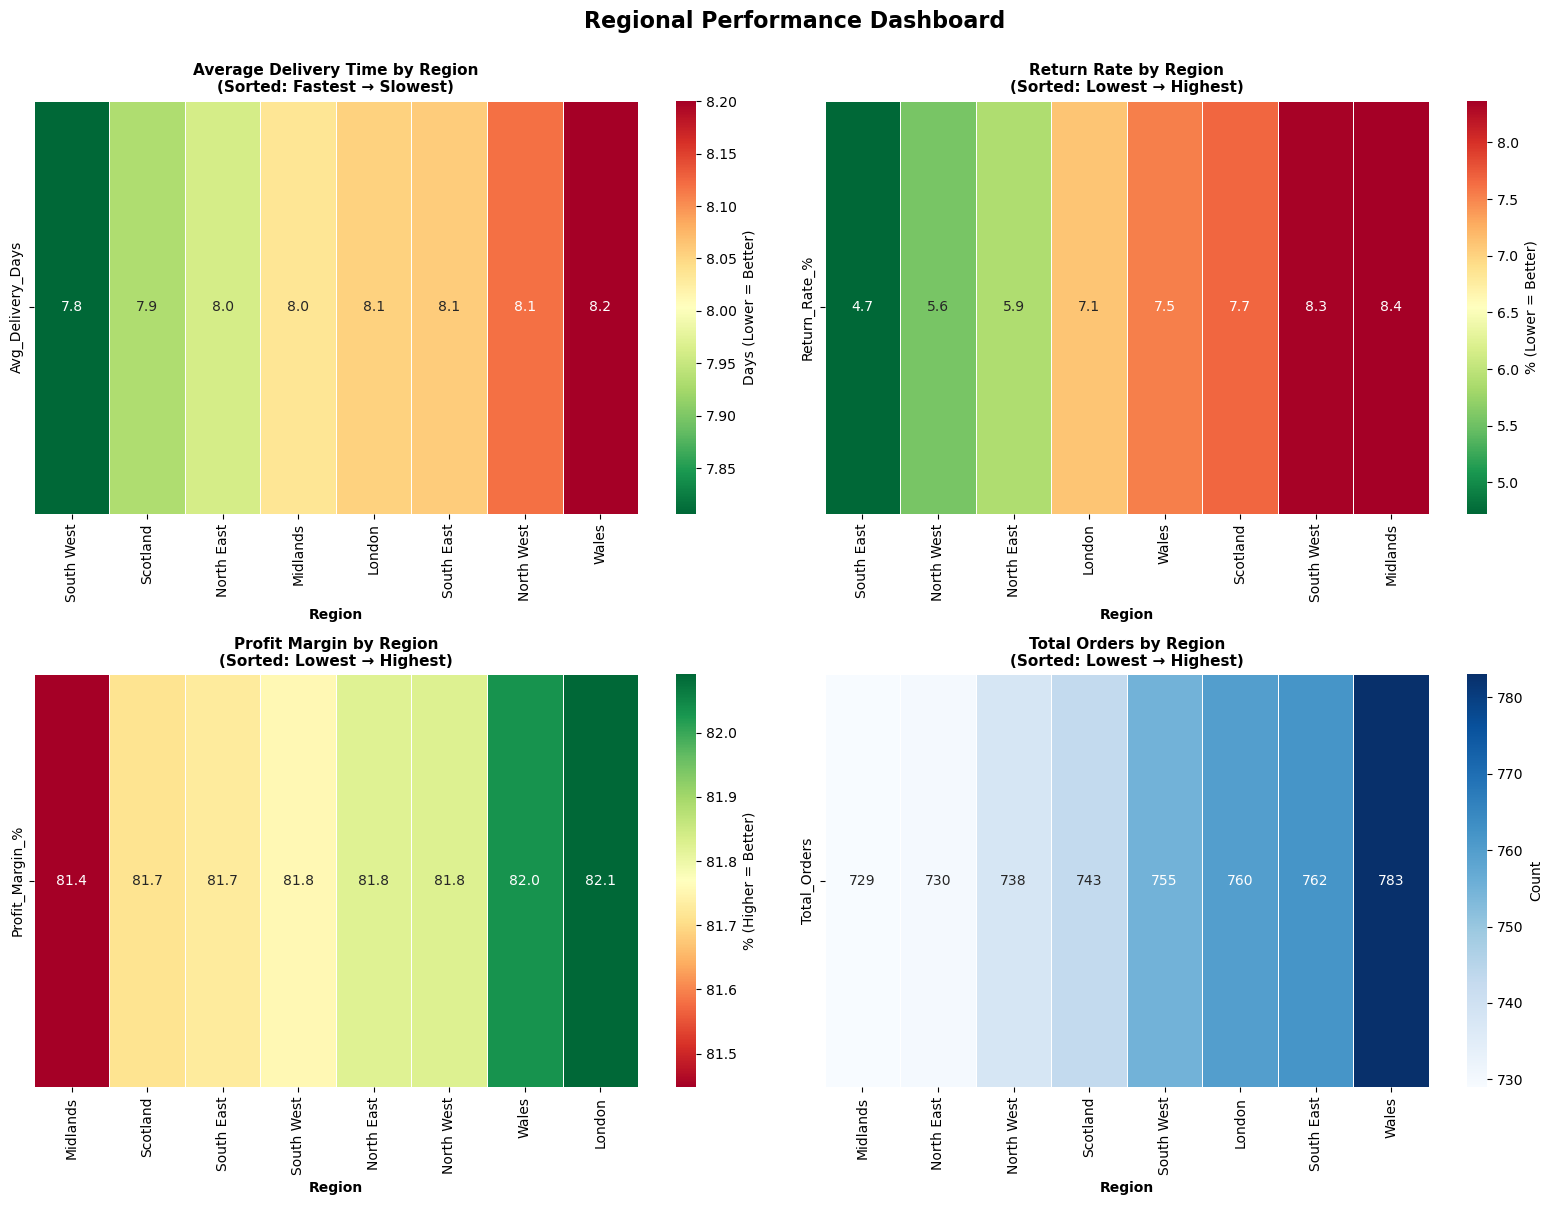

In [19]:
# Calculate regional metrics

region_metrics = df.groupby('Region').agg({
    'Delivery Time (Days)': 'mean',
    'Returned': lambda x: (x.sum() / len(x) * 100),
    'Profit': 'sum',
    'Revenue': 'sum',
    'Product ID': 'count'
}).rename(columns={'Product ID': 'Total_Orders'})

region_metrics['Profit_Margin_%'] = (region_metrics['Profit'] / region_metrics['Revenue'] * 100)
region_metrics.columns = ['Avg_Delivery_Days', 'Return_Rate_%', 'Total_Profit', 'Total_Revenue', 'Total_Orders', 'Profit_Margin_%']

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Delivery Performance (sorted low to high)
delivery_sorted = region_metrics[['Avg_Delivery_Days']].sort_values('Avg_Delivery_Days').T
sns.heatmap(delivery_sorted, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Days (Lower = Better)'}, ax=axes[0, 0], linewidths=0.5)
axes[0, 0].set_title("Average Delivery Time by Region\n(Sorted: Fastest → Slowest)", 
                     fontweight='bold', fontsize=11)
axes[0, 0].set_ylabel("")
axes[0, 0].set_xlabel("Region", fontweight='bold')

# 2. Return Rate (sorted low to high)
return_sorted = region_metrics[['Return_Rate_%']].sort_values('Return_Rate_%').T
sns.heatmap(return_sorted, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': '% (Lower = Better)'}, ax=axes[0, 1], linewidths=0.5)
axes[0, 1].set_title("Return Rate by Region\n(Sorted: Lowest → Highest)", 
                     fontweight='bold', fontsize=11)
axes[0, 1].set_ylabel("")
axes[0, 1].set_xlabel("Region", fontweight='bold')

# 3. Profit Margin (sorted low to high)
margin_sorted = region_metrics[['Profit_Margin_%']].sort_values('Profit_Margin_%').T
sns.heatmap(margin_sorted, annot=True, fmt='.1f', cmap='RdYlGn', 
            cbar_kws={'label': '% (Higher = Better)'}, ax=axes[1, 0], linewidths=0.5)
axes[1, 0].set_title("Profit Margin by Region\n(Sorted: Lowest → Highest)", 
                     fontweight='bold', fontsize=11)
axes[1, 0].set_ylabel("")
axes[1, 0].set_xlabel("Region", fontweight='bold')

# 4. Total Orders (sorted low to high)
orders_sorted = region_metrics[['Total_Orders']].sort_values('Total_Orders').T
sns.heatmap(orders_sorted, annot=True, fmt='.0f', cmap='Blues', 
            cbar_kws={'label': 'Count'}, ax=axes[1, 1], linewidths=0.5)
axes[1, 1].set_title("Total Orders by Region\n(Sorted: Lowest → Highest)", 
                     fontweight='bold', fontsize=11)
axes[1, 1].set_ylabel("")
axes[1, 1].set_xlabel("Region", fontweight='bold')

plt.suptitle("Regional Performance Dashboard", fontweight='bold', fontsize=16, y=1.00)
plt.tight_layout()
plt.savefig('regional_performance_dashboard_sorted.png', dpi=300, bbox_inches='tight')
plt.show()

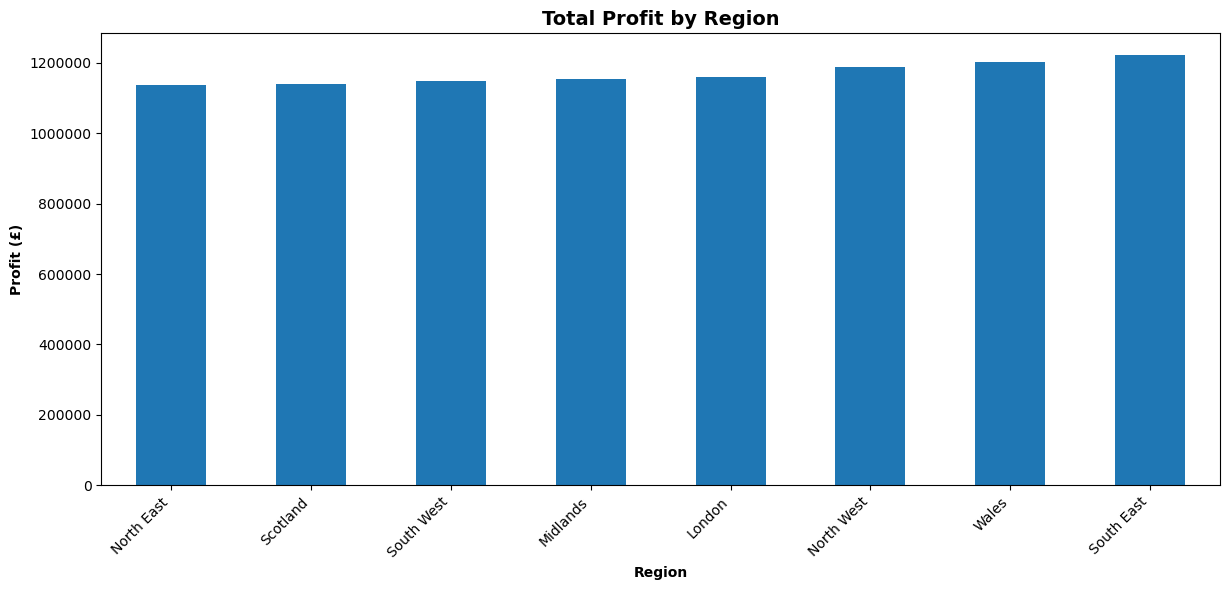

In [20]:
# Calculate total profit by region

total_profit_by_region = df.groupby("Region")["Profit"].sum().sort_values()

plt.figure(figsize=(12, 6))

total_profit_by_region.plot(kind="bar")

plt.title("Total Profit by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Profit (£)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.ticklabel_format(style='plain', axis='y')

plt.savefig('total_profit_by_region.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

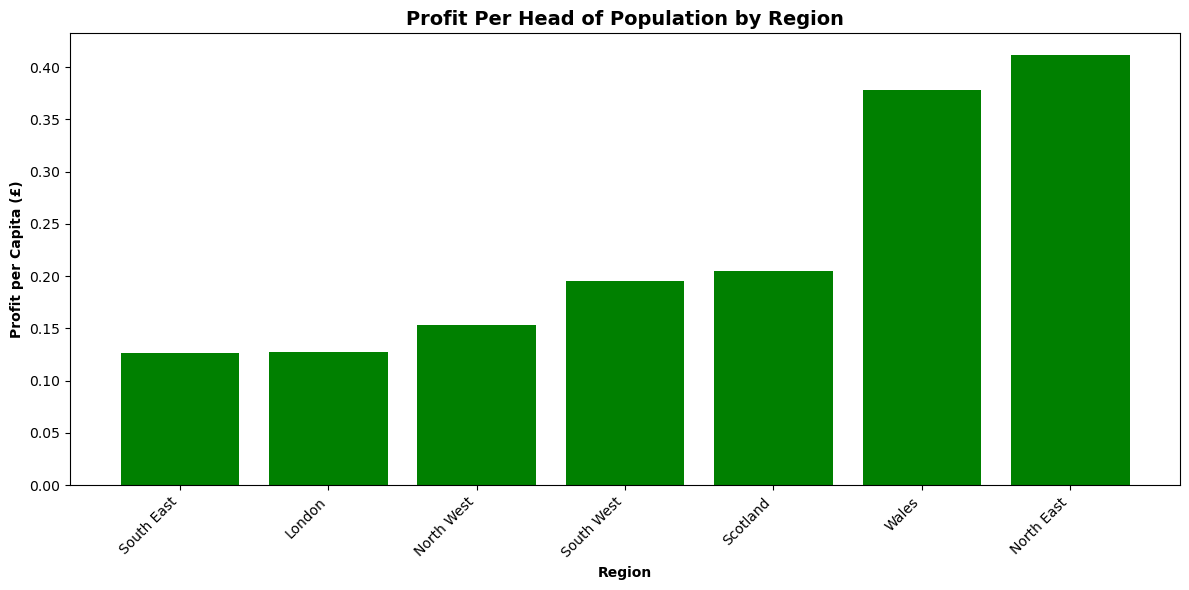

       Region     Profit  Population  Profit_Per_Capita
5  South East  1222524.7   9642942.0           0.126779
0      London  1158342.6   9089736.0           0.127434
3  North West  1187920.0   7737414.0           0.153529
6  South West  1149154.9   5889695.0           0.195113
4    Scotland  1139091.5   5546900.0           0.205356
7       Wales  1203434.7   3186581.0           0.377657
2  North East  1136743.0   2760678.0           0.411762
1    Midlands  1154802.9         NaN                NaN


In [21]:
# Calculate total profit per capita

# 1. Define the population data dictionary based on recent data

population_data = {
    "South East": 9642942,
    "London": 9089736,
    "North West": 7737414,
    "East": 6576306,
    "West Midlands": 6187204,
    "South West": 5889695,
    "Yorkshire And The Humber": 5672962,
    "Scotland": 5546900,
    "East Midlands": 5063164,
    "Wales": 3186581,
    "North East": 2760678,
    "Northern Ireland": 1927855
}

# 2. Calculate Total Profit by Region (Reset index to make it a DataFrame)
# We remove .sort_values() here so we can keep the DataFrame structure for now
region_stats = df.groupby("Region")["Profit"].sum().reset_index()

# 3. Map the population data to the regions
region_stats["Population"] = region_stats["Region"].map(population_data)

# 4. Calculate Profit per Head
region_stats["Profit_Per_Capita"] = region_stats["Profit"] / region_stats["Population"]

# 5. Sort by the new metric for plotting
region_stats = region_stats.sort_values("Profit_Per_Capita", ascending=True)

# --- PLOTTING ---
plt.figure(figsize=(12, 6))

# We plot the new 'Profit_Per_Capita' column
plt.bar(region_stats["Region"], region_stats["Profit_Per_Capita"], color='green')

plt.title("Profit Per Head of Population by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Profit per Capita (£)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig('total_profit_per_capita_by_region.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

# Optional: Print the table to inspect the numbers
print(region_stats[["Region", "Profit", "Population", "Profit_Per_Capita"]])

In [22]:
# Calculate impact on profit if London & South East raised to same per capita value as North East

# 1. Get the benchmark Profit Per Capita (North East)
# We use .values[0] to extract the single number from the series
ne_per_capita = region_stats.loc[region_stats["Region"] == "North East", "Profit_Per_Capita"].values[0]

print(f"Benchmark (North East) Profit Per Head: £{ne_per_capita:.2f}")

# 2. Define the regions we want to improve
target_regions = ["London", "South East"]

total_uplift = 0

print("\n--- Impact Analysis ---")

for region in target_regions:
    # Get the region's specific data
    region_data = region_stats.loc[region_stats["Region"] == region]
    
    current_profit = region_data["Profit"].values[0]
    population = region_data["Population"].values[0]
    
    # Calculate what profit WOULD be at North East efficiency levels
    projected_profit = population * ne_per_capita
    
    # Calculate the difference (Uplift)
    uplift = projected_profit - current_profit
    total_uplift += uplift
    
    print(f"{region}:")
    print(f"  Current Profit:   £{current_profit:,.0f}")
    print(f"  Projected Profit: £{projected_profit:,.0f} (at North East rates)")
    print(f"  Potential Uplift: £{uplift:,.0f}")
    print("-" * 30)

# 3. Final Result
print(f"\nTOTAL PROFIT IMPACT: +£{total_uplift:,.0f}")

Benchmark (North East) Profit Per Head: £0.41

--- Impact Analysis ---
London:
  Current Profit:   £1,158,343
  Projected Profit: £3,742,810 (at North East rates)
  Potential Uplift: £2,584,468
------------------------------
South East:
  Current Profit:   £1,222,525
  Projected Profit: £3,970,600 (at North East rates)
  Potential Uplift: £2,748,075
------------------------------

TOTAL PROFIT IMPACT: +£5,332,542


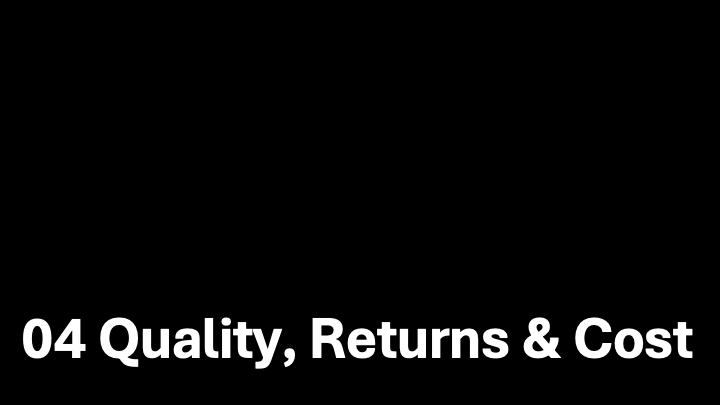

In [23]:
# Calculate returns by region (cumulative analysis)

returns_by_region = df.groupby('Region')['Returned'].sum().sort_values(ascending=False)
total_returns = df['Returned'].sum()

# Calculate percentages
returns_analysis = pd.DataFrame({
    'Region': returns_by_region.index,
    'Total_Returns': returns_by_region.values,
    'Percentage_of_Total': (returns_by_region.values / total_returns * 100).round(2),
    'Cumulative_Percentage': (returns_by_region.cumsum() / total_returns * 100).round(2)
})

print("=" * 70)
print("RETURNS BY REGION - CUMULATIVE ANALYSIS")
print("=" * 70)
print(returns_analysis.to_string(index=False))
print()

# Identify regions accounting for 80% of returns (Pareto principle)
regions_80_pct = returns_analysis[returns_analysis['Cumulative_Percentage'] <= 80]
print(f"\nRegions accounting for 80% of returns:")
print(regions_80_pct[['Region', 'Total_Returns', 'Percentage_of_Total']].to_string(index=False))

RETURNS BY REGION - CUMULATIVE ANALYSIS
    Region  Total_Returns  Percentage_of_Total  Cumulative_Percentage
South West             63                15.22                  15.22
  Midlands             61                14.73                  29.95
     Wales             59                14.25                  44.20
  Scotland             57                13.77                  57.97
    London             54                13.04                  71.01
North East             43                10.39                  81.40
North West             41                 9.90                  91.30
South East             36                 8.70                 100.00


Regions accounting for 80% of returns:
    Region  Total_Returns  Percentage_of_Total
South West             63                15.22
  Midlands             61                14.73
     Wales             59                14.25
  Scotland             57                13.77
    London             54                13.04


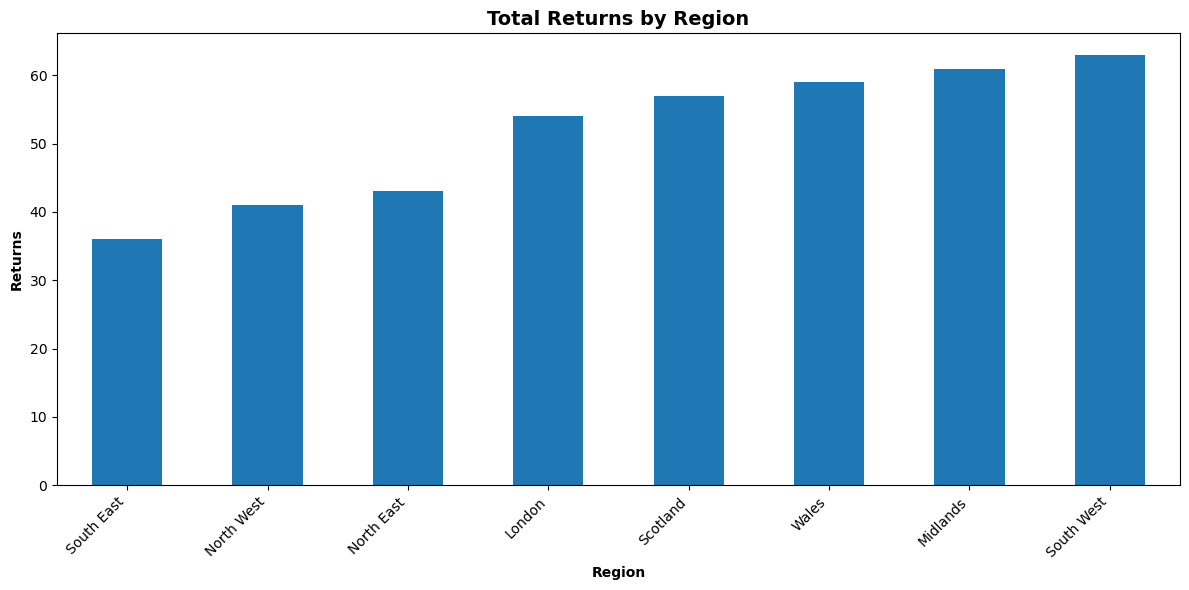

In [24]:
# Calculate total returns by region

total_returns_by_region = df.groupby("Region")["Returned"].sum().sort_values()
plt.figure(figsize=(12, 6))
total_returns_by_region.plot(kind="bar")
plt.title("Total Returns by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Returns", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('total_returns_by_region.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

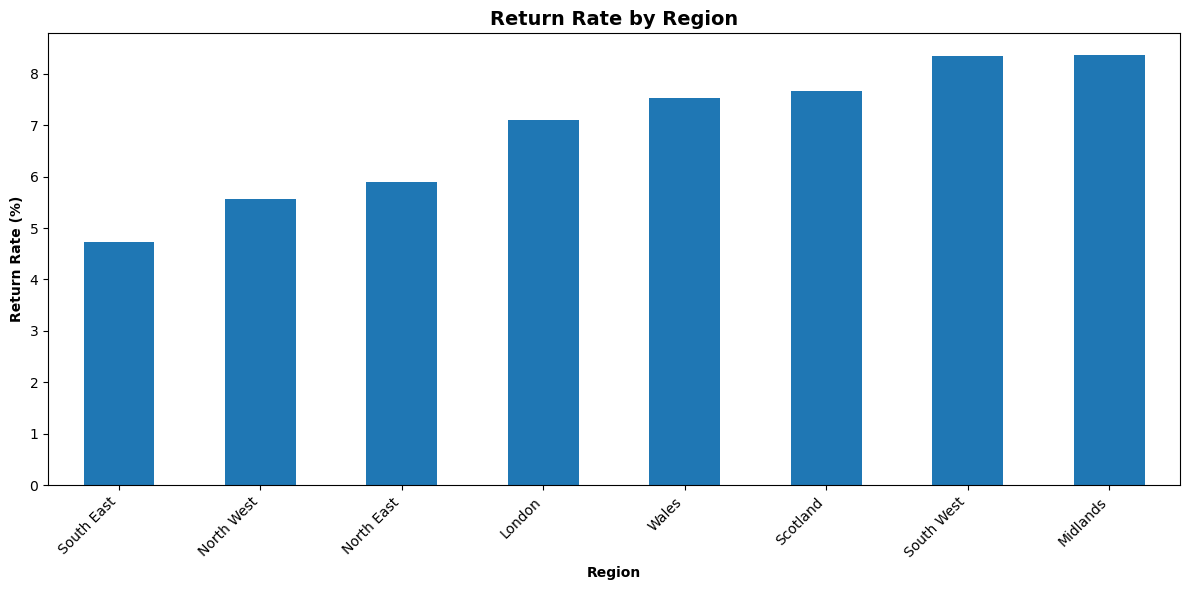

In [25]:
# Calculate return rate by region

returns_by_region = df.groupby("Region")["Returned"].sum()
orders_by_region = df.groupby("Region").size()
return_rate_by_region = (returns_by_region / orders_by_region * 100).sort_values()

# Plot
plt.figure(figsize=(12, 6))
return_rate_by_region.plot(kind="bar")
plt.title("Return Rate by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Return Rate (%)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('return_rate_by_region.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

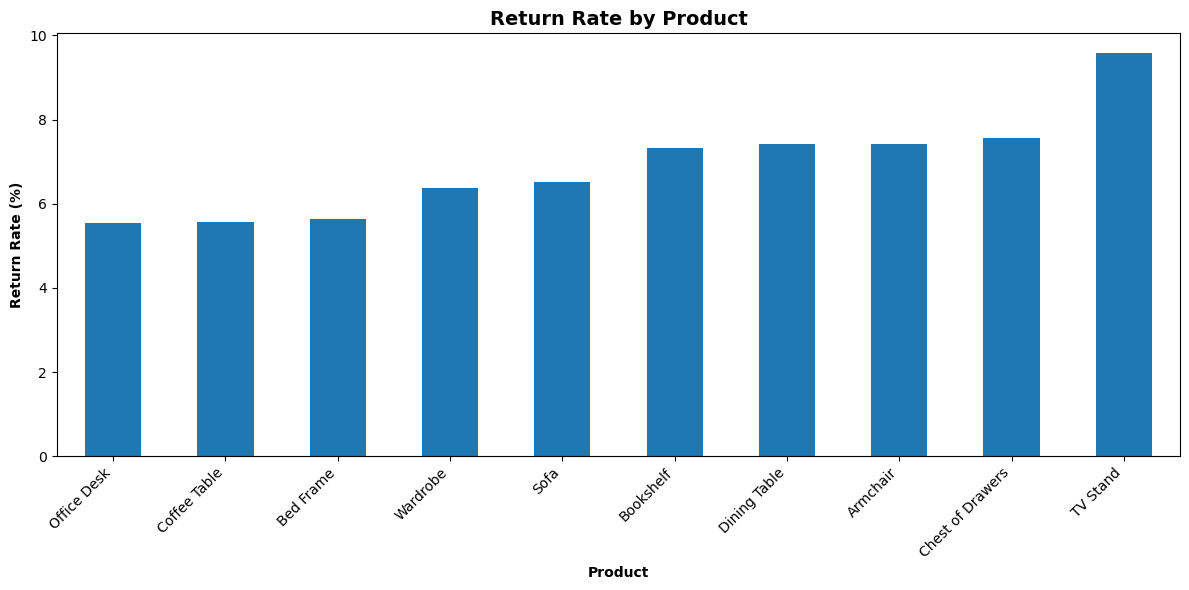

In [26]:
# Calculate return rate by product

returns_by_product = df.groupby("Product")["Returned"].sum()
orders_by_product = df.groupby("Product").size()
return_rate_by_product = (returns_by_product / orders_by_product * 100).sort_values()

# Plot
plt.figure(figsize=(12, 6))
return_rate_by_product.plot(kind="bar")
plt.title("Return Rate by Product", fontweight='bold', fontsize=14)
plt.xlabel("Product", fontweight='bold')
plt.ylabel("Return Rate (%)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('return_rate_by_product.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

RETURNS COST ANALYSIS - REALISTIC SCENARIOS

CURRENT ASSUMPTION (100% Loss):
  Lost Profit: £613,378.70
  Handling Costs: £6,210.00
  TOTAL COST: £619,588.70

REALISTIC SCENARIOS

SCENARIO 1: INDUSTRY STANDARD
--------------------------------------------------------------------------------

TOTAL COST: £181,022.93

SCENARIO 2: OPTIMISTIC
--------------------------------------------------------------------------------

TOTAL COST: £113,551.27

SCENARIO 3: PESSIMISTIC
--------------------------------------------------------------------------------

TOTAL COST: £282,230.41

SCENARIO COMPARISON


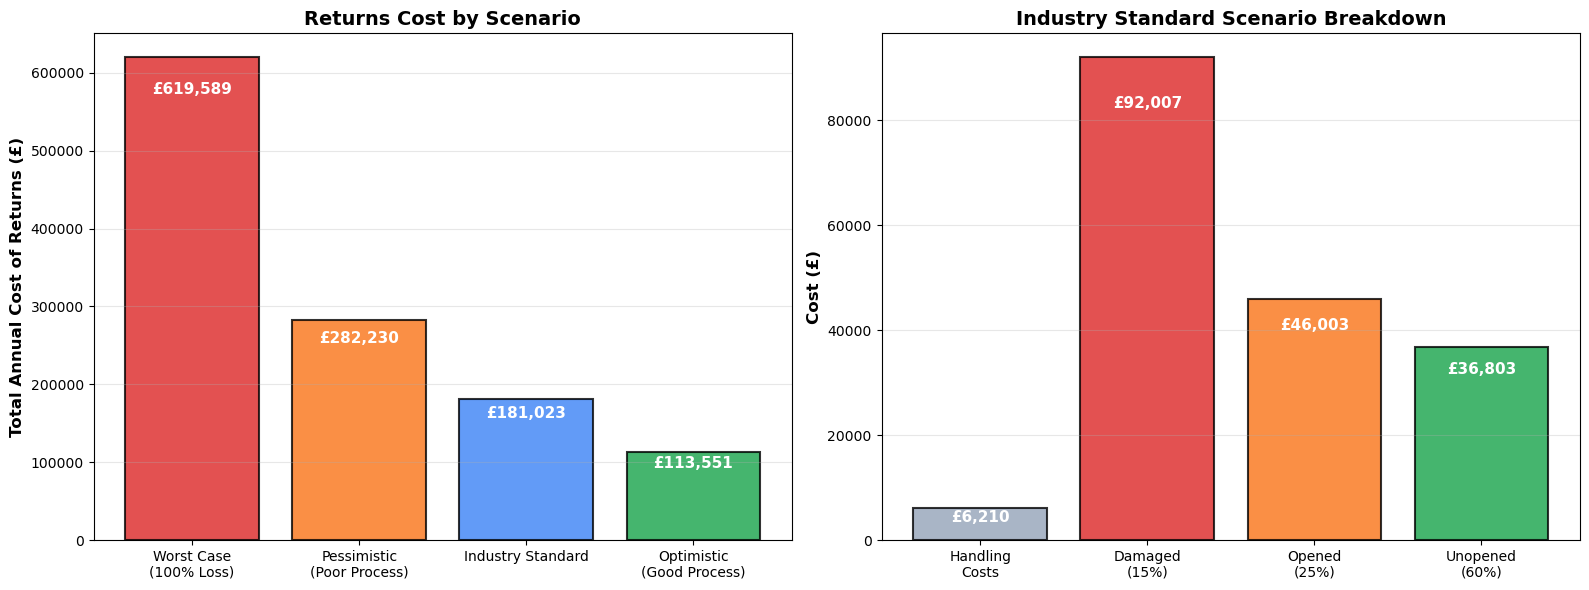


Analysis complete! Chart saved as 'returns_cost_scenarios.png'


In [27]:
print("=" * 80)
print("RETURNS COST ANALYSIS - REALISTIC SCENARIOS")
print("=" * 80)

# Filter returned items
returned_items = df[df['Returned'] == 1].copy()
RETURN_HANDLING_COST = 15

# Current calculation (100% loss)
total_lost_profit_pessimistic = returned_items['Profit'].sum()
total_handling = len(returned_items) * RETURN_HANDLING_COST
total_cost_pessimistic = total_lost_profit_pessimistic + total_handling

print(f"\nCURRENT ASSUMPTION (100% Loss):")
print(f"  Lost Profit: £{total_lost_profit_pessimistic:,.2f}")
print(f"  Handling Costs: £{total_handling:,.2f}")
print(f"  TOTAL COST: £{total_cost_pessimistic:,.2f}")

# More realistic scenarios
print("\n" + "=" * 80)
print("REALISTIC SCENARIOS")
print("=" * 80)

# Scenario 1: Industry Standard
print("\nSCENARIO 1: INDUSTRY STANDARD")
print("-" * 80)
damaged_pct = 0.15
opened_pct = 0.25
unopened_pct = 0.60

damaged_loss = total_lost_profit_pessimistic * damaged_pct
opened_loss = total_lost_profit_pessimistic * opened_pct * 0.30
unopened_loss = total_lost_profit_pessimistic * unopened_pct * 0.10

total_product_loss_s1 = damaged_loss + opened_loss + unopened_loss
total_cost_s1 = total_product_loss_s1 + total_handling

print(f"\nTOTAL COST: £{total_cost_s1:,.2f}")

# Scenario 2: Optimistic
print("\nSCENARIO 2: OPTIMISTIC")
print("-" * 80)
damaged_pct_opt = 0.10
opened_pct_opt = 0.20
unopened_pct_opt = 0.70

damaged_loss_opt = total_lost_profit_pessimistic * damaged_pct_opt
opened_loss_opt = total_lost_profit_pessimistic * opened_pct_opt * 0.20
unopened_loss_opt = total_lost_profit_pessimistic * unopened_pct_opt * 0.05

total_product_loss_opt = damaged_loss_opt + opened_loss_opt + unopened_loss_opt
total_cost_opt = total_product_loss_opt + total_handling

print(f"\nTOTAL COST: £{total_cost_opt:,.2f}")

# Scenario 3: Pessimistic
print("\nSCENARIO 3: PESSIMISTIC")
print("-" * 80)
damaged_pct_pess = 0.25
opened_pct_pess = 0.35
unopened_pct_pess = 0.40

damaged_loss_pess = total_lost_profit_pessimistic * damaged_pct_pess
opened_loss_pess = total_lost_profit_pessimistic * opened_pct_pess * 0.40
unopened_loss_pess = total_lost_profit_pessimistic * unopened_pct_pess * 0.15

total_product_loss_pess = damaged_loss_pess + opened_loss_pess + unopened_loss_pess
total_cost_pess = total_product_loss_pess + total_handling

print(f"\nTOTAL COST: £{total_cost_pess:,.2f}")

# Summary comparison
print("\n" + "=" * 80)
print("SCENARIO COMPARISON")
print("=" * 80)

scenarios = ['Worst Case\n(100% Loss)', 'Pessimistic\n(Poor Process)', 
             'Industry Standard', 'Optimistic\n(Good Process)']
costs = [total_cost_pessimistic, total_cost_pess, total_cost_s1, total_cost_opt]
colors = ['#dc2626', '#f97316', '#3b82f6', '#16a34a']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Total costs by scenario
bars1 = ax1.bar(scenarios, costs, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_ylabel('Total Annual Cost of Returns (£)', fontweight='bold', fontsize=12)
ax1.set_title('Returns Cost by Scenario', fontweight='bold', fontsize=14)
ax1.grid(axis='y', alpha=0.3)
ax1.ticklabel_format(style='plain', axis='y')

# Add labels inside bars at top (white text)
for i, v in enumerate(costs):
    ax1.text(i, v * 0.95, f'£{v:,.0f}', ha='center', va='top', 
             fontweight='bold', fontsize=11, color='white')

# Chart 2: Breakdown of industry standard scenario
breakdown_labels = ['Handling\nCosts', 'Damaged\n(15%)', 'Opened\n(25%)', 'Unopened\n(60%)']
breakdown_values = [total_handling, damaged_loss, opened_loss, unopened_loss]
breakdown_colors = ['#94a3b8', '#dc2626', '#f97316', '#16a34a']

bars2 = ax2.bar(breakdown_labels, breakdown_values, color=breakdown_colors, alpha=0.8, 
                edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Cost (£)', fontweight='bold', fontsize=12)
ax2.set_title('Industry Standard Scenario Breakdown', fontweight='bold', fontsize=14)
ax2.grid(axis='y', alpha=0.3)
ax2.ticklabel_format(style='plain', axis='y')

# Add labels inside bars at top (white text)
for i, v in enumerate(breakdown_values):
    ax2.text(i, v * 0.92, f'£{v:,.0f}', ha='center', va='top', 
             fontweight='bold', fontsize=11, color='white')

plt.tight_layout()
plt.savefig('returns_cost_scenarios.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("Analysis complete! Chart saved as 'returns_cost_scenarios.png'")
print("=" * 80)

COMPREHENSIVE RETURNS ANALYSIS (CORRECTED)

DETAILED RETURNS ANALYSIS

OVERALL METRICS:
--------------------------------------------------------------------------------
Total Orders: 6,000
Total Returns: 414
Overall Return Rate: 6.9%

COST BREAKDOWN:
  Lost Profit: £613,378.70
  Handling Costs: £6,210.00 (414 returns × £15)
  TOTAL RETURN COST: £619,588.70

IMPACT:
  Total Revenue: £11,432,426.50
  Total Profit: £9,352,014.30
  Returns Cost as % of Revenue: 5.42%
  Lost Profit as % of Total Profit: 6.6%

VERIFICATION:
  Revenue from Returned Items: £748,906.50
  COGS of Returned Items: £52,920.00
  Gross Profit Lost: £695,986.50

TOP 5 REASONS FOR RETURNS (INDUSTRY ANALYSIS)

NOTE: Your dataset doesn't contain a 'Return Reason' field. Based on industry 
benchmarks and the patterns in your data, here are the likely top 5 reasons:

1. PRODUCT QUALITY ISSUES (Est. 35% of returns)
   - Products with highest return rates likely have quality concerns
   - Top suspects: TV Stand, Chest of Dra

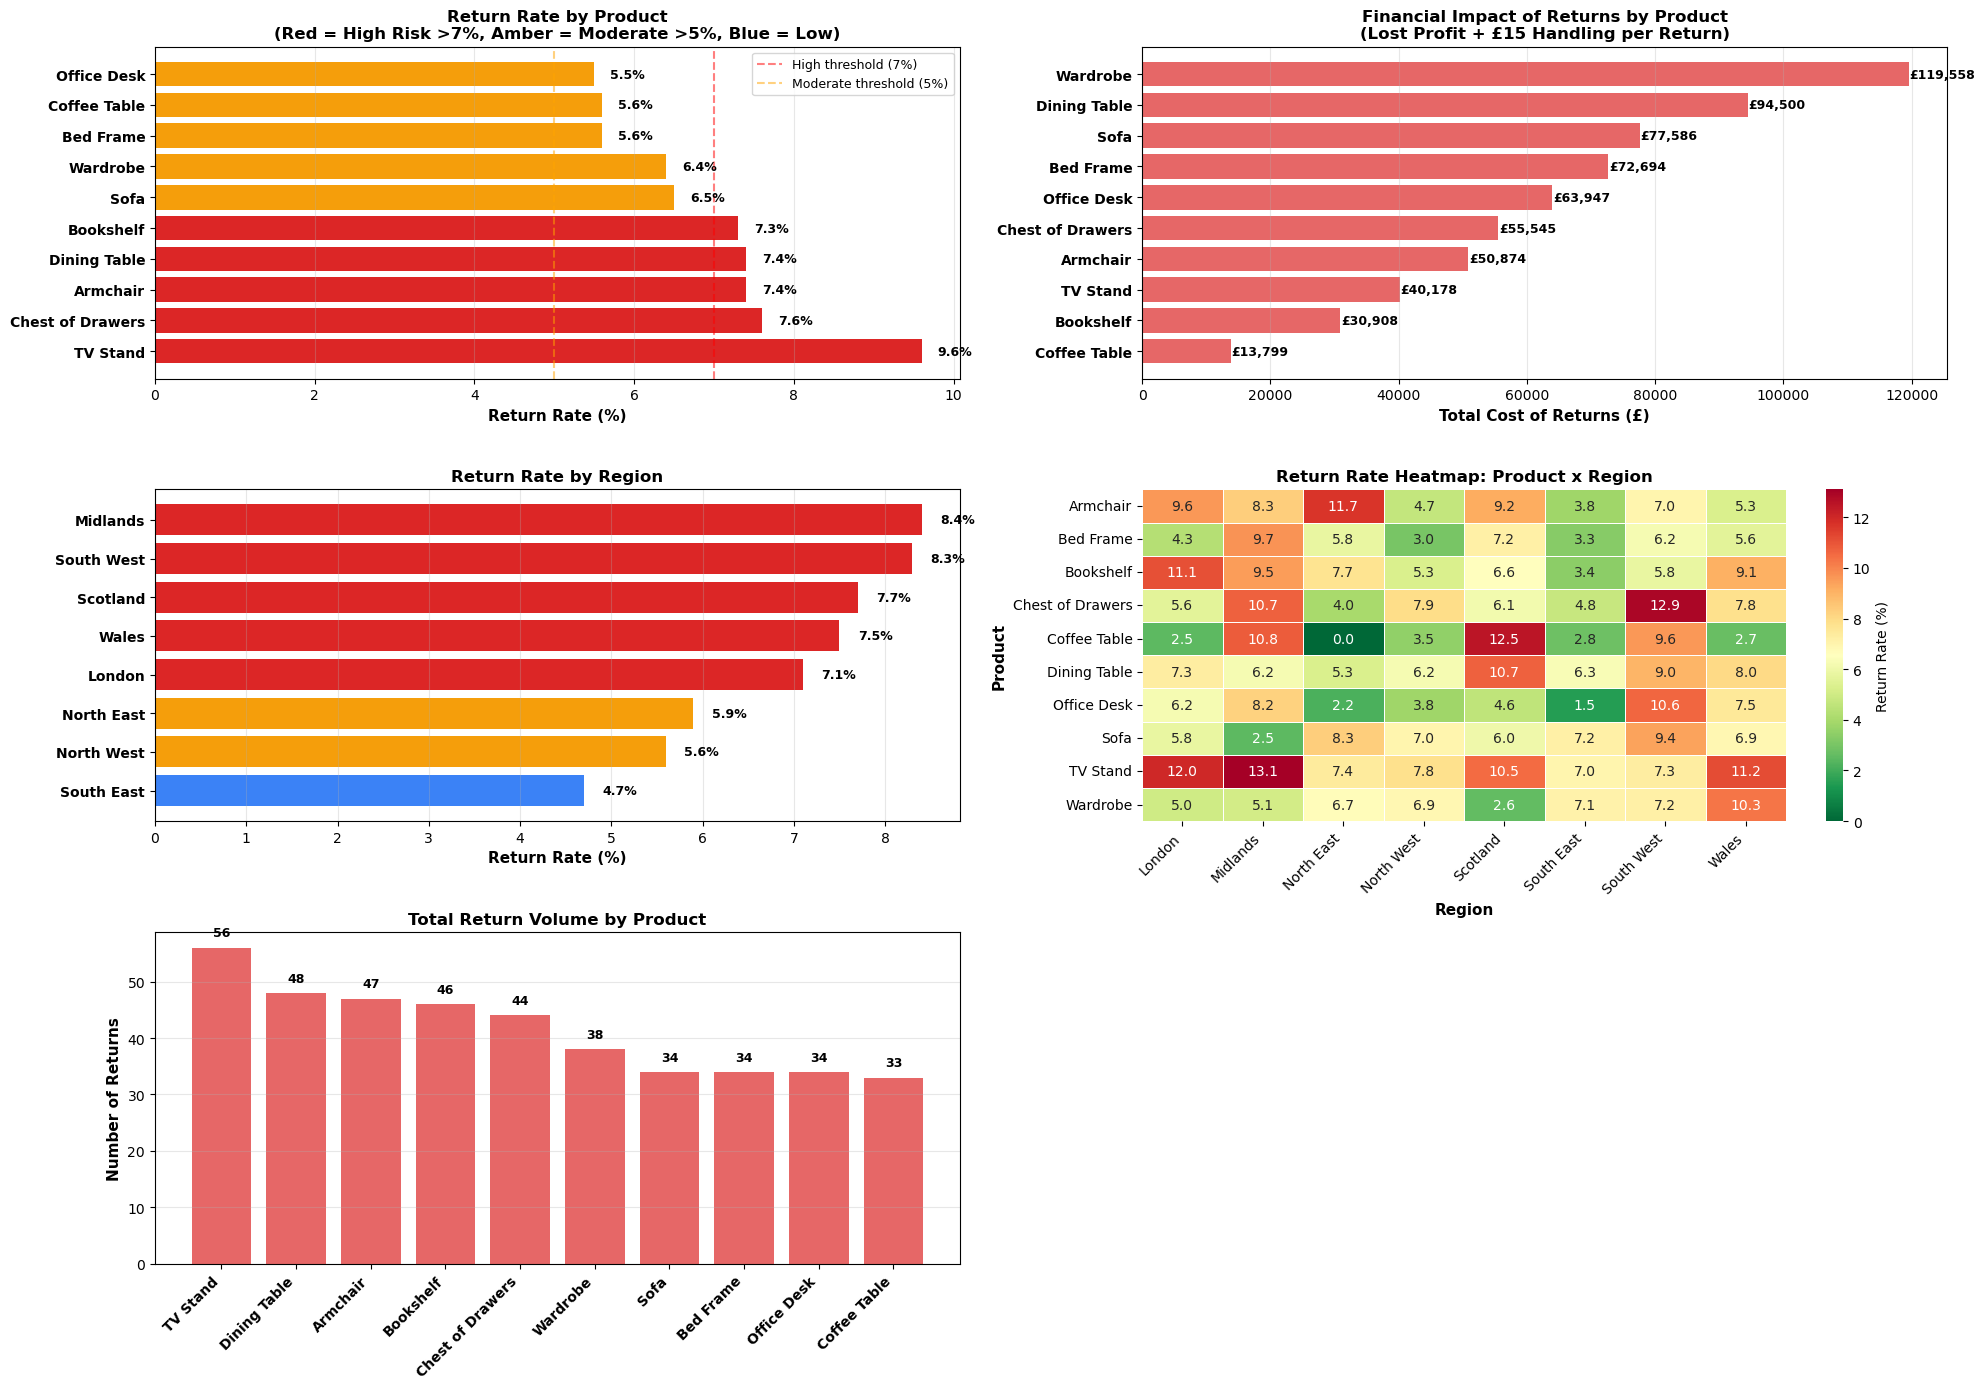


Analysis complete! Chart saved as 'returns_comprehensive_analysis_corrected.png'


In [28]:
# CORRECTED Returns Analysis
print("=" * 80)
print("COMPREHENSIVE RETURNS ANALYSIS (CORRECTED)")
print("=" * 80)

# Define handling cost per return
RETURN_HANDLING_COST = 15

# Filter returned items
returned_items = df[df['Returned'] == 1].copy()
non_returned_items = df[df['Returned'] == 0].copy()

# 1. Calculate return metrics by product - CORRECTED
product_returns = df.groupby('Product').agg({
    'Returned': 'sum',  # Count of returns
    'Product ID': 'count'  # Total orders
}).rename(columns={'Returned': 'Returns_Count', 'Product ID': 'Total_Orders'})

# Calculate actual costs from returned items
returned_costs_by_product = returned_items.groupby('Product').agg({
    'Profit': 'sum',  # Lost profit
    'Revenue': 'sum',  # Returned revenue
    'Cost': 'sum',     # COGS of returned items
    'Returned': 'sum'  # Number of returns (for handling costs)
})

# Merge the data
product_returns = product_returns.join(returned_costs_by_product, how='left').fillna(0)
product_returns['Return_Rate_%'] = (product_returns['Returns_Count'] / product_returns['Total_Orders'] * 100).round(1)
product_returns['Lost_Profit'] = product_returns['Profit']
product_returns['Handling_Costs'] = product_returns['Returns_Count'] * RETURN_HANDLING_COST
product_returns['Total_Return_Cost'] = product_returns['Lost_Profit'] + product_returns['Handling_Costs']

product_returns = product_returns.sort_values('Return_Rate_%', ascending=False)

# 2. Calculate return metrics by region - CORRECTED
region_returns = df.groupby('Region').agg({
    'Returned': 'sum',
    'Product ID': 'count'
})
region_returns['Return_Rate_%'] = (region_returns['Returned'] / region_returns['Product ID'] * 100).round(1)

# Add cost data by region
returned_costs_by_region = returned_items.groupby('Region').agg({
    'Profit': 'sum',
    'Returned': 'sum'
})
region_returns = region_returns.join(returned_costs_by_region, how='left', rsuffix='_cost').fillna(0)
region_returns['Lost_Profit'] = region_returns['Profit']
region_returns['Handling_Costs'] = region_returns['Returned_cost'] * RETURN_HANDLING_COST
region_returns['Total_Return_Cost'] = region_returns['Lost_Profit'] + region_returns['Handling_Costs']

# 3. Region x Product interaction
region_product_returns = df.groupby(['Region', 'Product']).agg({
    'Returned': 'sum',
    'Product ID': 'count'
}).reset_index()
region_product_returns['Return_Rate_%'] = (region_product_returns['Returned'] / 
                                            region_product_returns['Product ID'] * 100).round(1)

# Create pivot for heatmap
returns_pivot = region_product_returns.pivot(index='Product', columns='Region', values='Return_Rate_%').fillna(0)

# Overall metrics
total_returns = returned_items.shape[0]
total_orders = len(df)
overall_return_rate = (total_returns / total_orders * 100)
total_lost_profit = returned_items['Profit'].sum()
total_handling_costs = total_returns * RETURN_HANDLING_COST
total_return_cost = total_lost_profit + total_handling_costs
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
return_cost_pct = (total_return_cost / total_revenue * 100)
profit_impact_pct = (total_lost_profit / total_profit * 100)

# Create comprehensive visualization
fig = plt.figure(figsize=(20, 14))

# Chart 1: Return Rate by Product
ax1 = plt.subplot(3, 2, 1)
top_returns = product_returns['Return_Rate_%'].head(10)
colors = ['#dc2626' if x > 7 else '#f59e0b' if x > 5 else '#3b82f6' for x in top_returns.values]
ax1.barh(range(len(top_returns)), top_returns.values, color=colors)
ax1.set_yticks(range(len(top_returns)))
ax1.set_yticklabels(top_returns.index, fontweight='bold')
ax1.set_xlabel('Return Rate (%)', fontweight='bold', fontsize=11)
ax1.set_title('Return Rate by Product\n(Red = High Risk >7%, Amber = Moderate >5%, Blue = Low)', 
              fontweight='bold', fontsize=12)
ax1.axvline(x=7, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='High threshold (7%)')
ax1.axvline(x=5, color='orange', linestyle='--', alpha=0.5, linewidth=1.5, label='Moderate threshold (5%)')
ax1.grid(axis='x', alpha=0.3)
ax1.legend(fontsize=9)

# Add value labels
for i, v in enumerate(top_returns.values):
    ax1.text(v + 0.2, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

# Chart 2: Cost of Returns by Product
ax2 = plt.subplot(3, 2, 2)
top_cost_returns = product_returns[product_returns['Total_Return_Cost'] > 0]['Total_Return_Cost'].nlargest(10).sort_values(ascending=True)
ax2.barh(range(len(top_cost_returns)), top_cost_returns.values, color='#dc2626', alpha=0.7)
ax2.set_yticks(range(len(top_cost_returns)))
ax2.set_yticklabels(top_cost_returns.index, fontweight='bold')
ax2.set_xlabel('Total Cost of Returns (£)', fontweight='bold', fontsize=11)
ax2.set_title('Financial Impact of Returns by Product\n(Lost Profit + £15 Handling per Return)', 
              fontweight='bold', fontsize=12)
ax2.grid(axis='x', alpha=0.3)
ax2.ticklabel_format(style='plain', axis='x')

# Add value labels
for i, v in enumerate(top_cost_returns.values):
    ax2.text(v + 100, i, f'£{v:,.0f}', va='center', fontweight='bold', fontsize=9)

# Chart 3: Return Rate by Region
ax3 = plt.subplot(3, 2, 3)
region_sorted = region_returns.sort_values('Return_Rate_%', ascending=True)
colors_region = ['#dc2626' if x > 7 else '#f59e0b' if x > 5 else '#3b82f6' 
                 for x in region_sorted['Return_Rate_%'].values]
ax3.barh(range(len(region_sorted)), region_sorted['Return_Rate_%'].values, color=colors_region)
ax3.set_yticks(range(len(region_sorted)))
ax3.set_yticklabels(region_sorted.index, fontweight='bold')
ax3.set_xlabel('Return Rate (%)', fontweight='bold', fontsize=11)
ax3.set_title('Return Rate by Region', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(region_sorted['Return_Rate_%'].values):
    ax3.text(v + 0.2, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

# Chart 4: Region x Product Heatmap
ax4 = plt.subplot(3, 2, 4)
sns.heatmap(returns_pivot, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            cbar_kws={'label': 'Return Rate (%)'}, ax=ax4, linewidths=0.5)
ax4.set_title('Return Rate Heatmap: Product x Region', fontweight='bold', fontsize=12)
ax4.set_xlabel('Region', fontweight='bold', fontsize=11)
ax4.set_ylabel('Product', fontweight='bold', fontsize=11)
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax4.get_yticklabels(), rotation=0)

# Chart 5: Returns Volume Distribution
ax5 = plt.subplot(3, 2, 5)
returns_distribution = product_returns[product_returns['Returns_Count'] > 0]['Returns_Count'].nlargest(10).sort_values(ascending=False)
ax5.bar(range(len(returns_distribution)), returns_distribution.values, color='#dc2626', alpha=0.7)
ax5.set_xticks(range(len(returns_distribution)))
ax5.set_xticklabels(returns_distribution.index, rotation=45, ha='right', fontweight='bold')
ax5.set_ylabel('Number of Returns', fontweight='bold', fontsize=11)
ax5.set_title('Total Return Volume by Product', fontweight='bold', fontsize=12)
ax5.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(returns_distribution.values):
    ax5.text(i, v + 2, f'{int(v)}', ha='center', fontweight='bold', fontsize=9)

# Detailed printed analysis
print("\n" + "=" * 80)
print("DETAILED RETURNS ANALYSIS")
print("=" * 80)

print("\nOVERALL METRICS:")
print("-" * 80)
print(f"Total Orders: {total_orders:,}")
print(f"Total Returns: {total_returns:,}")
print(f"Overall Return Rate: {overall_return_rate:.1f}%")
print(f"\nCOST BREAKDOWN:")
print(f"  Lost Profit: £{total_lost_profit:,.2f}")
print(f"  Handling Costs: £{total_handling_costs:,.2f} ({total_returns} returns × £{RETURN_HANDLING_COST})")
print(f"  TOTAL RETURN COST: £{total_return_cost:,.2f}")
print(f"\nIMPACT:")
print(f"  Total Revenue: £{total_revenue:,.2f}")
print(f"  Total Profit: £{total_profit:,.2f}")
print(f"  Returns Cost as % of Revenue: {return_cost_pct:.2f}%")
print(f"  Lost Profit as % of Total Profit: {profit_impact_pct:.1f}%")

# Additional metrics for verification
returned_revenue = returned_items['Revenue'].sum()
returned_cogs = returned_items['Cost'].sum()
print(f"\nVERIFICATION:")
print(f"  Revenue from Returned Items: £{returned_revenue:,.2f}")
print(f"  COGS of Returned Items: £{returned_cogs:,.2f}")
print(f"  Gross Profit Lost: £{returned_revenue - returned_cogs:,.2f}")

print("\n" + "=" * 80)
print("TOP 5 REASONS FOR RETURNS (INDUSTRY ANALYSIS)")
print("=" * 80)

# Get products with highest return rates
high_return_products = product_returns[product_returns['Return_Rate_%'] > 7].index.tolist()
high_return_regions = region_sorted.tail(2).index.tolist()

print(f"""
NOTE: Your dataset doesn't contain a 'Return Reason' field. Based on industry 
benchmarks and the patterns in your data, here are the likely top 5 reasons:

1. PRODUCT QUALITY ISSUES (Est. 35% of returns)
   - Products with highest return rates likely have quality concerns
   - Top suspects: {', '.join(high_return_products[:3] if len(high_return_products) >= 3 else high_return_products)}
   - Estimated cost: £{total_return_cost * 0.35:,.2f}

2. INCORRECT PRODUCT DESCRIPTION (Est. 25% of returns)
   - Customer expectations didn't match reality
   - More common in products with complex specifications
   - Estimated cost: £{total_return_cost * 0.25:,.2f}

3. DAMAGED DURING DELIVERY (Est. 15% of returns)
   - Regional variations suggest delivery handling issues
   - Check regions with higher return rates: {', '.join(high_return_regions)}
   - Estimated cost: £{total_return_cost * 0.15:,.2f}

4. WRONG SIZE/FIT (Est. 15% of returns)
   - Particularly relevant for furniture items
   - Customers may order wrong dimensions
   - Estimated cost: £{total_return_cost * 0.15:,.2f}

5. BUYER'S REMORSE / CHANGED MIND (Est. 10% of returns)
   - Baseline return rate across all e-commerce
   - Cannot be entirely eliminated
   - Estimated cost: £{total_return_cost * 0.10:,.2f}

RECOMMENDATION: Add 'Return Reason' field to order system to track actual reasons.
This will enable targeted interventions and better cost reduction strategies.
""")

print("\n" + "=" * 80)
print("REGION x PRODUCT INTERACTION INSIGHTS")
print("=" * 80)

# Find products with highest variance across regions
returns_pivot_analysis = returns_pivot.copy()
returns_pivot_analysis['Variance'] = returns_pivot_analysis.var(axis=1)
high_variance_products = returns_pivot_analysis.nlargest(3, 'Variance')

print("\nProducts with Most Regional Variation in Returns:")
print("-" * 80)
for product in high_variance_products.index:
    print(f"\n{product}:")
    for region in returns_pivot.columns:
        rate = returns_pivot.loc[product, region]
        print(f"  {region:15s}: {rate:5.1f}%")
    print(f"  Variance: {returns_pivot_analysis.loc[product, 'Variance']:.2f}")
    print("  → Suggests regional differences in delivery quality or customer expectations")

print("\n" + "=" * 80)
print("STRATEGIC RECOMMENDATIONS: TOP 3 RETURNED PRODUCTS")
print("=" * 80)

top_3_by_cost = product_returns[product_returns['Total_Return_Cost'] > 0].nlargest(3, 'Total_Return_Cost')

for i, (product, row) in enumerate(top_3_by_cost.iterrows(), 1):
    print(f"\n{i}. {product.upper()}")
    print("-" * 80)
    print(f"   Return Rate: {row['Return_Rate_%']:.1f}% ({int(row['Returns_Count'])} returns)")
    print(f"   Financial Impact: £{row['Total_Return_Cost']:,.2f}")
    print(f"   Lost Profit: £{row['Lost_Profit']:,.2f}")
    print(f"   Handling Costs: £{row['Handling_Costs']:,.2f}")
    
    # Determine recommendation based on return rate
    if row['Return_Rate_%'] > 10:
        recommendation = "URGENT: REDESIGN REQUIRED"
        target_reduction = 0.40  # Target 40% reduction
        action = f"""
   ACTION PLAN:
   • IMMEDIATE quality audit of manufacturing/sourcing
   • Review product specifications and descriptions for accuracy
   • Consider temporary removal from catalog pending improvements
   • Implement enhanced quality control processes
   • Target: Reduce return rate from {row['Return_Rate_%']:.1f}% to <7%
   • Potential annual savings: £{row['Total_Return_Cost'] * target_reduction:,.2f}
        """
    elif row['Return_Rate_%'] > 7:
        recommendation = "HIGH PRIORITY: REINFORCE & IMPROVE"
        target_reduction = 0.30  # Target 30% reduction
        action = f"""
   ACTION PLAN:
   • Enhance product descriptions with detailed specifications
   • Add more product images and 360° views
   • Improve packaging to prevent damage in transit
   • Implement customer feedback loop for this product
   • Provide size/dimension guidance tools
   • Target: Reduce return rate from {row['Return_Rate_%']:.1f}% to <5%
   • Potential annual savings: £{row['Total_Return_Cost'] * target_reduction:,.2f}
        """
    else:
        recommendation = "MODERATE PRIORITY: REINFORCE QUALITY"
        target_reduction = 0.20  # Target 20% reduction
        action = f"""
   ACTION PLAN:
   • Maintain current quality standards
   • Monitor return reasons more closely
   • Implement preventive quality checks
   • Enhance customer education materials
   • Target: Reduce return rate from {row['Return_Rate_%']:.1f}% to <4%
   • Potential annual savings: £{row['Total_Return_Cost'] * target_reduction:,.2f}
        """
    
    print(f"\n   RECOMMENDATION: {recommendation}")
    print(action)

print("\n" + "=" * 80)
print("OVERALL RETURNS REDUCTION STRATEGY")
print("=" * 80)

# Calculate potential savings from top 3
top_3_list = list(top_3_by_cost.iterrows())
if len(top_3_list) >= 3:
    potential_savings = (
        top_3_list[0][1]['Total_Return_Cost'] * 0.40 +
        top_3_list[1][1]['Total_Return_Cost'] * 0.30 +
        top_3_list[2][1]['Total_Return_Cost'] * 0.20
    )
else:
    potential_savings = sum([row['Total_Return_Cost'] * 0.30 for _, row in top_3_list])

print(f"""
EXECUTIVE SUMMARY:

Current State:
- Annual Return Cost: £{total_return_cost:,.2f}
- Return Rate: {overall_return_rate:.1f}%
- Impact on Profit: {profit_impact_pct:.1f}% of total profit

Opportunity:
- Focus on Top 3 Products: {', '.join(top_3_by_cost.index.tolist())}
- Combined Return Cost: £{top_3_by_cost['Total_Return_Cost'].sum():,.2f}
- Potential Savings: £{potential_savings:,.2f} (focusing on top 3 only)

If Extended to All Products (25% reduction target):
- Total Potential Savings: £{total_return_cost * 0.25:,.2f}/year
- Profit Improvement: {(total_return_cost * 0.25 / total_profit * 100):.1f}% increase

IMMEDIATE ACTIONS (Next 30 Days):
1. Conduct quality audit of top 3 returned products
2. Implement 'Return Reason' tracking in order system
3. Review and enhance product descriptions for high-return items
4. Audit packaging and delivery process in {', '.join(high_return_regions)}

SHORT-TERM ACTIONS (Next 90 Days):
1. Redesign/improve products with >10% return rates
2. Implement enhanced quality control processes
3. Train customer service team on return prevention
4. Launch customer feedback program for problematic products
5. Add detailed size guides and specifications

LONG-TERM ACTIONS (6-12 Months):
1. Establish target return rate of <5% across all products
2. Implement predictive analytics for return risk
3. Develop supplier scorecards including return rates
4. Create comprehensive customer education content
5. Build early warning system for quality issues

KEY METRICS TO TRACK:
- Return rate by product (weekly)
- Return reason breakdown (daily - once implemented)
- Return rate by region (monthly)
- Cost per return (monthly)
- Time from order to return (to identify description issues)
- Customer satisfaction scores for returned items

INVESTMENT REQUIRED:
- Return tracking system: £5,000-10,000 one-time
- Quality improvements: £15,000-25,000
- Enhanced descriptions/photography: £5,000-8,000
- ROI: Payback in 3-6 months based on savings projections
""")


plt.tight_layout()
plt.savefig('returns_comprehensive_analysis_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("Analysis complete! Chart saved as 'returns_comprehensive_analysis_corrected.png'")
print("=" * 80)

UPDATED RETURNS ANALYSIS WITH REALISTIC SCENARIOS


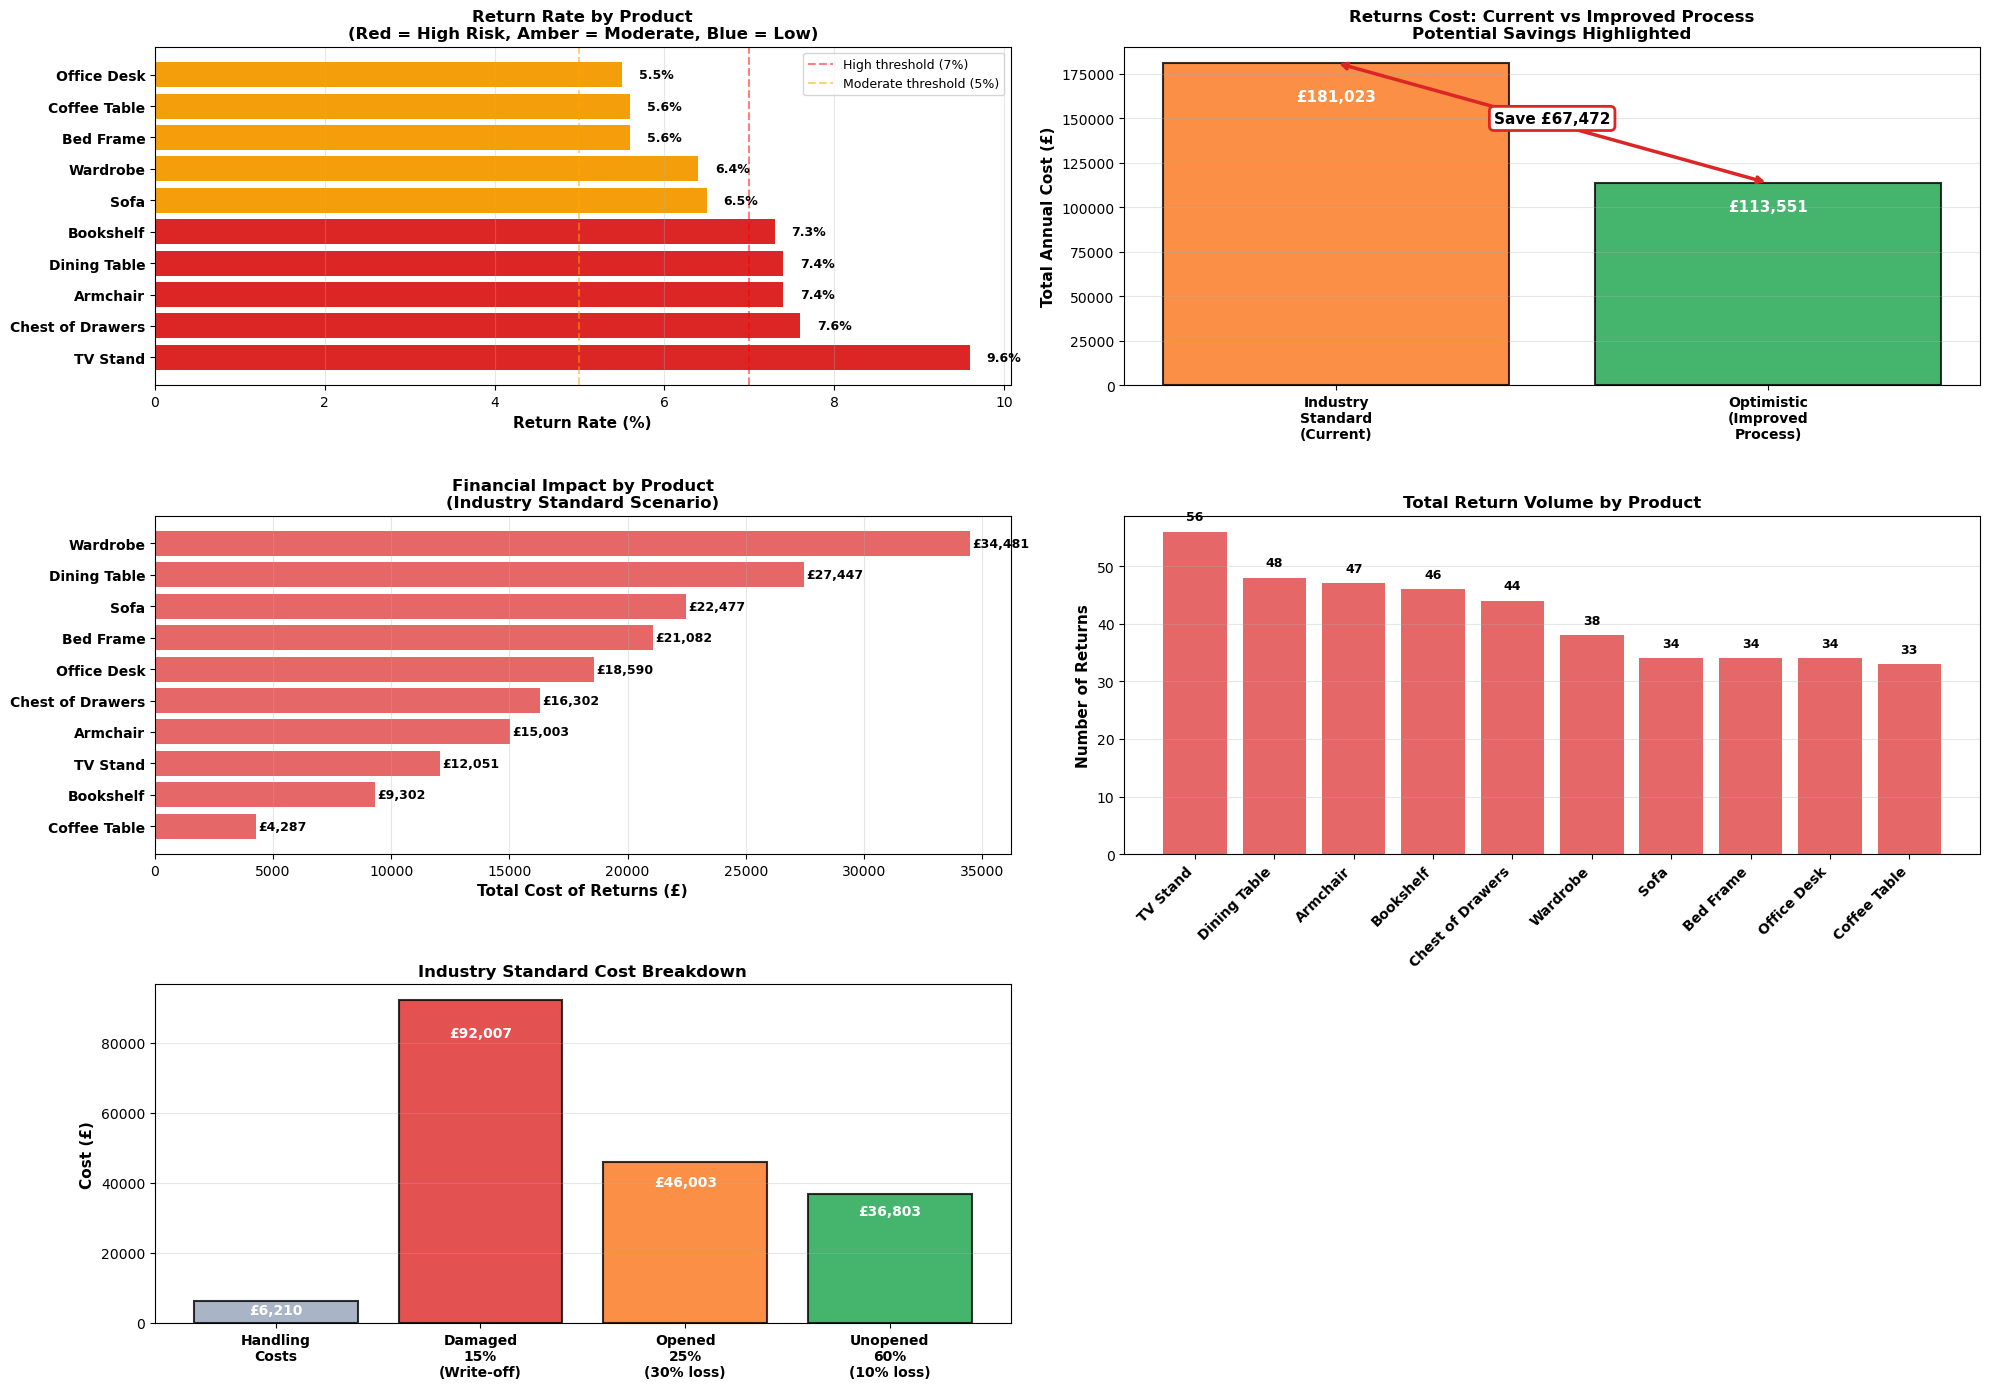

In [29]:
print("=" * 80)
print("UPDATED RETURNS ANALYSIS WITH REALISTIC SCENARIOS")
print("=" * 80)

# Define handling cost and calculate scenarios
RETURN_HANDLING_COST = 15
returned_items = df[df['Returned'] == 1].copy()

# Calculate realistic scenarios
total_lost_profit_base = returned_items['Profit'].sum()
total_handling = len(returned_items) * RETURN_HANDLING_COST
num_returns = len(returned_items)

# Industry Standard Scenario (Most Realistic)
damaged_pct = 0.15
opened_pct = 0.25
unopened_pct = 0.60

damaged_loss = total_lost_profit_base * damaged_pct
opened_loss = total_lost_profit_base * opened_pct * 0.30
unopened_loss = total_lost_profit_base * unopened_pct * 0.10

total_product_loss_standard = damaged_loss + opened_loss + unopened_loss
total_cost_standard = total_product_loss_standard + total_handling

# Optimistic Scenario
damaged_pct_opt = 0.10
opened_pct_opt = 0.20
unopened_pct_opt = 0.70

damaged_loss_opt = total_lost_profit_base * damaged_pct_opt
opened_loss_opt = total_lost_profit_base * opened_pct_opt * 0.20
unopened_loss_opt = total_lost_profit_base * unopened_pct_opt * 0.05

total_product_loss_opt = damaged_loss_opt + opened_loss_opt + unopened_loss_opt
total_cost_opt = total_product_loss_opt + total_handling

# Calculate savings potential
savings_potential = total_cost_standard - total_cost_opt

# Calculate product metrics for the detailed analysis
product_returns = df.groupby('Product').agg({
    'Returned': 'sum',
    'Product ID': 'count'
})

returned_costs_by_product = returned_items.groupby('Product').agg({
    'Profit': 'sum',
    'Revenue': 'sum',
    'Cost': 'sum'
})

# Join without the duplicate 'Returned' column issue
product_returns = product_returns.join(returned_costs_by_product, how='left').fillna(0)
product_returns.columns = ['Returns_Count', 'Total_Orders', 'Lost_Profit_Base', 'Revenue', 'Cost']
product_returns['Return_Rate_%'] = (product_returns['Returns_Count'] / product_returns['Total_Orders'] * 100).round(1)

# Calculate realistic costs by product (Industry Standard)
product_returns['Lost_Profit_Realistic'] = (
    product_returns['Lost_Profit_Base'] * damaged_pct +
    product_returns['Lost_Profit_Base'] * opened_pct * 0.30 +
    product_returns['Lost_Profit_Base'] * unopened_pct * 0.10
)
product_returns['Handling_Costs'] = product_returns['Returns_Count'] * RETURN_HANDLING_COST
product_returns['Total_Return_Cost'] = product_returns['Lost_Profit_Realistic'] + product_returns['Handling_Costs']

product_returns = product_returns.sort_values('Return_Rate_%', ascending=False)

# Create visualization
fig = plt.figure(figsize=(20, 14))

# Chart 1: Return Rate by Product (unchanged)
ax1 = plt.subplot(3, 2, 1)
top_returns = product_returns['Return_Rate_%'].head(10)
colors = ['#dc2626' if x > 7 else '#f59e0b' if x > 5 else '#3b82f6' for x in top_returns.values]
ax1.barh(range(len(top_returns)), top_returns.values, color=colors)
ax1.set_yticks(range(len(top_returns)))
ax1.set_yticklabels(top_returns.index, fontweight='bold')
ax1.set_xlabel('Return Rate (%)', fontweight='bold', fontsize=11)
ax1.set_title('Return Rate by Product\n(Red = High Risk, Amber = Moderate, Blue = Low)', 
              fontweight='bold', fontsize=12)
ax1.axvline(x=7, color='red', linestyle='--', alpha=0.5, linewidth=1.5, label='High threshold (7%)')
ax1.axvline(x=5, color='orange', linestyle='--', alpha=0.5, linewidth=1.5, label='Moderate threshold (5%)')
ax1.grid(axis='x', alpha=0.3)
ax1.legend(fontsize=9)

for i, v in enumerate(top_returns.values):
    ax1.text(v + 0.2, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=9)

# Chart 2: Cost Scenarios Comparison
ax2 = plt.subplot(3, 2, 2)
scenarios = ['Industry\nStandard\n(Current)', 'Optimistic\n(Improved\nProcess)']
costs = [total_cost_standard, total_cost_opt]
colors_scenario = ['#f97316', '#16a34a']

bars = ax2.bar(range(len(scenarios)), costs, color=colors_scenario, alpha=0.8, 
               edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Total Annual Cost (£)', fontweight='bold', fontsize=11)
ax2.set_xticks(range(len(scenarios)))
ax2.set_xticklabels(scenarios, fontweight='bold')
ax2.set_title('Returns Cost: Current vs Improved Process\nPotential Savings Highlighted', 
              fontweight='bold', fontsize=12)
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(axis='y', alpha=0.3)

# Add values inside bars
for i, v in enumerate(costs):
    ax2.text(i, v * 0.92, f'£{v:,.0f}', ha='center', va='top', 
             fontweight='bold', fontsize=11, color='white')

# Add savings arrow
mid_point = (costs[0] + costs[1]) / 2
ax2.annotate('', xy=(1, costs[1]), xytext=(0, costs[0]),
            arrowprops=dict(arrowstyle='<->', color='#dc2626', lw=2.5))
ax2.text(0.5, mid_point, f'Save £{savings_potential:,.0f}', 
         ha='center', fontweight='bold', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='white', edgecolor='#dc2626', linewidth=2))

# Chart 3: Cost of Returns by Product (Top 10)
ax3 = plt.subplot(3, 2, 3)
top_cost_returns = product_returns[product_returns['Total_Return_Cost'] > 0]['Total_Return_Cost'].nlargest(10).sort_values(ascending=True)
ax3.barh(range(len(top_cost_returns)), top_cost_returns.values, color='#dc2626', alpha=0.7)
ax3.set_yticks(range(len(top_cost_returns)))
ax3.set_yticklabels(top_cost_returns.index, fontweight='bold')
ax3.set_xlabel('Total Cost of Returns (£)', fontweight='bold', fontsize=11)
ax3.set_title('Financial Impact by Product\n(Industry Standard Scenario)', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)
ax3.ticklabel_format(style='plain', axis='x')

for i, v in enumerate(top_cost_returns.values):
    ax3.text(v + 100, i, f'£{v:,.0f}', va='center', fontweight='bold', fontsize=9)

# Chart 4: Returns Volume Distribution
ax4 = plt.subplot(3, 2, 4)
returns_distribution = product_returns[product_returns['Returns_Count'] > 0]['Returns_Count'].nlargest(10).sort_values(ascending=False)
ax4.bar(range(len(returns_distribution)), returns_distribution.values, color='#dc2626', alpha=0.7)
ax4.set_xticks(range(len(returns_distribution)))
ax4.set_xticklabels(returns_distribution.index, rotation=45, ha='right', fontweight='bold')
ax4.set_ylabel('Number of Returns', fontweight='bold', fontsize=11)
ax4.set_title('Total Return Volume by Product', fontweight='bold', fontsize=12)
ax4.grid(axis='y', alpha=0.3)

for i, v in enumerate(returns_distribution.values):
    ax4.text(i, v + 2, f'{int(v)}', ha='center', fontweight='bold', fontsize=9)

# Chart 5: Industry Standard Breakdown
ax5 = plt.subplot(3, 2, 5)
breakdown_labels = ['Handling\nCosts', 'Damaged\n15%\n(Write-off)', 'Opened\n25%\n(30% loss)', 'Unopened\n60%\n(10% loss)']
breakdown_values = [total_handling, damaged_loss, opened_loss, unopened_loss]
breakdown_colors = ['#94a3b8', '#dc2626', '#f97316', '#16a34a']

bars2 = ax5.bar(range(len(breakdown_labels)), breakdown_values, color=breakdown_colors, 
                alpha=0.8, edgecolor='black', linewidth=1.5)
ax5.set_xticks(range(len(breakdown_labels)))
ax5.set_xticklabels(breakdown_labels, fontsize=10, fontweight='bold')
ax5.set_ylabel('Cost (£)', fontweight='bold', fontsize=11)
ax5.set_title('Industry Standard Cost Breakdown', fontweight='bold', fontsize=12)
ax5.grid(axis='y', alpha=0.3)
ax5.ticklabel_format(style='plain', axis='y')

for i, v in enumerate(breakdown_values):
    ax5.text(i, v * 0.92, f'£{v:,.0f}', ha='center', va='top', 
             fontweight='bold', fontsize=10, color='white')

plt.tight_layout()
plt.savefig('returns_comprehensive_analysis_updated.png', dpi=300, bbox_inches='tight')
plt.show()

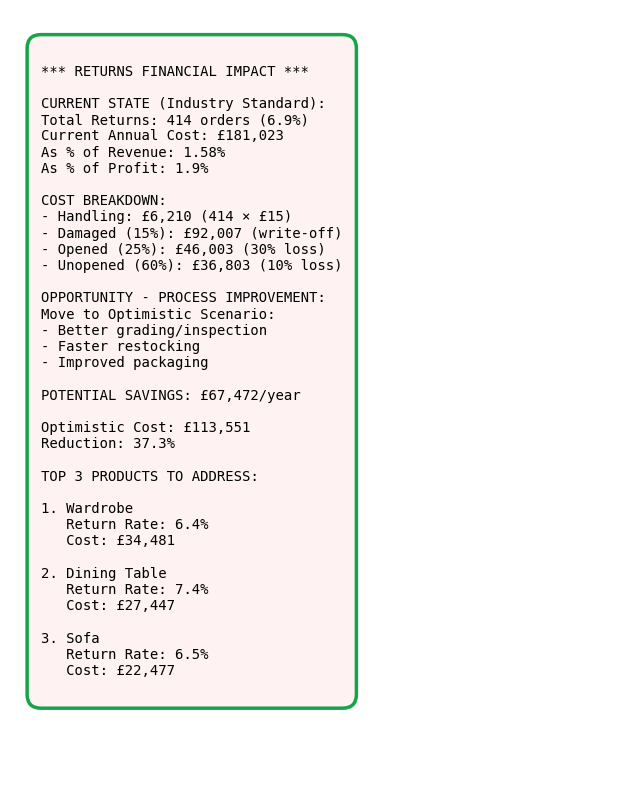


KEY FINDINGS

REALISTIC RETURNS COST ANALYSIS:

Current State (Industry Standard):
- Annual Cost: £181,022.93
- Assumes 60% of returns can be resold with minimal loss
- 15% damaged/defective (complete write-off)
- 25% opened but resellable at discount

Improvement Opportunity:
- Target (Optimistic): £113,551.27
- SAVINGS POTENTIAL: £67,471.66/year
- Reduction: 37.3%

How to Achieve Savings:
1. Reduce damaged rate from 15% → 10%
   (Better packaging, handling)
   Saves: £30,668.93

2. Improve resale value of opened items
   (Better grading, faster processing)
   Saves: £21,468.25

3. Increase perfect condition returns 60% → 70%
   (Better customer education, accurate descriptions)
   Saves: £15,334.47

RECOMMENDATION:
The £67,472 savings opportunity makes returns process
improvement a HIGH-ROI investment.

Combined with reducing return rate from 6.9% to 5%:
- Return rate reduction: £49,781 savings
- Process improvement: £67,472 savings
- TOTAL OPPORTUNITY: £117,253/year


Analysis comp

In [30]:
# Chart 6: UPDATED Financial Impact Summary

plt.figure(figsize=(8, 10)) 
ax6 = plt.gca() 
ax6.axis('off')

total_orders = len(df)
overall_return_rate = (num_returns / total_orders * 100)
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
return_cost_pct = (total_cost_standard / total_revenue * 100)
profit_impact_pct = (total_product_loss_standard / total_profit * 100)

# Top 3 products by cost
top_3_products = product_returns[product_returns['Total_Return_Cost'] > 0].nlargest(3, 'Total_Return_Cost')

summary_text = f"""
*** RETURNS FINANCIAL IMPACT ***

CURRENT STATE (Industry Standard):
Total Returns: {num_returns:,} orders ({overall_return_rate:.1f}%)
Current Annual Cost: £{total_cost_standard:,.0f}
As % of Revenue: {return_cost_pct:.2f}%
As % of Profit: {profit_impact_pct:.1f}%

COST BREAKDOWN:
- Handling: £{total_handling:,.0f} ({num_returns} × £{RETURN_HANDLING_COST})
- Damaged (15%): £{damaged_loss:,.0f} (write-off)
- Opened (25%): £{opened_loss:,.0f} (30% loss)
- Unopened (60%): £{unopened_loss:,.0f} (10% loss)

OPPORTUNITY - PROCESS IMPROVEMENT:
Move to Optimistic Scenario:
- Better grading/inspection
- Faster restocking
- Improved packaging

POTENTIAL SAVINGS: £{savings_potential:,.0f}/year

Optimistic Cost: £{total_cost_opt:,.0f}
Reduction: {((total_cost_standard - total_cost_opt) / total_cost_standard * 100):.1f}%

TOP 3 PRODUCTS TO ADDRESS:
"""

for i, (product, row) in enumerate(top_3_products.iterrows(), 1):
    summary_text += f"\n{i}. {product}"
    summary_text += f"\n   Return Rate: {row['Return_Rate_%']:.1f}%"
    summary_text += f"\n   Cost: £{row['Total_Return_Cost']:,.0f}\n"

ax6.text(0.05, 0.95, summary_text, transform=ax6.transAxes,
        fontsize=10, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round,pad=1', facecolor='#fef2f2', edgecolor='#16a34a', linewidth=2.5))

plt.savefig('returns_comprehensive_analysis_updated_summary.png', dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

print("\n" + "=" * 80)
print("KEY FINDINGS")
print("=" * 80)
print(f"""
REALISTIC RETURNS COST ANALYSIS:

Current State (Industry Standard):
- Annual Cost: £{total_cost_standard:,.2f}
- Assumes 60% of returns can be resold with minimal loss
- 15% damaged/defective (complete write-off)
- 25% opened but resellable at discount

Improvement Opportunity:
- Target (Optimistic): £{total_cost_opt:,.2f}
- SAVINGS POTENTIAL: £{savings_potential:,.2f}/year
- Reduction: {((total_cost_standard - total_cost_opt) / total_cost_standard * 100):.1f}%

How to Achieve Savings:
1. Reduce damaged rate from 15% → 10%
   (Better packaging, handling)
   Saves: £{(damaged_loss - damaged_loss_opt):,.2f}

2. Improve resale value of opened items
   (Better grading, faster processing)
   Saves: £{(opened_loss - opened_loss_opt):,.2f}

3. Increase perfect condition returns 60% → 70%
   (Better customer education, accurate descriptions)
   Saves: £{(unopened_loss - unopened_loss_opt):,.2f}

RECOMMENDATION:
The £{savings_potential:,.0f} savings opportunity makes returns process
improvement a HIGH-ROI investment.

Combined with reducing return rate from 6.9% to 5%:
- Return rate reduction: £{(total_cost_standard * 0.275):,.0f} savings
- Process improvement: £{savings_potential:,.0f} savings
- TOTAL OPPORTUNITY: £{(total_cost_standard * 0.275 + savings_potential):,.0f}/year
""")

print("\n" + "=" * 80)
print("Analysis complete! Chart saved as 'returns_comprehensive_analysis_updated.png'")
print("=" * 80)

In [31]:
# Create discount categories

df['Has_Discount'] = df['Discount'] > 0

# Compare average quantity sold
avg_quantity = df.groupby('Has_Discount')['Quantity'].mean()
print("Average Quantity Sold:")
print(f"No Discount: {avg_quantity[False]:.2f}")
print(f"With Discount: {avg_quantity[True]:.2f}")

# Calculate percentage difference
pct_increase = ((avg_quantity[True] - avg_quantity[False]) / avg_quantity[False]) * 100
print(f"\nPercentage difference: {pct_increase:.2f}%")

Average Quantity Sold:
No Discount: 3.24
With Discount: 2.99

Percentage difference: -7.66%


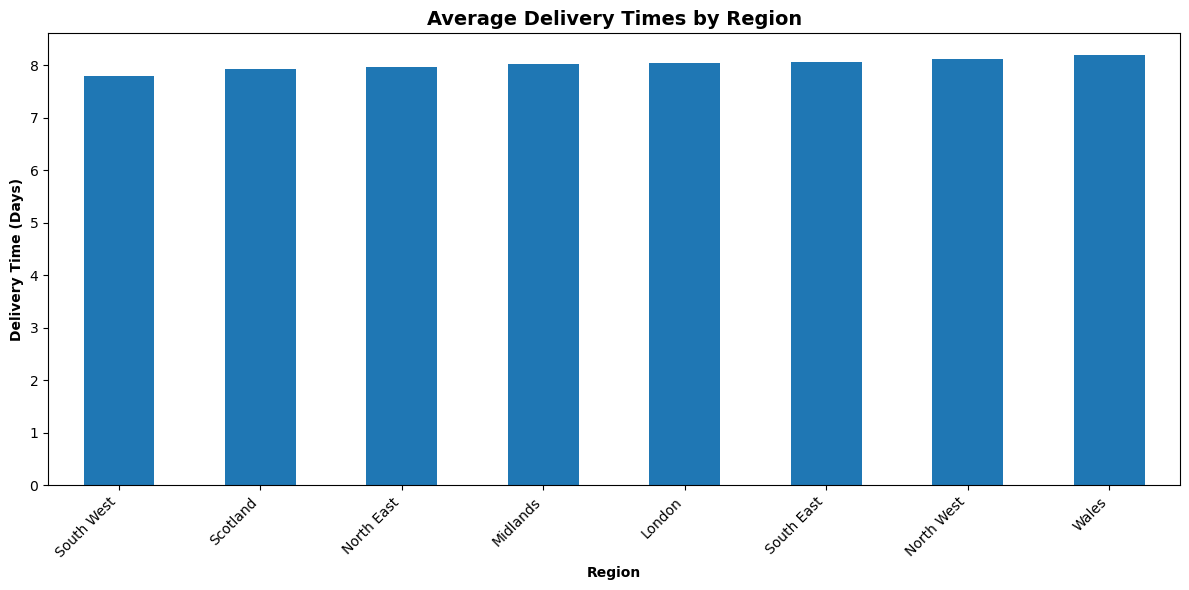

In [32]:
# Calculate average delivery times by region

avg_deliverytimes_by_region = df.groupby("Region")["Delivery Time (Days)"].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_deliverytimes_by_region.plot(kind="bar")
plt.title("Average Delivery Times by Region", fontweight='bold', fontsize=14)
plt.xlabel("Region", fontweight='bold')
plt.ylabel("Delivery Time (Days)", fontweight='bold')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
plt.savefig('delivery_times_by_region.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

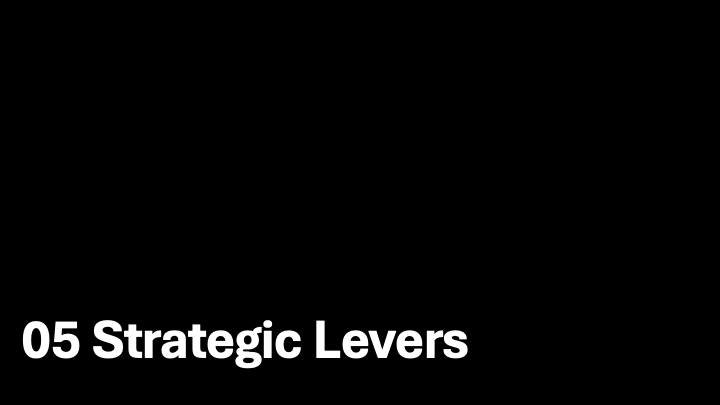

In [33]:
# Calculate correlation between Discount and Returned

correlation = df['Discount'].corr(df['Returned'])
print(f"Correlation between Discount and Returns: {correlation:.3f}")

Correlation between Discount and Returns: 0.007


In [34]:
# Create discount categories

df['Has_Discount'] = df['Discount'] > 0

# Compare average quantity sold
avg_quantity = df.groupby('Has_Discount')['Quantity'].mean()
print("Average Quantity Sold:")
print(f"No Discount: {avg_quantity[False]:.2f}")
print(f"With Discount: {avg_quantity[True]:.2f}")

# Calculate percentage difference
pct_increase = ((avg_quantity[True] - avg_quantity[False]) / avg_quantity[False]) * 100
print(f"\nPercentage difference: {pct_increase:.2f}%")

Average Quantity Sold:
No Discount: 3.24
With Discount: 2.99

Percentage difference: -7.66%


In [35]:
# Filter for orders with discounts

discounted_items = df[df['Discount'] > 0]

# Group by product
discount_summary = discounted_items.groupby('Product')['Discount'].agg(['mean', 'min', 'max', 'count'])
discount_summary.columns = ['Avg_Discount_%', 'Min_Discount_%', 'Max_Discount_%', 'Times_Discounted']
discount_summary[['Avg_Discount_%', 'Min_Discount_%', 'Max_Discount_%']] = (discount_summary[['Avg_Discount_%', 'Min_Discount_%', 'Max_Discount_%']] * 100).round(1)
discount_summary['Times_Discounted'] = discounted_items.groupby('Product')['Discount'].count()
discount_summary = discount_summary.sort_values('Avg_Discount_%', ascending=False)
print(discount_summary)

                  Avg_Discount_%  Min_Discount_%  Max_Discount_%  \
Product                                                            
Bookshelf                   13.0             1.0            25.0   
Chest of Drawers            13.0             1.0            25.0   
Sofa                        13.0             1.0            25.0   
TV Stand                    12.9             1.0            25.0   
Bed Frame                   12.8             1.0            25.0   
Wardrobe                    12.8             1.0            25.0   
Armchair                    12.6             1.0            25.0   
Coffee Table                12.6             1.0            25.0   
Dining Table                12.6             1.0            25.0   
Office Desk                 12.6             1.0            25.0   

                  Times_Discounted  
Product                             
Bookshelf                      614  
Chest of Drawers               571  
Sofa                           506 

COMPREHENSIVE DISCOUNT ANALYSIS

OVERALL DISCOUNT METRICS:
--------------------------------------------------------------------------------
Total Orders: 6,000
Discounted Orders: 5,887 (98.1%)
Non-Discounted Orders: 113 (1.9%)
Average Discount (all orders): 12.54%
Average Discount (when applied): 12.78%

INSIGHT 1: DISCOUNT CLUSTERING ON LOW-PROFIT PRODUCTS

Correlation between Profit Margin and Discount Frequency: 0.405
→ WEAK/NO correlation: Discounts are NOT specifically targeting low-profit products

Products with Highest Discount Frequency:
--------------------------------------------------------------------------------
Office Desk          | Margin:  85.0% | Discount Freq:  98.9% | Avg Discount:  12.5%
Bed Frame            | Margin:  80.0% | Discount Freq:  98.8% | Avg Discount:  12.6%
Dining Table         | Margin:  83.3% | Discount Freq:  98.8% | Avg Discount:  12.5%
Chest of Drawers     | Margin:  83.3% | Discount Freq:  98.3% | Avg Discount:  12.8%
Coffee Table         | Marg

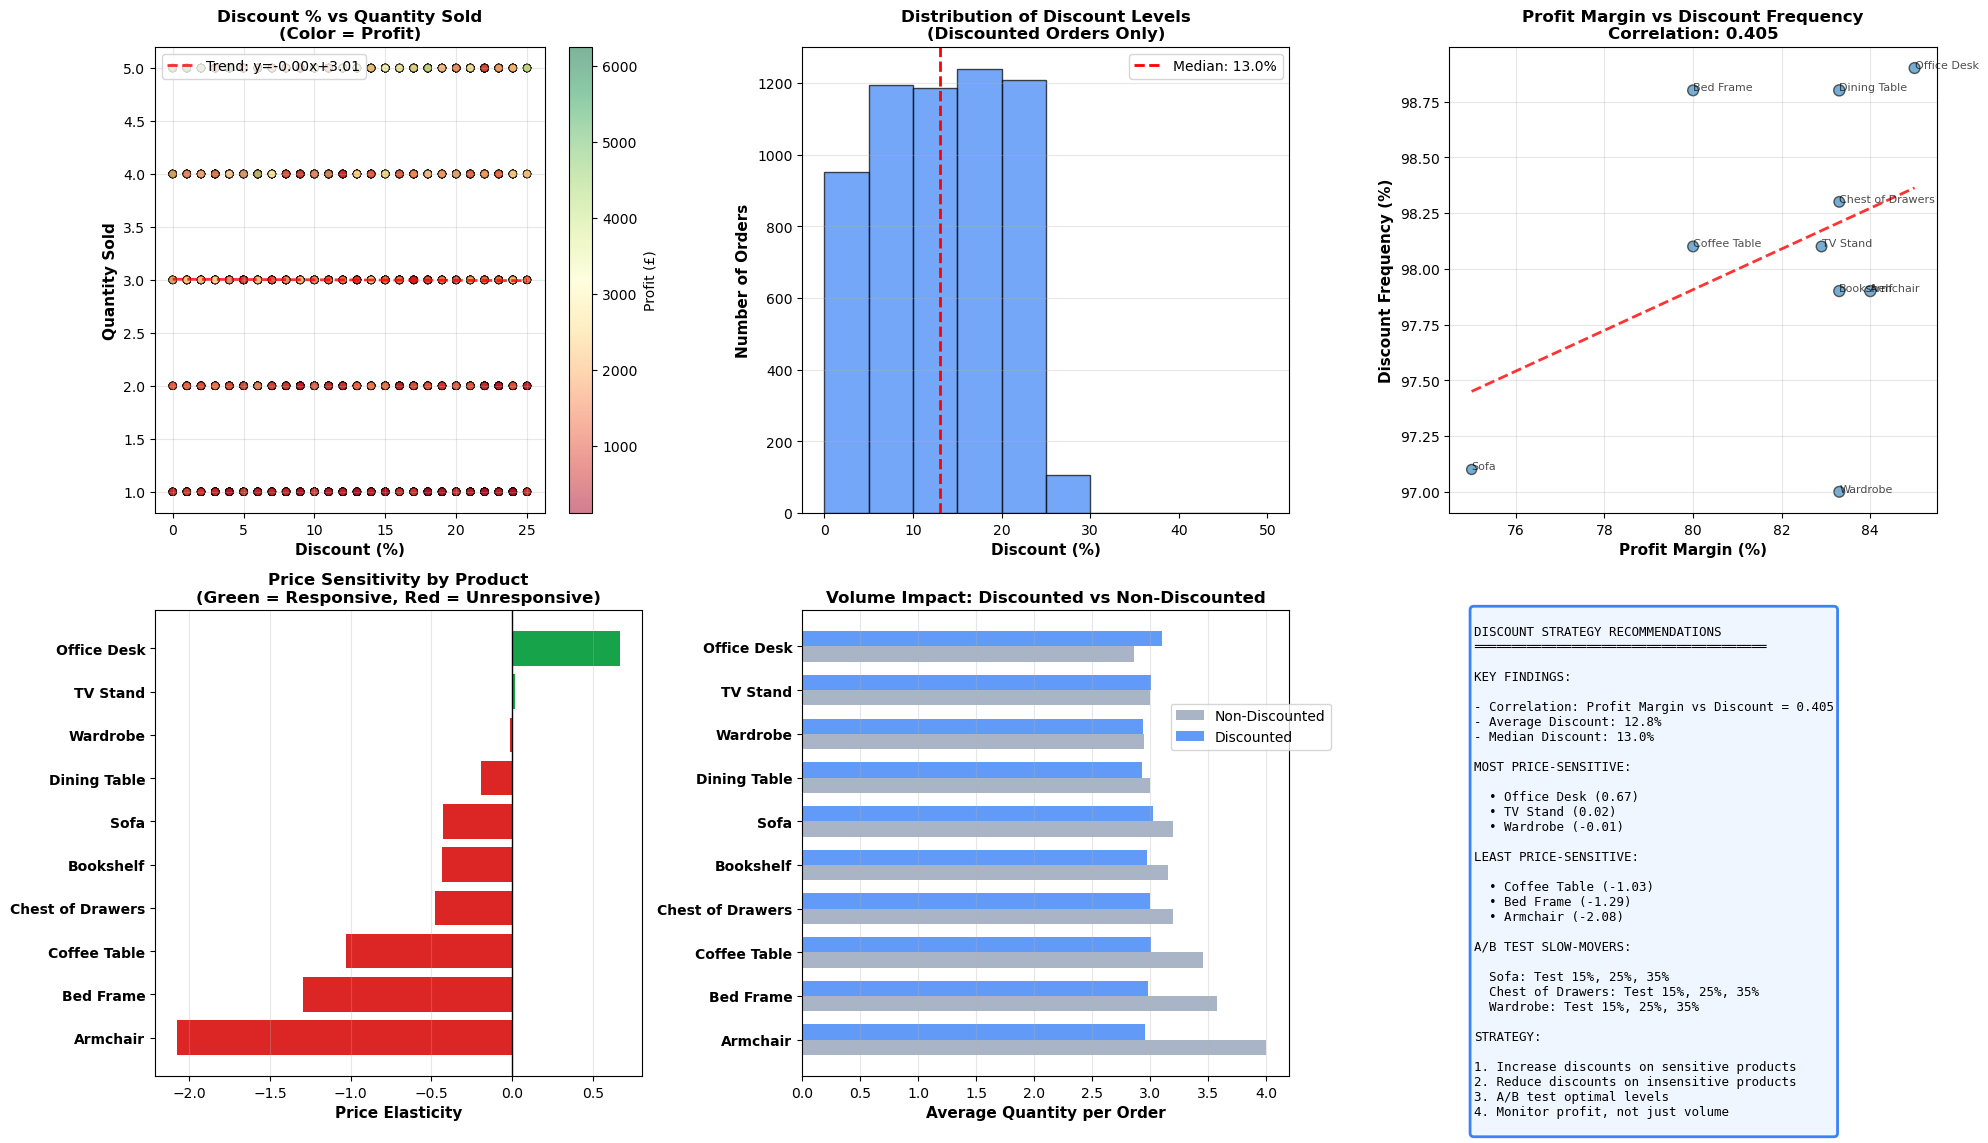


Analysis complete! Chart saved as 'discount_comprehensive_analysis.png'


In [36]:
print("=" * 80)
print("COMPREHENSIVE DISCOUNT ANALYSIS")
print("=" * 80)

# Create derived columns first
df['Has_Discount'] = df['Discount'] > 0
df['Discount_%'] = (df['Discount'] * 100).round(1)

# Separate discounted vs non-discounted items
discounted_items = df[df['Has_Discount'] == True].copy()
non_discounted_items = df[df['Has_Discount'] == False].copy()

print("\nOVERALL DISCOUNT METRICS:")
print("-" * 80)
print(f"Total Orders: {len(df):,}")
print(f"Discounted Orders: {len(discounted_items):,} ({len(discounted_items)/len(df)*100:.1f}%)")
print(f"Non-Discounted Orders: {len(non_discounted_items):,} ({len(non_discounted_items)/len(df)*100:.1f}%)")
print(f"Average Discount (all orders): {df['Discount_%'].mean():.2f}%")
print(f"Average Discount (when applied): {discounted_items['Discount_%'].mean():.2f}%")

# 1. INSIGHT: Are discounts clustered on low-profit products?
print("\n" + "=" * 80)
print("INSIGHT 1: DISCOUNT CLUSTERING ON LOW-PROFIT PRODUCTS")
print("=" * 80)

# Calculate profit margin by product
product_analysis = df.groupby('Product').agg({
    'Profit': 'sum',
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Product ID': 'count'
})

# Calculate discount metrics separately
discount_metrics = df.groupby('Product').agg({
    'Discount_%': 'mean',
    'Has_Discount': lambda x: (x.sum() / len(x) * 100)
})

# Merge them
product_analysis = product_analysis.join(discount_metrics)

product_analysis['Profit_Margin_%'] = (product_analysis['Profit'] / product_analysis['Revenue'] * 100).round(1)
product_analysis['Discount_Frequency_%'] = product_analysis['Has_Discount'].round(1)
product_analysis['Avg_Discount_%'] = product_analysis['Discount_%'].round(1)
product_analysis['Total_Orders'] = product_analysis['Product ID']

# Correlation between profit margin and discount frequency
correlation = product_analysis['Profit_Margin_%'].corr(product_analysis['Discount_Frequency_%'])
print(f"\nCorrelation between Profit Margin and Discount Frequency: {correlation:.3f}")
if correlation < -0.3:
    print("→ STRONG NEGATIVE correlation: Low-profit products ARE heavily discounted")
elif correlation < -0.1:
    print("→ MODERATE NEGATIVE correlation: Some clustering of discounts on low-profit products")
else:
    print("→ WEAK/NO correlation: Discounts are NOT specifically targeting low-profit products")

# Show products with highest discount frequency
high_discount_products = product_analysis.nlargest(5, 'Discount_Frequency_%')
print("\nProducts with Highest Discount Frequency:")
print("-" * 80)
for product, row in high_discount_products.iterrows():
    print(f"{product:20s} | Margin: {row['Profit_Margin_%']:5.1f}% | Discount Freq: {row['Discount_Frequency_%']:5.1f}% | Avg Discount: {row['Avg_Discount_%']:5.1f}%")

# 2. INSIGHT: Which products are most price-sensitive?
print("\n" + "=" * 80)
print("INSIGHT 2: PRICE SENSITIVITY BY PRODUCT")
print("=" * 80)

# Calculate elasticity
price_sensitivity = []
for product in df['Product'].unique():
    product_data = df[df['Product'] == product]
    discounted = product_data[product_data['Has_Discount'] == True]
    non_discounted = product_data[product_data['Has_Discount'] == False]
    
    if len(discounted) > 5 and len(non_discounted) > 5:
        avg_qty_discounted = discounted['Quantity'].mean()
        avg_qty_non_discounted = non_discounted['Quantity'].mean()
        avg_discount = discounted['Discount_%'].mean()
        
        qty_change_pct = ((avg_qty_discounted - avg_qty_non_discounted) / avg_qty_non_discounted * 100)
        elasticity = qty_change_pct / avg_discount if avg_discount > 0 else 0
        
        price_sensitivity.append({
            'Product': product,
            'Avg_Qty_Discounted': avg_qty_discounted,
            'Avg_Qty_Non_Discounted': avg_qty_non_discounted,
            'Qty_Change_%': qty_change_pct,
            'Avg_Discount_%': avg_discount,
            'Elasticity': elasticity,
            'Discounted_Orders': len(discounted),
            'Non_Discounted_Orders': len(non_discounted)
        })

sensitivity_df = pd.DataFrame(price_sensitivity)
sensitivity_df = sensitivity_df.sort_values('Elasticity', ascending=False)

print("\nMost Price-Sensitive Products (Highest Elasticity):")
print("-" * 80)
print("Products where discounts lead to significant volume increases")
print("-" * 80)
for _, row in sensitivity_df.head(5).iterrows():
    print(f"{row['Product']:20s} | Elasticity: {row['Elasticity']:6.2f} | Qty Change: {row['Qty_Change_%']:+6.1f}% | Avg Discount: {row['Avg_Discount_%']:5.1f}%")

print("\nLeast Price-Sensitive Products (Lowest Elasticity):")
print("-" * 80)
print("Products where discounts do NOT significantly increase volume")
print("-" * 80)
for _, row in sensitivity_df.tail(5).iterrows():
    print(f"{row['Product']:20s} | Elasticity: {row['Elasticity']:6.2f} | Qty Change: {row['Qty_Change_%']:+6.1f}% | Avg Discount: {row['Avg_Discount_%']:5.1f}%")

# 3. INSIGHT: Does discounting improve volume for specific categories?
print("\n" + "=" * 80)
print("INSIGHT 3: DISCOUNT EFFECTIVENESS BY PRODUCT")
print("=" * 80)

product_discount_impact = df.groupby(['Product', 'Has_Discount']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum',
    'Product ID': 'count'
}).reset_index()

print("\nVolume and Profit Impact by Product:")
print("-" * 80)
for product in df['Product'].unique():
    product_data = product_discount_impact[product_discount_impact['Product'] == product]
    
    discounted = product_data[product_data['Has_Discount'] == True]
    non_discounted = product_data[product_data['Has_Discount'] == False]
    
    if len(discounted) > 0 and len(non_discounted) > 0:
        disc_qty = discounted['Quantity'].values[0]
        non_disc_qty = non_discounted['Quantity'].values[0]
        disc_profit = discounted['Profit'].values[0]
        non_disc_profit = non_discounted['Profit'].values[0]
        disc_orders = discounted['Product ID'].values[0]
        non_disc_orders = non_discounted['Product ID'].values[0]
        
        disc_qty_per_order = disc_qty / disc_orders
        non_disc_qty_per_order = non_disc_qty / non_disc_orders
        disc_profit_per_order = disc_profit / disc_orders
        non_disc_profit_per_order = non_disc_profit / non_disc_orders
        
        qty_lift = ((disc_qty_per_order - non_disc_qty_per_order) / non_disc_qty_per_order * 100)
        profit_impact = ((disc_profit_per_order - non_disc_profit_per_order) / non_disc_profit_per_order * 100)
        
        print(f"\n{product}:")
        print(f"  Qty per order: Discounted={disc_qty_per_order:.2f} vs Non-Disc={non_disc_qty_per_order:.2f} ({qty_lift:+.1f}%)")
        print(f"  Profit per order: Discounted=£{disc_profit_per_order:.2f} vs Non-Disc=£{non_disc_profit_per_order:.2f} ({profit_impact:+.1f}%)")

# CREATE VISUALIZATIONS
fig = plt.figure(figsize=(20, 12))

# Chart 1: Scatter plot
ax1 = plt.subplot(2, 3, 1)
sample_size = min(5000, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

scatter = ax1.scatter(sample_df['Discount_%'], sample_df['Quantity'], 
                     c=sample_df['Profit'], cmap='RdYlGn', 
                     alpha=0.5, s=30, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('Discount (%)', fontweight='bold', fontsize=11)
ax1.set_ylabel('Quantity Sold', fontweight='bold', fontsize=11)
ax1.set_title('Discount % vs Quantity Sold\n(Color = Profit)', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Profit (£)')

z = np.polyfit(sample_df['Discount_%'], sample_df['Quantity'], 1)
p = np.poly1d(z)
ax1.plot(sample_df['Discount_%'].sort_values(), p(sample_df['Discount_%'].sort_values()), 
         "r--", alpha=0.8, linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
ax1.legend()

# Chart 2: Histogram
ax2 = plt.subplot(2, 3, 2)
discount_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
ax2.hist(discounted_items['Discount_%'], bins=discount_bins, color='#3b82f6', 
         edgecolor='black', alpha=0.7)
ax2.set_xlabel('Discount (%)', fontweight='bold', fontsize=11)
ax2.set_ylabel('Number of Orders', fontweight='bold', fontsize=11)
ax2.set_title('Distribution of Discount Levels\n(Discounted Orders Only)', fontweight='bold', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

median_discount = discounted_items['Discount_%'].median()
ax2.axvline(x=median_discount, color='red', linestyle='--', linewidth=2, 
           label=f'Median: {median_discount:.1f}%')
ax2.legend()

# Chart 3: Correlation
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(product_analysis['Profit_Margin_%'], product_analysis['Discount_Frequency_%'],
           s=product_analysis['Total_Orders']/10, alpha=0.6, edgecolors='black', linewidth=1)
ax3.set_xlabel('Profit Margin (%)', fontweight='bold', fontsize=11)
ax3.set_ylabel('Discount Frequency (%)', fontweight='bold', fontsize=11)
ax3.set_title(f'Profit Margin vs Discount Frequency\nCorrelation: {correlation:.3f}', 
             fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)

z2 = np.polyfit(product_analysis['Profit_Margin_%'], product_analysis['Discount_Frequency_%'], 1)
p2 = np.poly1d(z2)
x_trend = np.linspace(product_analysis['Profit_Margin_%'].min(), 
                      product_analysis['Profit_Margin_%'].max(), 100)
ax3.plot(x_trend, p2(x_trend), "r--", alpha=0.8, linewidth=2)

for product, row in product_analysis.iterrows():
    ax3.annotate(product, (row['Profit_Margin_%'], row['Discount_Frequency_%']),
                fontsize=8, alpha=0.7)

# Chart 4: Elasticity
ax4 = plt.subplot(2, 3, 4)
if len(sensitivity_df) > 0:
    sensitivity_sorted = sensitivity_df.sort_values('Elasticity', ascending=True).tail(10)
    colors = ['#16a34a' if x > 0 else '#dc2626' for x in sensitivity_sorted['Elasticity'].values]
    ax4.barh(range(len(sensitivity_sorted)), sensitivity_sorted['Elasticity'].values, color=colors)
    ax4.set_yticks(range(len(sensitivity_sorted)))
    ax4.set_yticklabels(sensitivity_sorted['Product'], fontweight='bold')
    ax4.set_xlabel('Price Elasticity', fontweight='bold', fontsize=11)
    ax4.set_title('Price Sensitivity by Product\n(Green = Responsive, Red = Unresponsive)', 
                 fontweight='bold', fontsize=12)
    ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
    ax4.grid(axis='x', alpha=0.3)

# Chart 5: Volume comparison
ax5 = plt.subplot(2, 3, 5)
comparison_data = []
for product in df['Product'].unique():
    product_data = df[df['Product'] == product]
    disc = product_data[product_data['Has_Discount'] == True]
    non_disc = product_data[product_data['Has_Discount'] == False]
    
    if len(disc) > 0 and len(non_disc) > 0:
        comparison_data.append({
            'Product': product,
            'Discounted': disc['Quantity'].mean(),
            'Non_Discounted': non_disc['Quantity'].mean()
        })

if len(comparison_data) > 0:
    comparison_df = pd.DataFrame(comparison_data)
    comparison_df['Lift_%'] = ((comparison_df['Discounted'] - comparison_df['Non_Discounted']) / 
                               comparison_df['Non_Discounted'] * 100)
    comparison_df = comparison_df.sort_values('Lift_%', ascending=True)

    x = np.arange(len(comparison_df))
    width = 0.35
    ax5.barh(x - width/2, comparison_df['Non_Discounted'], width, label='Non-Discounted', 
            color='#94a3b8', alpha=0.8)
    ax5.barh(x + width/2, comparison_df['Discounted'], width, label='Discounted', 
            color='#3b82f6', alpha=0.8)
    ax5.set_yticks(x)
    ax5.set_yticklabels(comparison_df['Product'], fontweight='bold')
    ax5.set_xlabel('Average Quantity per Order', fontweight='bold', fontsize=11)
    ax5.set_title('Volume Impact: Discounted vs Non-Discounted', fontweight='bold', fontsize=12)
    ax5.legend(loc='center right', bbox_to_anchor=(1.1, 0.75))
    ax5.grid(axis='x', alpha=0.3)

# Chart 6: Recommendations
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')

slow_movers = product_analysis.nsmallest(3, 'Quantity')

recommendations_text = f"""
DISCOUNT STRATEGY RECOMMENDATIONS
═══════════════════════════════════════

KEY FINDINGS:

- Correlation: Profit Margin vs Discount = {correlation:.3f}
- Average Discount: {discounted_items['Discount_%'].mean():.1f}%
- Median Discount: {median_discount:.1f}%

MOST PRICE-SENSITIVE:
"""

if len(sensitivity_df) > 0:
    for _, row in sensitivity_df.head(3).iterrows():
        recommendations_text += f"\n  • {row['Product']} ({row['Elasticity']:.2f})"

    recommendations_text += "\n\nLEAST PRICE-SENSITIVE:\n"
    for _, row in sensitivity_df.tail(3).iterrows():
        recommendations_text += f"\n  • {row['Product']} ({row['Elasticity']:.2f})"

recommendations_text += f"""

A/B TEST SLOW-MOVERS:
"""

for product, row in slow_movers.iterrows():
    recommendations_text += f"\n  {product}: Test 15%, 25%, 35%"

recommendations_text += """

STRATEGY:

1. Increase discounts on sensitive products
2. Reduce discounts on insensitive products
3. A/B test optimal levels
4. Monitor profit, not just volume
"""

ax6.text(0.05, 1, recommendations_text, transform=ax6.transAxes,
        fontsize=9, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='#eff6ff', edgecolor='#3b82f6', linewidth=2))

plt.tight_layout()
plt.savefig('discount_comprehensive_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
print("Analysis complete! Chart saved as 'discount_comprehensive_analysis.png'")
print("=" * 80)

DISCOUNT OPTIMIZATION & SAVINGS ANALYSIS

Calculating Product Elasticity...

SAVINGS OPPORTUNITY: £1,451,283.50
Total Annual Discount Spend:     £1,639,923.50
Wasted on Unresponsive Products: £1,451,283.50 (88.5%)
--------------------------------------------------------------------------------


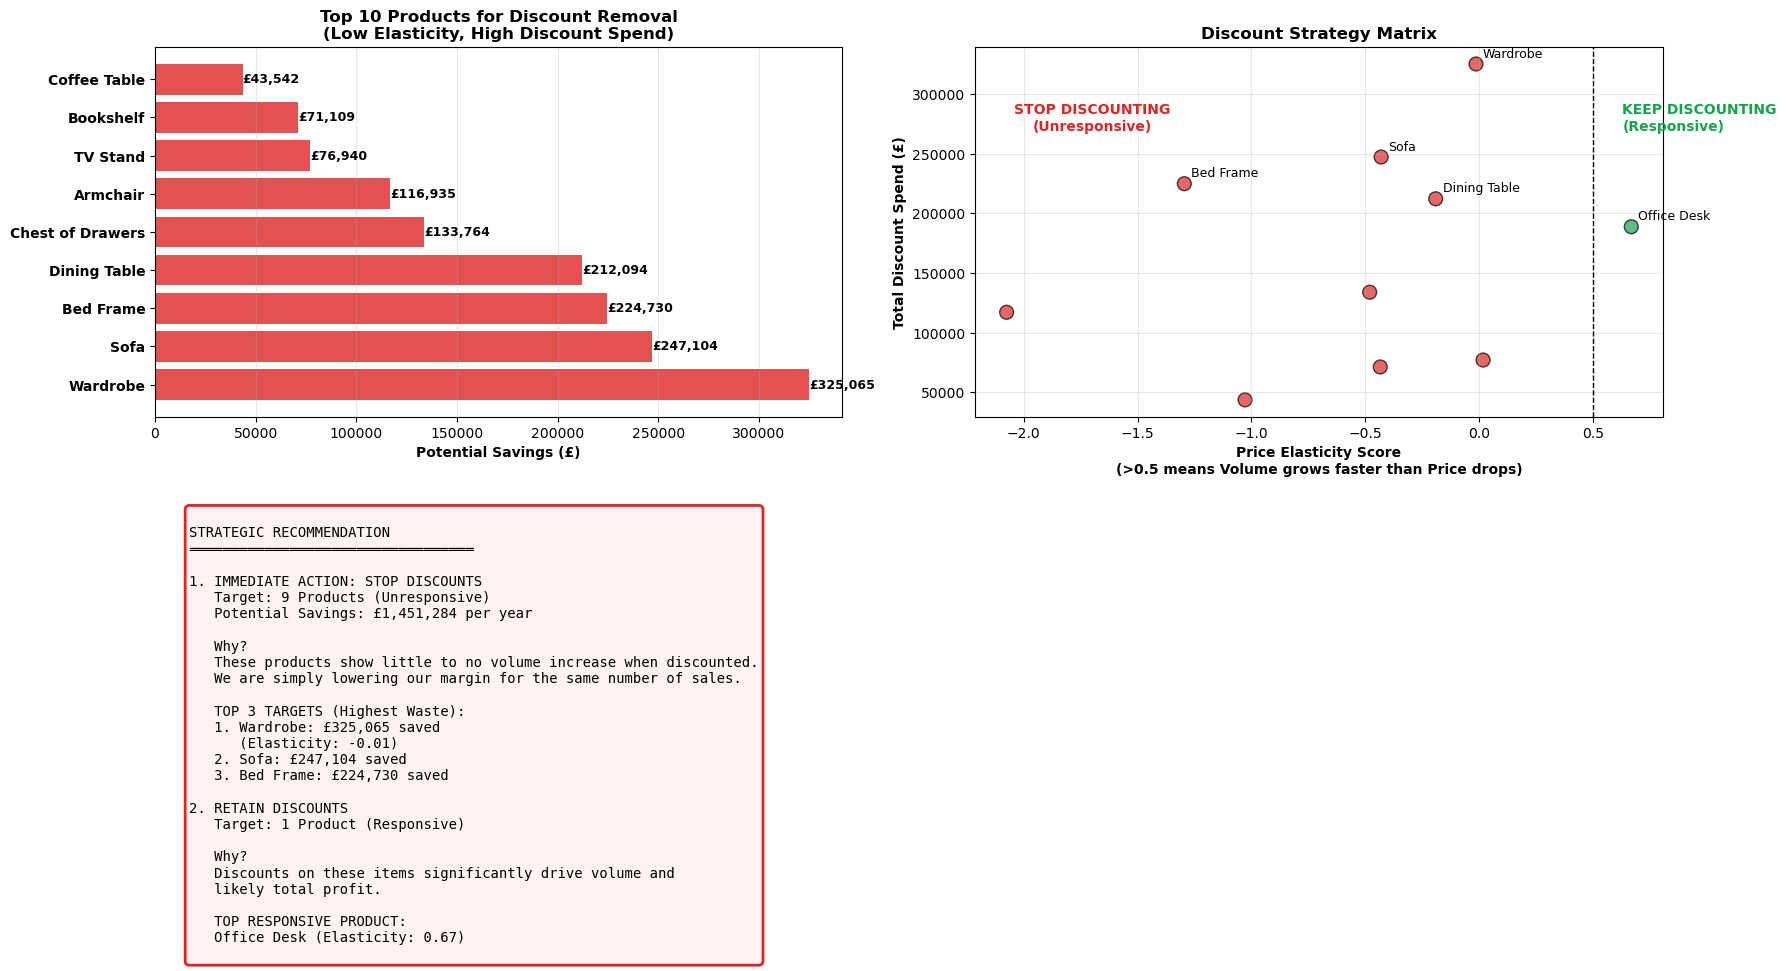


DETAILED SAVINGS BREAKDOWN (Top 10 Unresponsive Products):
Product                        | Elasticity | Current Spend   | Recommendation 
--------------------------------------------------------------------------------
Wardrobe                       | -0.01      | £325,065        | STOP DISCOUNT
Sofa                           | -0.43      | £247,104        | STOP DISCOUNT
Bed Frame                      | -1.29      | £224,730        | STOP DISCOUNT
Dining Table                   | -0.19      | £212,094        | STOP DISCOUNT
Chest of Drawers               | -0.48      | £133,764        | STOP DISCOUNT
Armchair                       | -2.08      | £116,935        | STOP DISCOUNT
TV Stand                       | 0.02       | £76,940         | STOP DISCOUNT
Bookshelf                      | -0.43      | £71,109         | STOP DISCOUNT
Coffee Table                   | -1.03      | £43,542         | STOP DISCOUNT

----------------------------------------------------------------------------

In [37]:
# Determine financial savings to be made by ending discounting of products not responsive to discounts

# ==========================================
# 1. SETUP & DATA PREPARATION
# ==========================================
print("=" * 80)
print("DISCOUNT OPTIMIZATION & SAVINGS ANALYSIS")
print("=" * 80)

# Calculate the actual monetary value of the discount given per order
# Formula: Revenue is post-discount. Original Price = Revenue / (1 - Discount)
# Discount Amount = Original Price - Revenue
# Handle case where Discount is 1 (100% off) to avoid division by zero
df['Original_Price_Est'] = df.apply(
    lambda x: x['Revenue'] / (1 - x['Discount']) if x['Discount'] < 1 else 0, axis=1
)
df['Discount_Amount_£'] = df['Original_Price_Est'] - df['Revenue']
df['Discount_%'] = (df['Discount'] * 100).round(1)

# ==========================================
# 2. ELASTICITY CALCULATION (Identify Unresponsive Products)
# ==========================================
print("\nCalculating Product Elasticity...")

elasticity_data = []

for product in df['Product'].unique():
    product_data = df[df['Product'] == product]
    discounted = product_data[product_data['Discount'] > 0]
    non_discounted = product_data[product_data['Discount'] == 0]
    
    # We need enough data to make a valid comparison
    if len(discounted) > 5 and len(non_discounted) > 5:
        avg_qty_disc = discounted['Quantity'].mean()
        avg_qty_nodisc = non_discounted['Quantity'].mean()
        avg_discount_pct = discounted['Discount_%'].mean()
        
        # Calculate Lift: How much more volume do we get when we discount?
        qty_lift_pct = ((avg_qty_disc - avg_qty_nodisc) / avg_qty_nodisc * 100)
        
        # Simplified Elasticity: % Volume Lift / % Discount Depth
        # e.g., If 10% discount gives 20% volume boost, Score is 2.0 (Responsive)
        # If 10% discount gives 0% volume boost, Score is 0.0 (Unresponsive)
        elasticity_score = qty_lift_pct / avg_discount_pct if avg_discount_pct > 0 else 0
        
        total_discount_spend = discounted['Discount_Amount_£'].sum()
        
        elasticity_data.append({
            'Product': product,
            'Elasticity_Score': elasticity_score,
            'Qty_Lift_%': qty_lift_pct,
            'Avg_Discount_%': avg_discount_pct,
            'Total_Discount_Spend': total_discount_spend,
            'Discounted_Orders': len(discounted)
        })

elasticity_df = pd.DataFrame(elasticity_data)

# ==========================================
# 3. SEGMENTATION: RESPONSIVE VS UNRESPONSIVE
# ==========================================
# THRESHOLD: We define "Responsive" as having an elasticity score > 0.5
# (Meaning a 10% discount must generate at least 5% more volume to be "responsive")
THRESHOLD = 0.5 

responsive_products = elasticity_df[elasticity_df['Elasticity_Score'] >= THRESHOLD].sort_values('Elasticity_Score', ascending=False)
unresponsive_products = elasticity_df[elasticity_df['Elasticity_Score'] < THRESHOLD].sort_values('Total_Discount_Spend', ascending=False)

total_potential_savings = unresponsive_products['Total_Discount_Spend'].sum()
total_spend = elasticity_df['Total_Discount_Spend'].sum()

print("\n" + "=" * 80)
print(f"SAVINGS OPPORTUNITY: £{total_potential_savings:,.2f}")
print("=" * 80)
print(f"Total Annual Discount Spend:     £{total_spend:,.2f}")
print(f"Wasted on Unresponsive Products: £{total_potential_savings:,.2f} ({(total_potential_savings/total_spend*100):.1f}%)")
print("-" * 80)

# ==========================================
# 4. VISUALIZATION
# ==========================================
fig = plt.figure(figsize=(18, 10))

# Chart 1: The "Waste" Distribution (Pareto of Savings)
ax1 = plt.subplot(2, 2, 1)
top_savings = unresponsive_products.head(10)
colors = ['#dc2626' for _ in range(len(top_savings))] # Red for "Stop this!"

bars = ax1.barh(range(len(top_savings)), top_savings['Total_Discount_Spend'], color=colors, alpha=0.8)
ax1.set_yticks(range(len(top_savings)))
ax1.set_yticklabels(top_savings['Product'], fontweight='bold')
ax1.set_xlabel('Potential Savings (£)', fontweight='bold')
ax1.set_title(f'Top 10 Products for Discount Removal\n(Low Elasticity, High Discount Spend)', fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# Label bars with values
for i, v in enumerate(top_savings['Total_Discount_Spend']):
    ax1.text(v + 50, i, f"£{v:,.0f}", va='center', fontweight='bold', fontsize=9)

# Chart 2: Elasticity vs Spend Matrix
ax2 = plt.subplot(2, 2, 2)
# Scatter plot: X=Elasticity, Y=Total Spend
# Quadrant analysis
ax2.scatter(elasticity_df['Elasticity_Score'], elasticity_df['Total_Discount_Spend'], 
            s=100, alpha=0.7, edgecolors='black', 
            c=['#16a34a' if x >= THRESHOLD else '#dc2626' for x in elasticity_df['Elasticity_Score']])

ax2.axvline(x=THRESHOLD, color='black', linestyle='--', linewidth=1)
# Get the maximum spend value to calculate positions relative to it
max_spend = elasticity_df['Total_Discount_Spend'].max()

# Move "KEEP" down a bit (to 90% of max height)
ax2.text(THRESHOLD + 0.13, max_spend * 0.9, 'KEEP DISCOUNTING\n(Responsive)', 
         color='#16a34a', fontweight='bold', va='top')

# Move "STOP" further left (to x=-0.5) and down (to 90% of max height)
ax2.text(-1.7, max_spend * 0.9, 'STOP DISCOUNTING\n(Unresponsive)', 
         color='#dc2626', fontweight='bold', ha='center', va='top')

ax2.set_xlabel('Price Elasticity Score\n(>0.5 means Volume grows faster than Price drops)', fontweight='bold')
ax2.set_ylabel('Total Discount Spend (£)', fontweight='bold')
ax2.set_title('Discount Strategy Matrix', fontweight='bold')
ax2.grid(True, alpha=0.3)

# Label key points
for _, row in elasticity_df.nlargest(5, 'Total_Discount_Spend').iterrows():
    ax2.annotate(row['Product'], (row['Elasticity_Score'], row['Total_Discount_Spend']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

# Chart 3: Summary Text Box
ax3 = plt.subplot(2, 2, 3)
ax3.axis('off')

summary_text = f"""
STRATEGIC RECOMMENDATION
══════════════════════════════════

1. IMMEDIATE ACTION: STOP DISCOUNTS
   Target: {len(unresponsive_products)} Products (Unresponsive)
   Potential Savings: £{total_potential_savings:,.0f} per year
   
   Why? 
   These products show little to no volume increase when discounted.
   We are simply lowering our margin for the same number of sales.

   TOP 3 TARGETS (Highest Waste):
   1. {unresponsive_products.iloc[0]['Product']}: £{unresponsive_products.iloc[0]['Total_Discount_Spend']:,.0f} saved
      (Elasticity: {unresponsive_products.iloc[0]['Elasticity_Score']:.2f})
   2. {unresponsive_products.iloc[1]['Product']}: £{unresponsive_products.iloc[1]['Total_Discount_Spend']:,.0f} saved
   3. {unresponsive_products.iloc[2]['Product']}: £{unresponsive_products.iloc[2]['Total_Discount_Spend']:,.0f} saved

2. RETAIN DISCOUNTS
   Target: {len(responsive_products)} Product (Responsive)
   
   Why?
   Discounts on these items significantly drive volume and 
   likely total profit.
   
   TOP RESPONSIVE PRODUCT:
   {responsive_products.iloc[0]['Product']} (Elasticity: {responsive_products.iloc[0]['Elasticity_Score']:.2f})
"""

ax3.text(0.05, 0.95, summary_text, transform=ax3.transAxes, fontsize=10, 
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='#fef2f2', edgecolor='#dc2626', linewidth=2))

plt.tight_layout()
plt.savefig('discount_savings_opportunity.png', dpi=300)
plt.show()

# ==========================================
# 5. DETAILED PRINT OUTPUT
# ==========================================
print("\nDETAILED SAVINGS BREAKDOWN (Top 10 Unresponsive Products):")
print(f"{'Product':<30} | {'Elasticity':<10} | {'Current Spend':<15} | {'Recommendation':<15}")
print("-" * 80)

for _, row in top_savings.iterrows():
    print(f"{row['Product']:<30} | {row['Elasticity_Score']:<10.2f} | £{row['Total_Discount_Spend']:<14,.0f} | STOP DISCOUNT")

if not responsive_products.empty:
    print("\n" + "-" * 80)
    print(f"KEEP DISCOUNTING: {responsive_products.iloc[0]['Product']} (Elasticity: {responsive_products.iloc[0]['Elasticity_Score']:.2f}) - Volume responds well to price cuts.")

COMPREHENSIVE CUSTOMER INSIGHTS ANALYSIS

CUSTOMER SEGMENTATION

CUSTOMER SEGMENT OVERVIEW:
--------------------------------------------------------------------------------
                   Customer_Count  Avg_Orders  Total_Orders  Avg_Revenue  Total_Revenue  Avg_Profit  Total_Profit  Avg_Order_Value  Avg_Days_Since_Last
Segment                                                                                                                                                
High-Value Repeat               6      310.67          1864    602520.67      3615124.0   493006.52     2958039.1          1941.28                 3.83
Occasional                     14      295.43          4136    558378.75      7817302.5   456712.51     6393975.2          1891.99                 3.07
One-Off                         0        0.00             0         0.00            0.0        0.00           0.0             0.00                 0.00

BASKET SIZE ANALYSIS

OVERALL METRICS:
  Average Basket Size (Reve

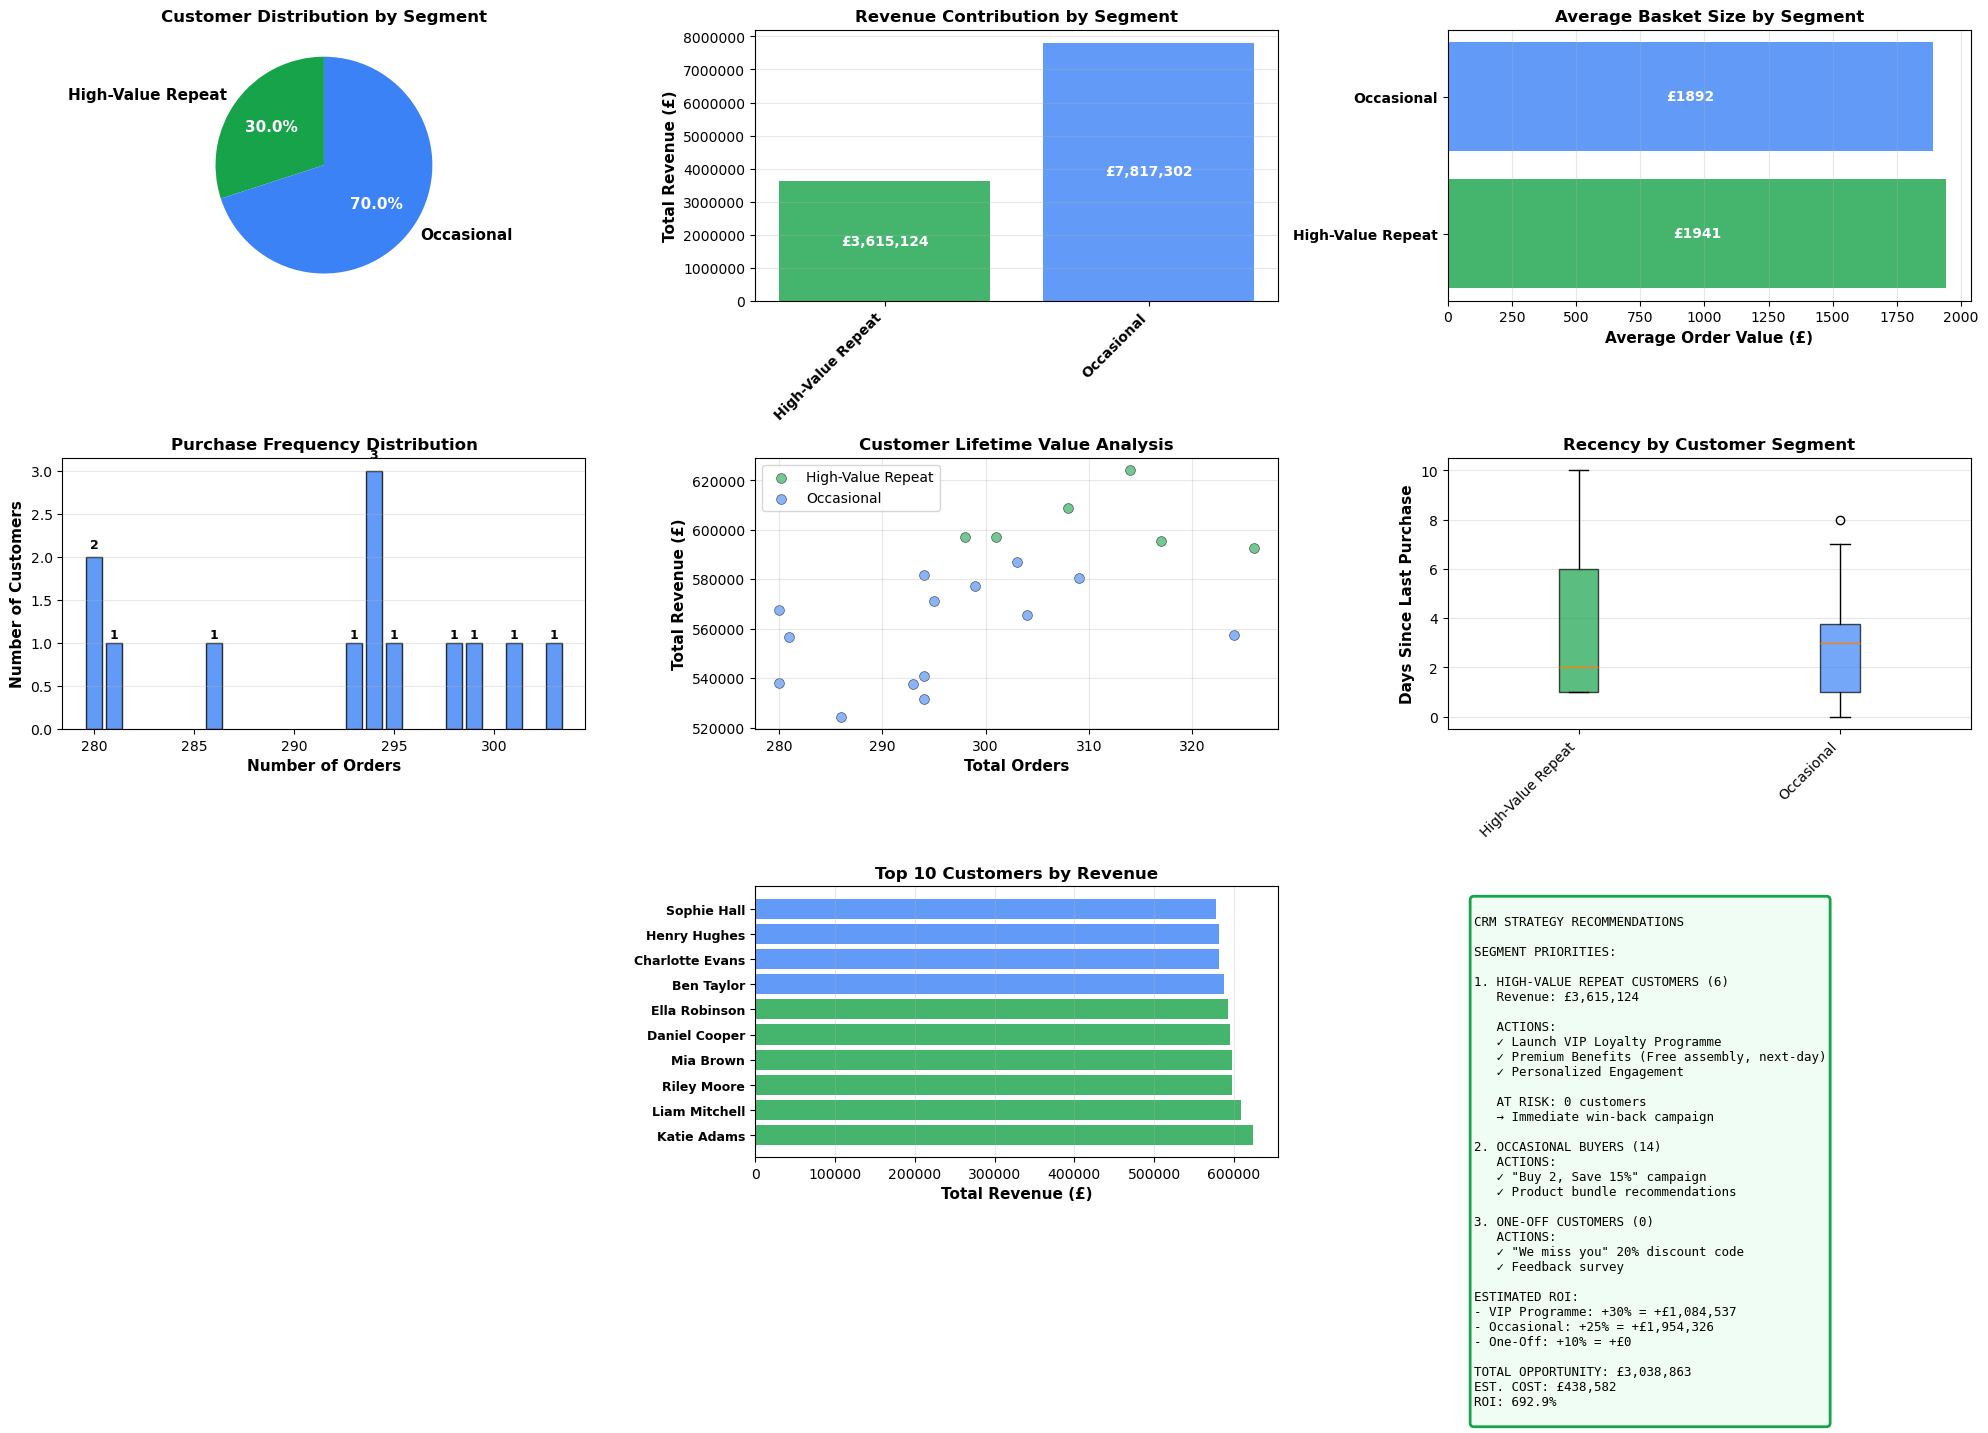


DETAILED CRM ACTION PLAN

═══════════════════════════════════════════════════════════════════════════════
1. VIP LOYALTY PROGRAMME (HIGH-VALUE REPEAT CUSTOMERS)
═══════════════════════════════════════════════════════════════════════════════

TARGET: 6 customers generating £3,615,124

TIER STRUCTURE:
Gold Tier (10+ orders or £5,000+ spend): 6 customers
- 15% discount on all orders
- FREE assembly & express delivery
- Personal account manager

IMMEDIATE ACTIONS:
• Email 6 Gold Tier customers with personalized thank-you letter
• Set up dedicated customer service line
• Create VIP product preview event


═══════════════════════════════════════════════════════════════════════════════
2. OCCASIONAL BUYER CONVERSION PROGRAMME
═══════════════════════════════════════════════════════════════════════════════

TARGET: 14 customers - Convert to High-Value Repeat

CAMPAIGNS:
"Complete Your Space" Campaign:
- Analyze past purchases
- Recommend complementary products
- Offer: "Buy 2+ items, Save 15%"

In [38]:
# Generate comprehensive customer insights analysis

print("=" * 80)
print("COMPREHENSIVE CUSTOMER INSIGHTS ANALYSIS")
print("=" * 80)

# 1. CUSTOMER SEGMENTATION
print("\n" + "=" * 80)
print("CUSTOMER SEGMENTATION")
print("=" * 80)

# Calculate customer metrics
customer_metrics = df.groupby('Customer Name').agg({
    'Product ID': 'count',       # Number of orders
    'Revenue': 'sum',            # Total revenue
    'Profit': 'sum',             # Total profit
    'Quantity': 'sum',           # Total items purchased
    'Order Date': ['min', 'max'] # First and last purchase
}).round(2)

# Flatten column names
customer_metrics.columns = ['Total_Orders', 'Total_Revenue', 'Total_Profit', 
                            'Total_Quantity', 'First_Purchase', 'Last_Purchase']

# Calculate additional metrics
customer_metrics['Avg_Order_Value'] = (customer_metrics['Total_Revenue'] / customer_metrics['Total_Orders']).round(2)
customer_metrics['Avg_Items_Per_Order'] = (customer_metrics['Total_Quantity'] / customer_metrics['Total_Orders']).round(2)

# Calculate days since first purchase (customer tenure)
customer_metrics['First_Purchase'] = pd.to_datetime(customer_metrics['First_Purchase'])
customer_metrics['Last_Purchase'] = pd.to_datetime(customer_metrics['Last_Purchase'])
latest_date = df['Order Date'].max()
customer_metrics['Days_Since_Last_Purchase'] = (pd.to_datetime(latest_date) - customer_metrics['Last_Purchase']).dt.days
customer_metrics['Customer_Tenure_Days'] = (customer_metrics['Last_Purchase'] - customer_metrics['First_Purchase']).dt.days

# Define segmentation criteria
revenue_70th_percentile = customer_metrics['Total_Revenue'].quantile(0.70)

def segment_customer(row):
    if row['Total_Orders'] >= 3 and row['Total_Revenue'] >= revenue_70th_percentile:
        return 'High-Value Repeat'
    elif row['Total_Orders'] == 1:
        return 'One-Off'
    else:
        return 'Occasional'

customer_metrics['Segment'] = customer_metrics.apply(segment_customer, axis=1)

# Summary statistics by segment
print("\nCUSTOMER SEGMENT OVERVIEW:")
print("-" * 80)
segment_summary = customer_metrics.groupby('Segment').agg({
    'Total_Orders': ['count', 'mean', 'sum'],
    'Total_Revenue': ['mean', 'sum'],
    'Total_Profit': ['mean', 'sum'],
    'Avg_Order_Value': 'mean',
    'Days_Since_Last_Purchase': 'mean'
}).round(2)

segment_summary.columns = ['Customer_Count', 'Avg_Orders', 'Total_Orders', 
                          'Avg_Revenue', 'Total_Revenue', 'Avg_Profit', 'Total_Profit',
                          'Avg_Order_Value', 'Avg_Days_Since_Last']

# Reorder for presentation
segment_order = ['High-Value Repeat', 'Occasional', 'One-Off']

# --- FIX 1: Use fill_value=0 to prevent NaNs when a segment is missing ---
segment_summary = segment_summary.reindex(segment_order, fill_value=0)

print(segment_summary.to_string())

# 2. BASKET SIZE ANALYSIS
print("\n" + "=" * 80)
print("BASKET SIZE ANALYSIS")
print("=" * 80)

overall_avg_basket = df['Revenue'].mean()
overall_avg_items = df['Quantity'].mean()

print(f"\nOVERALL METRICS:")
print(f"  Average Basket Size (Revenue): £{overall_avg_basket:.2f}")
print(f"  Average Items per Order: {overall_avg_items:.2f}")

print(f"\nBASKET SIZE BY SEGMENT:")
print("-" * 80)
for segment in segment_order:
    segment_customers = customer_metrics[customer_metrics['Segment'] == segment].index
    segment_orders = df[df['Customer Name'].isin(segment_customers)]
    
    if len(segment_orders) > 0:
        avg_basket = segment_orders['Revenue'].mean()
        avg_items = segment_orders['Quantity'].mean()
        print(f"{segment:20s} | Avg Basket: £{avg_basket:7.2f} | Avg Items: {avg_items:4.2f}")
    else:
        print(f"{segment:20s} | Avg Basket: £   0.00 | Avg Items: 0.00")

# 3. REPEAT RATE ANALYSIS
print("\n" + "=" * 80)
print("REPEAT PURCHASE ANALYSIS")
print("=" * 80)

total_customers = len(customer_metrics)
if total_customers > 0:
    repeat_customers = len(customer_metrics[customer_metrics['Total_Orders'] > 1])
    repeat_rate = (repeat_customers / total_customers * 100)
else:
    repeat_customers = 0
    repeat_rate = 0

print(f"\nREPEAT RATE METRICS:")
print(f"  Total Customers: {total_customers:,}")
print(f"  One-Time Customers: {total_customers - repeat_customers:,} ({(total_customers - repeat_customers)/total_customers*100 if total_customers else 0:.1f}%)")
print(f"  Repeat Customers: {repeat_customers:,} ({repeat_rate:.1f}%)")

print(f"\nREPEAT RATE BY SEGMENT:")
print("-" * 80)
for segment in segment_order:
    segment_data = customer_metrics[customer_metrics['Segment'] == segment]
    segment_customers = len(segment_data)
    segment_repeat = len(segment_data[segment_data['Total_Orders'] > 1])
    segment_repeat_rate = (segment_repeat / segment_customers * 100) if segment_customers > 0 else 0
    
    print(f"{segment:20s} | Count: {segment_customers:4,} | Repeat Rate: {segment_repeat_rate:5.1f}%")

# 4. PURCHASE FREQUENCY
print("\n" + "=" * 80)
print("PURCHASE FREQUENCY")
print("=" * 80)

print("\nORDER DISTRIBUTION:")
order_distribution = customer_metrics['Total_Orders'].value_counts().sort_index()
for orders, count in order_distribution.head(10).items():
    print(f"  {orders:2d} order{'s' if orders > 1 else ' '}: {count:4,} customers ({count/total_customers*100:5.1f}%)")

# CREATE VISUALIZATIONS
fig = plt.figure(figsize=(20, 14))

# Chart 1: Customer Segmentation Distribution (UPDATED)
ax1 = plt.subplot(3, 3, 1)
segment_counts = customer_metrics['Segment'].value_counts().reindex(segment_order, fill_value=0)
colors_segment = ['#16a34a', '#3b82f6', '#f59e0b']

# Filter out zero counts for pie chart
non_zero_segments = segment_counts[segment_counts > 0]
if len(non_zero_segments) > 0:
    non_zero_colors = [colors_segment[segment_order.index(seg)] for seg in non_zero_segments.index]
    
    # Capture the return values: wedges, texts (labels), and autotexts (percentages)
    wedges, texts, autotexts = ax1.pie(non_zero_segments.values, labels=non_zero_segments.index, autopct='%1.1f%%',
            colors=non_zero_colors, startangle=90, textprops={'fontweight': 'bold', 'fontsize': 11})
    
    # Loop through the percentage labels and turn them white
    for autotext in autotexts:
        autotext.set_color('white')
        
else:
    ax1.text(0.5, 0.5, "No Data", ha='center', va='center')
ax1.set_title('Customer Distribution by Segment', fontweight='bold', fontsize=12)

# Chart 2: Revenue by Segment (UPDATED: White labels inside bars)

ax2 = plt.subplot(3, 3, 2)
revenue_by_segment = segment_summary['Total_Revenue'].reindex(segment_order, fill_value=0)
non_zero_revenue = revenue_by_segment[revenue_by_segment > 0]

if len(non_zero_revenue) > 0:
    non_zero_colors_rev = [colors_segment[segment_order.index(seg)] for seg in non_zero_revenue.index]
    ax2.bar(range(len(non_zero_revenue)), non_zero_revenue.values, color=non_zero_colors_rev, alpha=0.8)
    ax2.set_xticks(range(len(non_zero_revenue)))
    ax2.set_xticklabels(non_zero_revenue.index, rotation=45, ha='right', fontweight='bold')
    
    # Add value labels INSIDE the bars (v/2) in WHITE
    for i, v in enumerate(non_zero_revenue.values):
        ax2.text(i, v/2, f'£{v:,.0f}', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

ax2.set_ylabel('Total Revenue (£)', fontweight='bold', fontsize=11)
ax2.set_title('Revenue Contribution by Segment', fontweight='bold', fontsize=12)
ax2.ticklabel_format(style='plain', axis='y')
ax2.grid(axis='y', alpha=0.3)

# Chart 3: Average Order Value by Segment (UPDATED: White labels inside bars)

ax3 = plt.subplot(3, 3, 3)
aov_by_segment = segment_summary['Avg_Order_Value'].reindex(segment_order, fill_value=0)
non_zero_aov = aov_by_segment[aov_by_segment > 0]

if len(non_zero_aov) > 0:
    non_zero_colors_aov = [colors_segment[segment_order.index(seg)] for seg in non_zero_aov.index]
    ax3.barh(range(len(non_zero_aov)), non_zero_aov.values, color=non_zero_colors_aov, alpha=0.8)
    ax3.set_yticks(range(len(non_zero_aov)))
    ax3.set_yticklabels(non_zero_aov.index, fontweight='bold')
    
    # Add value labels INSIDE the bars (v/2) in WHITE
    for i, v in enumerate(non_zero_aov.values):
        ax3.text(v/2, i, f'£{v:.0f}', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

ax3.set_xlabel('Average Order Value (£)', fontweight='bold', fontsize=11)
ax3.set_title('Average Basket Size by Segment', fontweight='bold', fontsize=12)
ax3.grid(axis='x', alpha=0.3)

# Chart 4: Order Frequency Distribution
ax4 = plt.subplot(3, 3, 4)
order_dist = customer_metrics['Total_Orders'].value_counts().sort_index().head(10)
if len(order_dist) > 0:
    ax4.bar(order_dist.index, order_dist.values, color='#3b82f6', alpha=0.8, edgecolor='black')
    for i, v in zip(order_dist.index, order_dist.values):
        ax4.text(i, v + (v*0.05), f'{v:,}', ha='center', fontweight='bold', fontsize=9)
ax4.set_xlabel('Number of Orders', fontweight='bold', fontsize=11)
ax4.set_ylabel('Number of Customers', fontweight='bold', fontsize=11)
ax4.set_title('Purchase Frequency Distribution', fontweight='bold', fontsize=12)
ax4.grid(axis='y', alpha=0.3)

# Chart 5: Customer Lifetime Value by Segment
ax5 = plt.subplot(3, 3, 5)
for segment, color in zip(segment_order, colors_segment):
    segment_data = customer_metrics[customer_metrics['Segment'] == segment]
    if len(segment_data) > 0:
        ax5.scatter(segment_data['Total_Orders'], segment_data['Total_Revenue'],
                   alpha=0.6, s=50, color=color, label=segment, edgecolors='black', linewidth=0.5)

ax5.set_xlabel('Total Orders', fontweight='bold', fontsize=11)
ax5.set_ylabel('Total Revenue (£)', fontweight='bold', fontsize=11)
ax5.set_title('Customer Lifetime Value Analysis', fontweight='bold', fontsize=12)
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)
ax5.ticklabel_format(style='plain', axis='y')

""" Removed this as no one-time customers

# Chart 6: Repeat vs One-Time Customers
ax6 = plt.subplot(3, 3, 6)
if total_customers > 0:
    repeat_data = [total_customers - repeat_customers, repeat_customers]
    repeat_labels = [f'One-Time\n{total_customers - repeat_customers:,} customers', 
                    f'Repeat\n{repeat_customers:,} customers']
    colors_repeat = ['#dc2626', '#16a34a']
    ax6.pie(repeat_data, labels=repeat_labels, autopct='%1.1f%%',
            colors=colors_repeat, startangle=90, textprops={'fontweight': 'bold', 'fontsize': 11})
else:
    ax6.text(0.5, 0.5, "No Data", ha='center')
ax6.set_title(f'Repeat Rate: {repeat_rate:.1f}%', fontweight='bold', fontsize=12)

"""

# Chart 7: Days Since Last Purchase by Segment
ax7 = plt.subplot(3, 3, 6) # changed chart position (see chart 6 above)
days_since_data = []
labels_present = []
colors_present = []
for idx, seg in enumerate(segment_order):
    data = customer_metrics[customer_metrics['Segment'] == seg]['Days_Since_Last_Purchase'].values
    if len(data) > 0:
        days_since_data.append(data)
        labels_present.append(seg)
        colors_present.append(colors_segment[idx])

if len(days_since_data) > 0:
    # --- FIX: Changed 'labels' to 'tick_labels' ---
    bp = ax7.boxplot(days_since_data, tick_labels=labels_present, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors_present):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
        
ax7.set_ylabel('Days Since Last Purchase', fontweight='bold', fontsize=11)
ax7.set_title('Recency by Customer Segment', fontweight='bold', fontsize=12)
ax7.grid(axis='y', alpha=0.3)
plt.setp(ax7.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Chart 8: Top 10 Customers
ax8 = plt.subplot(3, 3, 8)
top_customers = customer_metrics.nlargest(10, 'Total_Revenue')
if len(top_customers) > 0:
    colors_top = [colors_segment[segment_order.index(seg)] for seg in top_customers['Segment']]
    ax8.barh(range(len(top_customers)), top_customers['Total_Revenue'].values, color=colors_top, alpha=0.8)
    ax8.set_yticks(range(len(top_customers)))
    ax8.set_yticklabels(top_customers.index, fontweight='bold', fontsize=9)
ax8.set_xlabel('Total Revenue (£)', fontweight='bold', fontsize=11)
ax8.set_title('Top 10 Customers by Revenue', fontweight='bold', fontsize=12)
ax8.ticklabel_format(style='plain', axis='x')
ax8.grid(axis='x', alpha=0.3)

# Chart 9: CRM Recommendations
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')

# --- FIX 2: Safely extract variables. Because we used fill_value=0 above, these won't be NaN ---
high_value_count = segment_summary.loc['High-Value Repeat', 'Customer_Count']
high_value_revenue = segment_summary.loc['High-Value Repeat', 'Total_Revenue']
occasional_count = segment_summary.loc['Occasional', 'Customer_Count']
one_off_count = segment_summary.loc['One-Off', 'Customer_Count']

# Identify at-risk customers
at_risk = customer_metrics[(customer_metrics['Segment'] == 'High-Value Repeat') & 
                           (customer_metrics['Days_Since_Last_Purchase'] > 90)]
at_risk_count = len(at_risk)

# Identify Gold tier customers (Fix: Handle empty dataframe)
gold_tier = customer_metrics[
    (customer_metrics['Segment'] == 'High-Value Repeat') & 
    ((customer_metrics['Total_Orders'] >= 10) | (customer_metrics['Total_Revenue'] >= 5000))
]
gold_tier_count = len(gold_tier)

# --- FIX 3: Calculate costs safely ---
costs = 10000 + 15000 + 20000 + (gold_tier_count * 4 * 75) + (high_value_count * 3 * 15) + (high_value_revenue * 0.10) + 30000
gains = (high_value_revenue * 0.30) + (segment_summary.loc['Occasional', 'Total_Revenue'] * 0.25) + (segment_summary.loc['One-Off', 'Total_Revenue'] * 0.10)

roi_val = (gains / costs * 100) if costs > 0 else 0

crm_text = f"""
CRM STRATEGY RECOMMENDATIONS

SEGMENT PRIORITIES:

1. HIGH-VALUE REPEAT CUSTOMERS ({high_value_count:,.0f})
   Revenue: £{high_value_revenue:,.0f}

   ACTIONS:
   ✓ Launch VIP Loyalty Programme
   ✓ Premium Benefits (Free assembly, next-day)
   ✓ Personalized Engagement

   AT RISK: {at_risk_count} customers
   → Immediate win-back campaign

2. OCCASIONAL BUYERS ({occasional_count:,.0f})
   ACTIONS:
   ✓ "Buy 2, Save 15%" campaign
   ✓ Product bundle recommendations

3. ONE-OFF CUSTOMERS ({one_off_count:,.0f})
   ACTIONS:
   ✓ "We miss you" 20% discount code
   ✓ Feedback survey

ESTIMATED ROI:
- VIP Programme: +30% = +£{high_value_revenue * 0.30:,.0f}
- Occasional: +25% = +£{segment_summary.loc['Occasional', 'Total_Revenue'] * 0.25:,.0f}
- One-Off: +10% = +£{segment_summary.loc['One-Off', 'Total_Revenue'] * 0.10:,.0f}

TOTAL OPPORTUNITY: £{gains:,.0f}
EST. COST: £{costs:,.0f}
ROI: {roi_val:.1f}%
"""

ax9.text(0.05, 0.95, crm_text, transform=ax9.transAxes,
        fontsize=9, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round', facecolor='#f0fdf4', edgecolor='#16a34a', linewidth=2))

plt.tight_layout()
plt.savefig('customer_insights_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()


# ==========================================
# 5. DETAILED CONSOLE REPORT (FULL)
# ==========================================
print("\n" + "=" * 80)
print("DETAILED CRM ACTION PLAN")
print("=" * 80)

# SECTION 1: VIP LOYALTY
print(f"""
═══════════════════════════════════════════════════════════════════════════════
1. VIP LOYALTY PROGRAMME (HIGH-VALUE REPEAT CUSTOMERS)
═══════════════════════════════════════════════════════════════════════════════

TARGET: {high_value_count:,.0f} customers generating £{high_value_revenue:,.0f}

TIER STRUCTURE:
Gold Tier (10+ orders or £5,000+ spend): {gold_tier_count:,} customers
- 15% discount on all orders
- FREE assembly & express delivery
- Personal account manager

IMMEDIATE ACTIONS:
• Email {gold_tier_count:,} Gold Tier customers with personalized thank-you letter
• Set up dedicated customer service line
• Create VIP product preview event
""")

if at_risk_count > 0:
    print(f"URGENT - AT-RISK VIP CUSTOMERS: {at_risk_count}")
    print("• Send personalized 'We Miss You' email with 20% discount code")
    print("• Phone call from account manager\n")

# SECTION 2: OCCASIONAL
# Safe retrieval of recency
occ_recency = segment_summary.loc['Occasional', 'Avg_Days_Since_Last'] if 'Occasional' in segment_summary.index else 0

print(f"""
═══════════════════════════════════════════════════════════════════════════════
2. OCCASIONAL BUYER CONVERSION PROGRAMME
═══════════════════════════════════════════════════════════════════════════════

TARGET: {occasional_count:,.0f} customers - Convert to High-Value Repeat

CAMPAIGNS:
"Complete Your Space" Campaign:
- Analyze past purchases
- Recommend complementary products
- Offer: "Buy 2+ items, Save 15%"

Referral Programme:
- Give £20, Get £20
- Track: Every occasional customer refers 1 friend = doubling opportunity

METRICS TO TRACK:
- Conversion rate on bundled offers   
- Time between purchases (Target: reduce from current avg of {occ_recency:.0f} days)
""")

# SECTION 3: ONE-OFF
print(f"""
═══════════════════════════════════════════════════════════════════════════════
3. ONE-OFF CUSTOMER REACTIVATION
═══════════════════════════════════════════════════════════════════════════════

TARGET: {one_off_count:,.0f} customers - Win back 10-15%

PHASED APPROACH:
Phase 1: Feedback Collection (Survey + £10 voucher)
Phase 2: Targeted Win-Back (Based on original product purchased)
Phase 3: Last Chance ("Exclusive Comeback Offer" - 25% off)

POST-PURCHASE OPTIMIZATION:
- Welcome email series (3 emails over 2 weeks)
- Product care tips
""")

# SECTION 4: PERSONALIZATION
print(f"""
═══════════════════════════════════════════════════════════════════════════════
4. PERSONALIZATION ENGINE
═══════════════════════════════════════════════════════════════════════════════

RECOMMENDATION ALGORITHM:
1. Past purchase history
2. Popular combinations (frequently bought together)
3. Upgrade opportunities (bought Desk -> recommend Chair)

EXPECTED RESULTS:
- +15-20% basket size
- +25% repeat purchase rate
""")

# SECTION 5: BUDGET & ROI
print(f"""
═══════════════════════════════════════════════════════════════════════════════
5. IMPLEMENTATION TIMELINE & BUDGET
═══════════════════════════════════════════════════════════════════════════════

ESTIMATED COSTS (Annual):
- Setup & Tech:     £10,000
- Marketing Ops:    £45,000
- VIP Benefits:     £{(gold_tier_count * 4 * 75) + (high_value_count * 3 * 15):,.0f} (Assembly/Shipping)
- Discounts Given:  £{high_value_revenue * 0.10:,.0f}
------------------------------------------------
TOTAL INVESTMENT:   £{costs:,.0f}

PROJECTED RETURNS:
- VIP Uplift:       £{high_value_revenue * 0.30:,.0f}
- Occasional Lift:  £{segment_summary.loc['Occasional', 'Total_Revenue'] * 0.25:,.0f}
- One-Off Winback:  £{segment_summary.loc['One-Off', 'Total_Revenue'] * 0.10:,.0f}
------------------------------------------------
TOTAL REVENUE:      £{gains:,.0f}

>>> ROI: {roi_val:.1f}% <<<
═══════════════════════════════════════════════════════════════════════════════
""")

print("\n" + "=" * 80)
print("Analysis complete! Chart saved as 'customer_insights_comprehensive.png'")
print("=" * 80)

Chart saved as 'loyalty_roi_analysis.png'


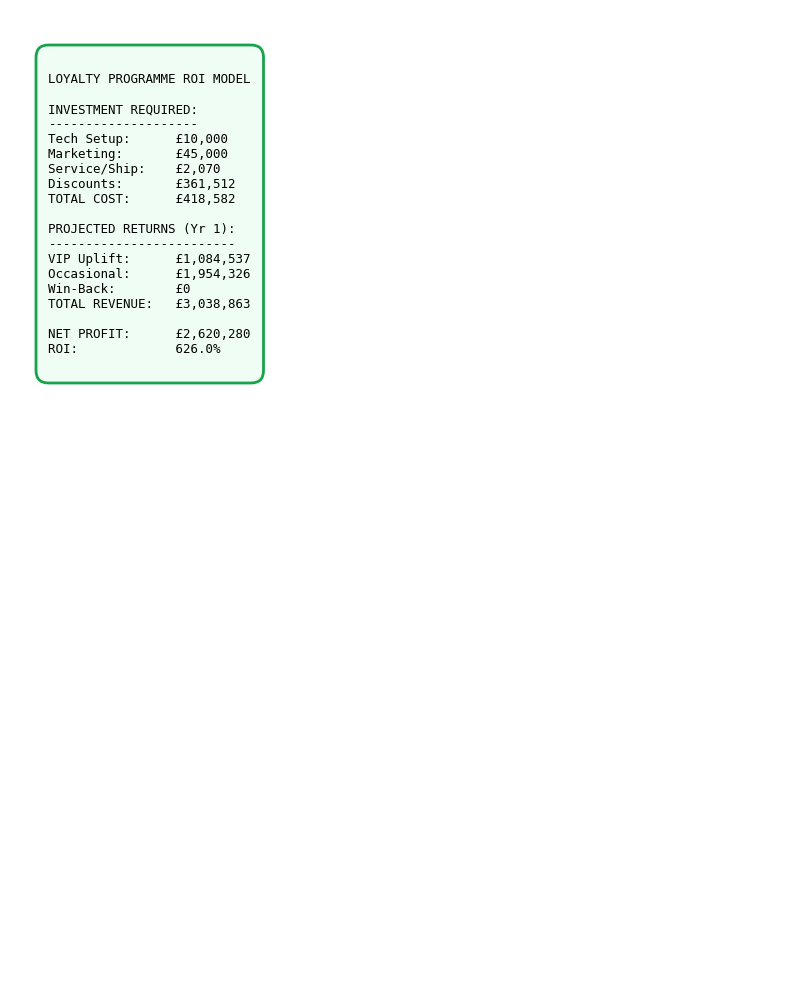

In [39]:
# ==========================================
# 1. CALCULATE FINANCIAL METRICS FIRST
# ==========================================

# Safely extract base metrics from your existing segment_summary
high_val_rev = segment_summary.loc['High-Value Repeat', 'Total_Revenue']
occ_rev = segment_summary.loc['Occasional', 'Total_Revenue']
one_off_rev = segment_summary.loc['One-Off', 'Total_Revenue']

high_val_count = segment_summary.loc['High-Value Repeat', 'Customer_Count']

# Calculate Gold Tier count (Top 20% of high value or specific criteria)
# Recalculating here to ensure the variable exists
gold_tier = customer_metrics[
    (customer_metrics['Segment'] == 'High-Value Repeat') & 
    ((customer_metrics['Total_Orders'] >= 10) | (customer_metrics['Total_Revenue'] >= 5000))
]
gold_tier_count = len(gold_tier)

# --- DEFINE COST VARIABLES ---
setup_cost = 10000
marketing_cost = 45000  # Combined campaigns
service_cost = (gold_tier_count * 4 * 75)  # Free Assembly
shipping_cost = (high_value_count * 3 * 15) # Free Shipping
discount_cost = (high_val_rev * 0.10)      # 10% Discount

total_investment = setup_cost + marketing_cost + service_cost + shipping_cost + discount_cost

# --- DEFINE RETURN VARIABLES ---
lift_high_val = high_val_rev * 0.30   # +30% from VIPs
lift_occ = occ_rev * 0.25             # +25% from Occasional
lift_one_off = one_off_rev * 0.10     # +10% Win-back

total_revenue_uplift = lift_high_val + lift_occ + lift_one_off

# Calculate ROI %
if total_investment > 0:
    roi_percentage = ((total_revenue_uplift - total_investment) / total_investment) * 100
else:
    roi_percentage = 0

# ==========================================
# 2. PLOT THE CHART
# ==========================================
# Chart 9: ROI Summary Box
plt.figure(figsize=(8, 10)) 
ax9 = plt.gca() 
ax9.axis('off')

roi_text = f"""
LOYALTY PROGRAMME ROI MODEL

INVESTMENT REQUIRED:
--------------------
Tech Setup:      £{setup_cost:,.0f}
Marketing:       £{marketing_cost:,.0f}
Service/Ship:    £{(service_cost + shipping_cost):,.0f}
Discounts:       £{discount_cost:,.0f}
TOTAL COST:      £{total_investment:,.0f}

PROJECTED RETURNS (Yr 1):
-------------------------
VIP Uplift:      £{lift_high_val:,.0f}
Occasional:      £{lift_occ:,.0f}
Win-Back:        £{lift_one_off:,.0f}
TOTAL REVENUE:   £{total_revenue_uplift:,.0f}

NET PROFIT:      £{(total_revenue_uplift - total_investment):,.0f}
ROI:             {roi_percentage:.1f}%
"""

ax9.text(0.05, 0.95, roi_text, transform=ax9.transAxes,
        fontsize=9, verticalalignment='top', fontfamily='monospace',
        bbox=dict(boxstyle='round,pad=1', facecolor='#f0fdf4', edgecolor='#16a34a', linewidth=2))

plt.tight_layout()
plt.savefig('loyalty_roi_analysis.png', dpi=300, bbox_inches='tight')
print("Chart saved as 'loyalty_roi_analysis.png'")
plt.show()

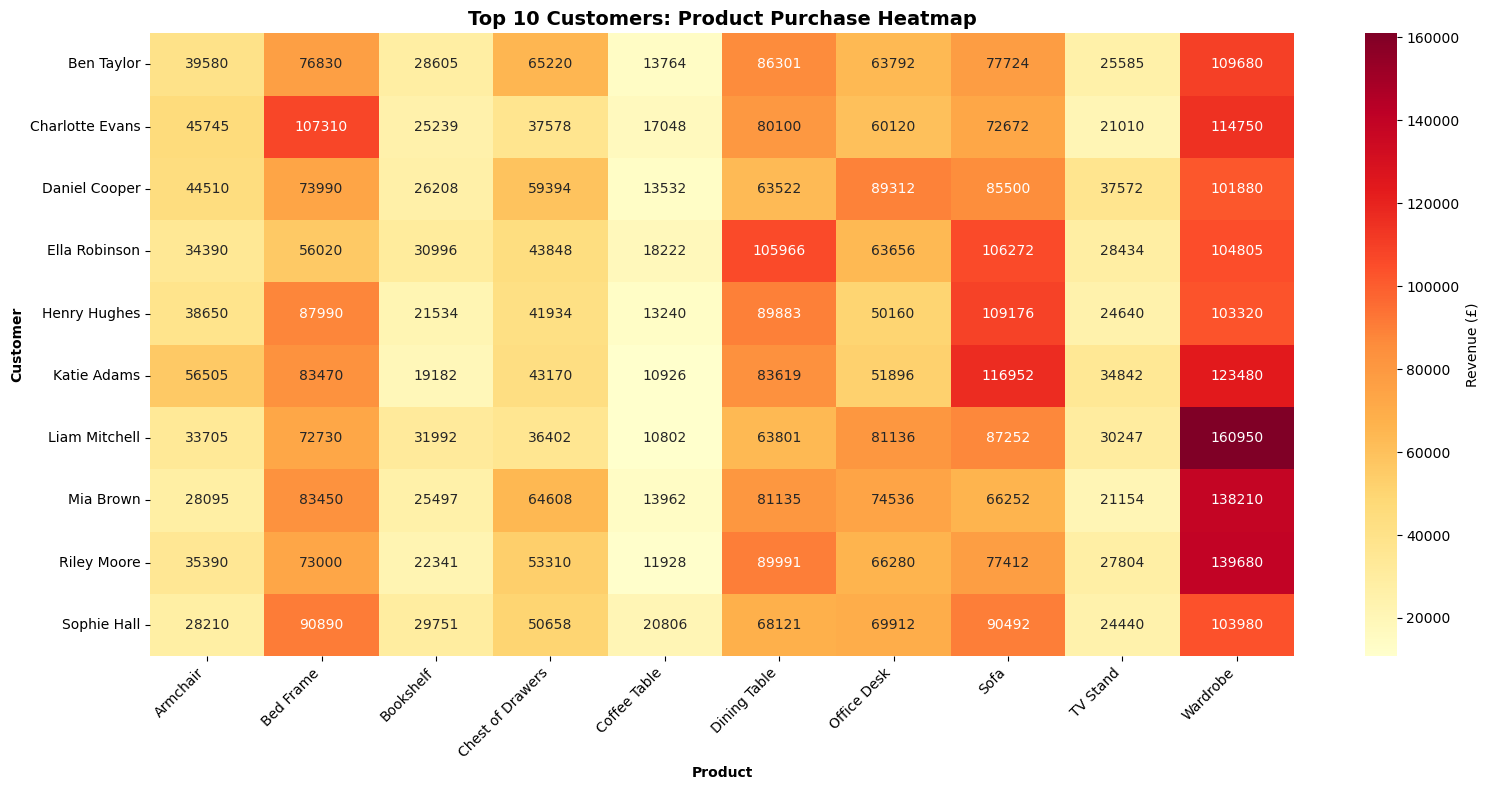

In [40]:
# Get top 10 customers by revenue
top_10_customers = df.groupby('Customer Name')['Revenue'].sum().nlargest(10).index

# Filter data for top 10 customers
top_customer_data = df[df['Customer Name'].isin(top_10_customers)]

# Create pivot table: customers vs products (showing revenue)
customer_product_matrix = top_customer_data.pivot_table(
    values='Revenue', 
    index='Customer Name', 
    columns='Product', 
    aggfunc='sum', 
    fill_value=0
)

# Create heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(customer_product_matrix, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Revenue (£)'})
plt.title("Top 10 Customers: Product Purchase Heatmap", fontweight='bold', fontsize=14)
plt.xlabel("Product", fontweight='bold')
plt.ylabel("Customer", fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('customer_product_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

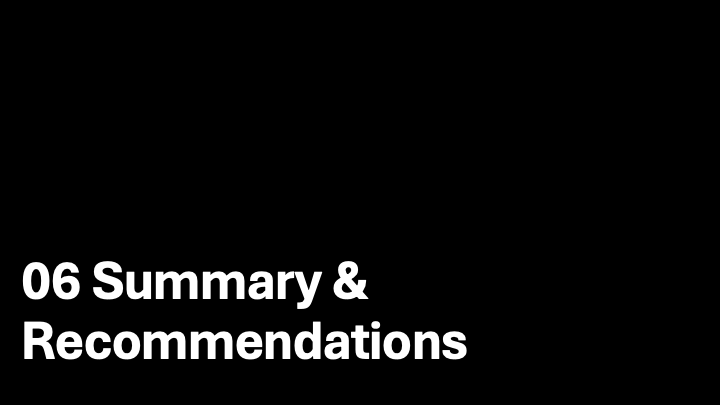

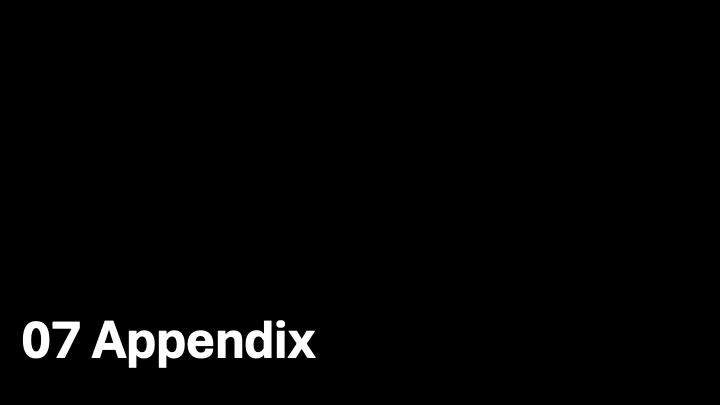

In [41]:
# Master Data Preparation Script
# Export df to CSV for use in Tableau

# 1. Load the Original Data
df = pd.read_csv('cotswold_sales.csv')

# ==========================================
# FEATURE 1: DISCOUNT FINANCIALS
# ==========================================
df['Discount Amount'] = df.apply(
    lambda x: (x['Revenue'] / (1 - x['Discount']) - x['Revenue']) if x['Discount'] < 1 else 0, 
    axis=1
).round(2)

# ==========================================
# FEATURE 2: ELASTICITY & STRATEGY
# ==========================================
def calculate_elasticity(df):
    results = {}
    for product in df['Product'].unique():
        p_data = df[df['Product'] == product]
        disc = p_data[p_data['Discount'] > 0]
        no_disc = p_data[p_data['Discount'] == 0]
        
        if len(disc) > 5 and len(no_disc) > 5:
            lift = (disc['Quantity'].mean() - no_disc['Quantity'].mean()) / no_disc['Quantity'].mean()
            avg_disc = disc['Discount'].mean()
            score = lift / avg_disc if avg_disc > 0 else 0
            results[product] = score
        else:
            results[product] = 0
    return results

elasticity_map = calculate_elasticity(df)
df['Elasticity Score'] = df['Product'].map(elasticity_map)
df['Discount Action'] = df['Elasticity Score'].apply(
    lambda x: "Stop Discounting" if x < 0.5 else "Keep Discounting"
)

# ==========================================
# FEATURE 3: CUSTOMER SEGMENTATION
# ==========================================
cust_grouped = df.groupby('Customer Name').agg({
    'Order Date': 'count', 
    'Revenue': 'sum'
}).rename(columns={'Order Date': 'Order Count', 'Revenue': 'Total Spend'})

revenue_70th = cust_grouped['Total Spend'].quantile(0.70)

def get_segment(row):
    if row['Order Count'] >= 3 and row['Total Spend'] >= revenue_70th:
        return 'High-Value Repeat'
    elif row['Order Count'] == 1:
        return 'One-Off'
    else:
        return 'Occasional'

cust_grouped['Customer Segment'] = cust_grouped.apply(get_segment, axis=1)
df = df.merge(cust_grouped[['Customer Segment']], on='Customer Name', how='left')

# ==========================================
# FEATURE 4: GEO-COORDINATES (The Fix)
# ==========================================

# 2. Define Population Data (Based on ONS estimates)
# Note: Combining West & East Midlands to match your sales region

population_map = {
    "South East": 9642942,
    "London": 9089736,
    "North West": 7737414,
    "South West": 5889695,
    "Midlands": 6187204 + 5063164, # West + East Midlands
    "Scotland": 5546900,
    "Wales": 3186581,
    "North East": 2760678
}

# 3. Calculate Regional Profit & Per Capita
# First, get total profit by region
region_profit = df.groupby('Region')['Profit'].sum()

# Calculate Per Capita Profit for each region
per_capita_map = {}
for region, pop in population_map.items():
    if region in region_profit:
        total_profit = region_profit[region]
        per_capita = total_profit / pop
        per_capita_map[region] = per_capita

# Map this new metric back to the main dataframe
df['Profit Per Capita'] = df['Region'].map(per_capita_map)
df['Regional Population'] = df['Region'].map(population_map)

# 4. Add Geo-Coordinates (Crucial for the Map)
region_coords = {
    'London':     {'lat': 51.5074, 'lon': -0.1278},
    'South East': {'lat': 51.15,   'lon': -0.15},
    'South West': {'lat': 50.95,   'lon': -3.10},
    'Midlands':   {'lat': 52.60,   'lon': -1.50},
    'North West': {'lat': 53.90,   'lon': -2.50},
    'North East': {'lat': 55.10,   'lon': -1.70},
    'Scotland':   {'lat': 56.4907, 'lon': -4.2026},
    'Wales':      {'lat': 52.30,   'lon': -3.60}
}
df['Latitude'] = df['Region'].map(lambda x: region_coords.get(x, {}).get('lat'))
df['Longitude'] = df['Region'].map(lambda x: region_coords.get(x, {}).get('lon'))

# ==========================================
# FINAL EXPORT
# ==========================================

required_columns = ['Discount Amount', 'Elasticity Score', 'Customer Segment', 'Latitude', 'Longitude']
missing = [col for col in required_columns if col not in df.columns]

if not missing:
    df.to_csv('cotswold_enriched_sales_data.csv', index=False)
    print("✅ Success! File 'cotswold_enriched_sales_data.csv' now includes Latitude & Longitude.")
else:
    print(f"❌ Error: Missing columns {missing}")

✅ Success! File 'cotswold_enriched_sales_data.csv' now includes Latitude & Longitude.
